In [2]:
#!pip install twint

#!pip install nest_asyncio

In [29]:
import twint
import nest_asyncio
import pandas as pd
import re
import operator
import plotly.graph_objects as go

import networkx as nx
%matplotlib notebook
import matplotlib.pyplot as plt

nest_asyncio.apply()
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [97]:
#track_list
track_list = ["sustainability",
"sustainable",
"ecofriendly",
"environment",
"zerowaste",
"sustainableliving",
"climatechange",
"environment",
"gogreen",
"nature",
"recycle",
"plasticfree",
"eco",
"reuse",
"green",
"savetheplanet",
"organic",
"vegan",
"ethicalfashion",
"noplastic",
"plastic",
"renewables",
"renewableenergy",
"globalwarming",
"greenliving",
"pollution",
"reduce",
"sustainabilitymatters",
"climateaction",
"conservation",
"savetheearth",
"climate",
"energy",
"solar",
"reducereuserecycle",
"sdgs",
"waste",
"emissions",
"energy",
"biodiversity",
"environmental",
"globalwarming",
"deforestation",
"plastics",
"greenhouse",
"greenhousegas",
"solar",
"oceanplastics",
"sustainabilitymatters",
"ocean",
"savetheworld",
"wildlife",
"eco",
"alternateenergy",
"microplastics",
"circulareconomy",
"ethicalconsumption",
"climatestrike",
"FridaysForFuture",
"CleanTech",
"EnergyHarvesting",
"CradletoCradle",
"C2C",
"cradle2cradle",
"sustainablepackaging",
"packagingwaste",
"carbonemission",
"carbonfootprint",
"recycling",
"socialentrepreneurship",
"socialentrepreneur",
"corporatecitizenship",
"ecovadis",
"corporatesocialresponsibility",
"csr",
"tellthetruth",
"ftse4good",
"climatecrisis",
"palmoil",
"footprint",
"Industrialwaste",
"consumerwaste",
"environmentalprotection",
"greencomputing",
"greechemistry",
"earthscience",
"environmentalscience",
"conservation",
"Ecologicaleconomics",
"Sustainabledevelopment",
"ecovillage",
"ecomunicipality",
"sustainablecity",
"permaculture",
"greenbuilding",
"sustainableagriculture",
"sustainablearchitecture",
"greentechnologies",
"renewableenergy",
"environmentaldegradation",
"overconsumption",
"populationgrowth",
"carbondioxide",
"Tippingpoint",
"climatology",
"Biogeochemical",
"nitrogen",
"phosphorus",
"acidification",
"saturation",
"aragonite",
"Freshwater",
"Ozonedepletion",
"ozone",
"aerosols",
"Chemicalpollution",
"endocrinedisruptors",
"heavymetals",
"radioactivity",
"contamination",
"habitatdestruction",
"erosion",
"salinization",
"fertilitylosses",
"Watermanagement",
"Overhunting",
"Overfishing",
"Overpopulation",
"toxins",
"Energyshortage",
"Energyefficiency,",
"Energyconservation",
"Organicagriculture",
"Regenerativeagriculture",
"reforestation",
"forestconservation",
"Steadystate",
"Sustainabledevelopment",
"Degrowth",
"Anticonsumerism",
]

languages_list=["en"]

In [134]:
#get tweets
tweets = pd.DataFrame()
for track_item in track_list:
    c = twint.Config()
    c.Search = track_item
    #c.Store_csv = True
    c.Lang = 'en'
    #c.Output = "test.csv"
    c.Pandas =True
    c.Limit = 100
    # Run
    twint.run.Search(c)
    tweets = tweets.append(twint.storage.panda.Tweets_df)
#tweets = twint.storage.panda.Tweets_df

1293172125210152961 2020-08-11 15:07:15 +0200 <PenskeLogistics> MT @PenskeNews: Sponsored by Penske Transportation Solutions, brand-new #StateofSustainableFleets Report now available for download. Click here for info & to sign up for virtual events today/Thursday:  http://ow.ly/oa6o50AWn9B  #sustainability #CleanEnergy pic.twitter.com/e3emuihUXA
1029940653336064002 2018-08-16 05:59:21 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1293172062161444865 2020-08-11 15:07:00 +0200 <AgInnovationON> The investment, designed to enhance the sustainability and competitiveness of the Ontario livestock sector, will be delivered through the Alliance.  https://twitter.com/UofGResearch/status/1290676180836900864 …
1293171986353487872 2020-08-11 15:06:42 +0200 <frank_oconnor> nice opportunity for grassroots organisations dedicated to #neweconomics #climatejustice #sustainability #socialchange  to share experiences, have a voice @counter_frames @s

1293170395101700097 2020-08-11 15:00:22 +0200 <charterMFG> Being a good corporate citizen is a priority at Charter. Did you know that steel has life cycle advantages over competing materials because of its high recyclability, conservation of natural resources and the extensive re-use of by-products?  #lifecycle #sustainability  pic.twitter.com/ZT4M0TUqUe
1285273268551901186 2020-07-20 20:00:01 +0200 <ResponsibleSoy> We are proud to present RTRS´s new mobile-friendly #website, a reliable tool for strategic decision-making in the #soy value chain. Join us at  http://Responsiblesoy.org  and plant a seed to grow the new global soy agenda. pic.twitter.com/RlS8RURGti
1293170390190010369 2020-08-11 15:00:21 +0200 <rstoddard> One more reason to love @Lifeisgood - this packaging which delivered a t-shirt - appears to be nothing more than a riff on a kraft paper grocery bag - no plastic!  Well damn done. #packaging #sustainability  pic.twitter.com/1jfI1tURla
1293170388667695104 2020-08-11 15:00:

1293168499238547457 2020-08-11 14:52:50 +0200 <globalcompactae> Jessica Robinson, Associate Director in International Affairs, ADGM at the ‘Sustainable Finance & Private Sector Responsibility: Sustainability in the times of #COVID19’ webinar, addressed the role of #SustainableDevelopment in boosting the economic recovery process pic.twitter.com/6LBqW1uoOA
1285273268551901186 2020-07-20 20:00:01 +0200 <ResponsibleSoy> We are proud to present RTRS´s new mobile-friendly #website, a reliable tool for strategic decision-making in the #soy value chain. Join us at  http://Responsiblesoy.org  and plant a seed to grow the new global soy agenda. pic.twitter.com/RlS8RURGti
1293168431253147649 2020-08-11 14:52:34 +0200 <Emirates_News> .@dubaitourism has extended the deadline for implementation of the 19 Sustainability Requirements and Carbon Calculator submissions by July 2021. #EmiratesNews #DubaiOneTv #UAE #Dubai pic.twitter.com/Q6RjYPMj0Z
1293168386504110080 2020-08-11 14:52:23 +0200 <hannappel

1293171559108972546 2020-08-11 15:05:00 +0200 <orfonline> India is home to over 250 million adolescents making adolescent health crucial to achieving the country’s Sustainable Development Goals (#SDGs), write @BehalShreya @Debarat88337385 & @oommen:  https://or-f.org/70673  pic.twitter.com/yLP0Byhqjk
1285273268551901186 2020-07-20 20:00:01 +0200 <ResponsibleSoy> We are proud to present RTRS´s new mobile-friendly #website, a reliable tool for strategic decision-making in the #soy value chain. Join us at  http://Responsiblesoy.org  and plant a seed to grow the new global soy agenda. pic.twitter.com/RlS8RURGti
1293171512141324288 2020-08-11 15:04:49 +0200 <_OliviaBlake> To successfully address the climate crisis we will need a shift our current transport system away from private vehicle ownership.  In Sheffield this means increasing the availability of public transport so that more people can travel by more sustainable means.  pic.twitter.com/DPljfD3jOQ
1293171478800797699 2020-08-11 15:0

1293170558130163712 2020-08-11 15:01:01 +0200 <GreenTufts> Want to expand sustainable energy policies locally and across the country while staying connected with your campus community? Learn how to take action here:  https://bit.ly/2XtdmcK 
1285273268551901186 2020-07-20 20:00:01 +0200 <ResponsibleSoy> We are proud to present RTRS´s new mobile-friendly #website, a reliable tool for strategic decision-making in the #soy value chain. Join us at  http://Responsiblesoy.org  and plant a seed to grow the new global soy agenda. pic.twitter.com/RlS8RURGti
1293170542657380362 2020-08-11 15:00:57 +0200 <somesheep> Also, keep in mind: we use the word trust for many things. Flores/Solomon book (already mentioned by @estherderby) is excellent in showing all the nuances and points out that crucial for sustainable trust is being able to deal with betrayal. ..
1293170539360649217 2020-08-11 15:00:57 +0200 <TheRefillMan> Building the momentum to a sustainable future  http://sco.lt/7AhN0C 
1293170530657

1293172167228743680 2020-08-11 15:07:25 +0200 <JohnTonks> TPA want to also cut Fuel Duty by 5p a litre and abolishing Air Passenger Duty. Very #Eco friendly and as the wealthy are more likely to use big cars and fly more, hey. https://twitter.com/JohnTonks/status/1293171037891440640 …
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1293171015665819653 2020-08-11 15:02:50 +0200 <UpscaleMenswear> "Unless you’re buying second-hand or #vintage, #sustainable #fashion often comes with an #expensive price tag. But considering the enormous #environmental #impact of the #fashion industry, it’s vital that #eco-friendly #clothing doesn’t remain a #luxury."  https://bit.ly/2FdZVat  pic.twitter.com/8n0xEopNCW
12931708723548

1293160760214990849 2020-08-11 14:22:05 +0200 <plantbasedcards> This year I am using more #ecofriendly packaging for my #vegan cards & gifts pic.twitter.com/vlZuGq20LX
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1293160723539951617 2020-08-11 14:21:56 +0200 <ConcettasCrafts> Market Bag, Farmer's Market Bag, Eco Friendly, Crochet Tote, Beach Bag, Crochet Grocery Bag, Shopping Tote, Crochet Tote Bag, Grocery Tote  https://etsy.me/3fM56uO  #marketbag #bagsandpurses #farmersmarketbag #crochettotebag #grocerybag #crochetmarketbag #bags pic.twitter.com/LnynzpGfxC
1293160344467042306 2020-08-11 14:20:26 +0200 <ShailajaShitole> गणपती डेकोरेशन I ECO FRIENDLY GANPATI DECORATION IDEAS FOR HOME I GANPAT...  https://you

1293145408638771203 2020-08-11 13:21:05 +0200 <GregBar72198454> Eco Friendly Printer a Greg Barber Company on #Google:  https://posts.gle/1pejf   This picture was last year. It might just as well been 20 years ago. Pray for all of us.
1029048597155737600 2018-08-13 18:54:39 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1293144742197436416 2020-08-11 13:18:26 +0200 <fferalofficial> We have some colourful additions to our neck gaiter collection; teal, red & blue stripes & more ✂️🧵🌍 They triple up as face coverings & head bands. #Ecofriendly, 100% cotton & handmade in Portugal  https://fferal.com/collections/adults-ethical-clothing-ethical-clothing-accessories … #facemask #facecovering #sustainablefashion #shopsmall pic.twitter.com/ZdwXMQYEbK
1293144141237555200 2020-08-11 13:16:03 +0200 <samm_designs> Super cool beach babes   #UKBizLunch #ecofriendly #recycledfashion  http://buff.ly/2SMpkvV  pic.twitter.com/nLjJS9RKzE
1293143986773860354 2020

1293171985162407936 2020-08-11 15:06:41 +0200 <SK_VdTelugu> Guys!!  As a brothers and sisters of Social responsible person @Siva_Kartikeyan  We have to Raise our objection against EIA 2020 draft.  Put your Hands And lets Together Fight for Our Environment  Save Nature & Environment #INDIARejectsEIADraft2020 #PrinceSK #Doctor #Ayalaan pic.twitter.com/xR4mUxNblb
1290580176389242881 2020-08-04 11:27:46 +0200 <nresearchnews> We are pleased to announce the shortlist for the 2020 Driving Global Impact Awards. See who’s made it onto our shortlist and how they are making a positive impact on some of our greatest global challenges.
1293171971660951553 2020-08-11 15:06:38 +0200 <ElninoDprince> Islamically this is what blasphemy means, and as long as your Muslim and living in Muslim environment/society u know the result of playing with the holy prophet, but this law is only applicable to #muslims pic.twitter.com/lCUMvAZroj
1293171934868496387 2020-08-11 15:06:29 +0200 <Wm49291771> What? I never k

1293171658996539393 2020-08-11 15:05:24 +0200 <NewClimateEcon> Indigenous populations are stewards of the environment and on the front lines of the climate crisis. To successfully combat #climatechange, indigenous peoples must be part of the solution.   #NowReading -   http://ow.ly/acez50AVo2I  via @FT #VoiceForThePlanet
1285273268551901186 2020-07-20 20:00:01 +0200 <ResponsibleSoy> We are proud to present RTRS´s new mobile-friendly #website, a reliable tool for strategic decision-making in the #soy value chain. Join us at  http://Responsiblesoy.org  and plant a seed to grow the new global soy agenda. pic.twitter.com/RlS8RURGti
1293171651891339265 2020-08-11 15:05:22 +0200 <Afrin_sksis> We Request All Fans To Participate In This Tag 🙏🙏  Save Nature ! Save Environment !  #INDIARejectsEIADraft2020 https://twitter.com/SK_24x7_Offl/status/1293168614669869056 …
1293171651354324992 2020-08-11 15:05:22 +0200 <raggedstoic> Well, maybe we should take another look at our sociopathic treatment of

1293171686314057729 2020-08-11 15:05:30 +0200 <gridphilly> New on our blog today: Philly's former city zero waste and litter director says our current recycling system isn’t effective.  https://www.gridphilly.com/blog-home/recycling-is-not-working … @NicEsposito1
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1293171512652914690 2020-08-11 15:04:49 +0200 <ari_Qawanssa19> Gokill 😊😊
1293171016253026304 2020-08-11 15:02:50 +0200 <DellofUrbanE> ONLY BEST!  #betheONLY #UrbanErecycling #ewastewanted #ewaste #ewasterecycling #datadestruction #oldelectronics #harddriveshredding #bussinesssolutions #zerowaste #recyclereducereuse #sustainablethings #environmentalists #electronicscrap #technology #ewasterecycler #laptops

1293152494319804419 2020-08-11 13:49:14 +0200 <littlemrschem> Want to learn more about low waste to #zerowaste practices.
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1293151959751577602 2020-08-11 13:47:07 +0200 <EveningStandard> Zero waste restaurant Silo to reopen as a wine bar  https://bit.ly/31D4Qct 
1293151502861602817 2020-08-11 13:45:18 +0200 <WineLife_b> Silo: Doug McMaster’s zero waste restaurant to reopen as a wine bar  https://briefly.co/anchor/Wine/story/silo-doug-mcmasters-zero-waste-restaurant-to-reopen-as-a-wine-bar?f=culatello&utm_source=Twitter&utm_medium=autotweet&utm_content=unhighlighted&utm_campaign=Wine … #wine
1293151261584433153 2020-08-11 13:44:21 +0200 <amumreviews> Zero Waste Mine

1293124520212127745 2020-08-11 11:58:05 +0200 <mewsportrait> being vegan and zero waste? i'd kneel before you for that shit  https://twitter.com/SherwoodAri_/status/1292500326654722049 …
1029940887135039489 2018-08-16 06:00:17 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1293123435615395846 2020-08-11 11:53:46 +0200 <littlesuzypt1> Blue and green tin. Great to storage and give a pop of color to your decor. Available on our website.  #sustainableliving #zerowaste #reducereuserecycle #diy #makeover #reloved #artisancraft #onemanstrashisanothermanstreasure #trashtotreasure #ecostyle #savetheplanet #bespoke pic.twitter.com/zzwMDYjM0R
1293121351834894336 2020-08-11 11:45:29 +0200 <Food4TNoho> Gorgeous morning walk, were it not for #plasticpollution & #litter everywhere you turn. Makes me so angry & worried. This goes into our rivers & seas, if not in wildlife first! But what can we do? DON’T LITTER but obviously you don’t soooo have a little li

1293117352461004801 2020-08-11 11:29:36 +0200 <Sabari_says> #Life is indeed about the little things! #Happiness often comes in small mugs of perfect #Coffee #brew #ArabicaCoffee from #WesternGhats #sustainableliving #biodiversity pic.twitter.com/cKcPWByJ6e
1029940887135039489 2018-08-16 06:00:17 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1293114965784702981 2020-08-11 11:20:07 +0200 <lifeoflast> #SLG 14: PLASTICS 🐟  Can you go #plasticfree today?  Example: Use #reusable #bottles, #coffee #cups and carry bags  The SLGs are daily actions you can do to contribute towards the #SDGs. #sustainablelivinggoals #sustainableliving #globalgoals #agenda30 #bethechange pic.twitter.com/55s4o8BQxs
1293114823161581568 2020-08-11 11:19:33 +0200 <Joey_X_Doris> Hi! Is that Tuesday?  Blue ruffle dress 🧵🦋🌊📞 Up to 44” Chest (done up) Up to 38” Waist £38 including UK p&p . . . . . . . . #joeynevermetdoris #sustainablefashion #sustainableliving #vintagedress #v

1292995017703858176 2020-08-11 03:23:29 +0200 <Olive_Juice2> Well, Olivia and I accidentally intentionally started a garden lol we just thought we would give it a try and we are BLOOMING things over here 😂 #greenthumbs #accidentalgardener #sustainableliving…  https://www.instagram.com/p/CDuv65JltVo/?igshid=mfxqc3uwdutu …
1029048739741097984 2018-08-13 18:55:13 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1292993498749128704 2020-08-11 03:17:27 +0200 <cheatingdeath1> Hi Mark contact Robert Cinque in Skagit Valley for info on building yurts, living roofs, walls 🍃🌾🌳❤️🏡 https://smallcrop.net/robert  #sustainableliving #sustainabledevelopment
1292987262452604931 2020-08-11 02:52:40 +0200 <ecoshacknz> 🌿Conscious option: Plastic-Free Dish Brush 🌱  . . . . . . . #plasticfreekitchen #saynotoplastic #sustainableliving #nz #newzealand #ecofriendlyproducts #reusable  https://www.instagram.com/p/CDusZJ0MFsh/?igshid=e863fr01jh0x …
12929851354

1293171304544296960 2020-08-11 15:03:59 +0200 <louisiana_dra> We will get by the current pandemic. But waiting in the wings are the emerging impacts of #climatechange, the next big challenge. There will be no vaccine to stem sea level rise.  http://ow.ly/aWy050AubKN 
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1293171258499244036 2020-08-11 15:03:48 +0200 <ClimateChangeS7> Just sit back and watch how it's done. NZ are using proper methods, making informed and rational decisions based on evidence, and are compassionate caring.  America on the other hand is a pure 100% disaster from top to bottom.
1293171251259867137 2020-08-11 15:03:46 +0200 <Bstiggs_> This how them all lives matter sound
1293171238995722242

1293170306979250178 2020-08-11 15:00:01 +0200 <ssgovforum> Join #security & #sustainabilty #SocialMedia accounts and stay up to date on the latest #environmental trends - TOPICS #climate #ClimateChange #environmentaljustice #CleanEnergy #ClimateAction #Facebook page is  http://on.fb.me/1LU0zpn  pic.twitter.com/EE8ehnywLs
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1293170305192648704 2020-08-11 15:00:01 +0200 <AsiaPolicy> “Restoring cooperation between the U.S. and China will be critical to advancing international efforts to fight climate change over the next year.” —ASPI’s @thomwoodroofe on the possibility of US-China climate partnership @insideclimate. https://bit.ly/2XHmeeX 
1293170304404070401 2020-08-1

1293171985162407936 2020-08-11 15:06:41 +0200 <SK_VdTelugu> Guys!!  As a brothers and sisters of Social responsible person @Siva_Kartikeyan  We have to Raise our objection against EIA 2020 draft.  Put your Hands And lets Together Fight for Our Environment  Save Nature & Environment #INDIARejectsEIADraft2020 #PrinceSK #Doctor #Ayalaan pic.twitter.com/xR4mUxNblb
1285273268551901186 2020-07-20 20:00:01 +0200 <ResponsibleSoy> We are proud to present RTRS´s new mobile-friendly #website, a reliable tool for strategic decision-making in the #soy value chain. Join us at  http://Responsiblesoy.org  and plant a seed to grow the new global soy agenda. pic.twitter.com/RlS8RURGti
1293171971660951553 2020-08-11 15:06:38 +0200 <ElninoDprince> Islamically this is what blasphemy means, and as long as your Muslim and living in Muslim environment/society u know the result of playing with the holy prophet, but this law is only applicable to #muslims pic.twitter.com/lCUMvAZroj
1293171934868496387 2020-08-1

1293171658996539393 2020-08-11 15:05:24 +0200 <NewClimateEcon> Indigenous populations are stewards of the environment and on the front lines of the climate crisis. To successfully combat #climatechange, indigenous peoples must be part of the solution.   #NowReading -   http://ow.ly/acez50AVo2I  via @FT #VoiceForThePlanet
1285273268551901186 2020-07-20 20:00:01 +0200 <ResponsibleSoy> We are proud to present RTRS´s new mobile-friendly #website, a reliable tool for strategic decision-making in the #soy value chain. Join us at  http://Responsiblesoy.org  and plant a seed to grow the new global soy agenda. pic.twitter.com/RlS8RURGti
1293171651891339265 2020-08-11 15:05:22 +0200 <Afrin_sksis> We Request All Fans To Participate In This Tag 🙏🙏  Save Nature ! Save Environment !  #INDIARejectsEIADraft2020 https://twitter.com/SK_24x7_Offl/status/1293168614669869056 …
1293171651354324992 2020-08-11 15:05:22 +0200 <raggedstoic> Well, maybe we should take another look at our sociopathic treatment of

1293171520819417088 2020-08-11 15:04:51 +0200 <KiranSelvan> #GoGreen initiative by #Thalapathy @actorvijay- love you @urstrulyMahesh
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1293171359649071104 2020-08-11 15:04:12 +0200 <StathamCarol> #AlbertEinstein, like other #Animals listened to his #intuition, #instincts, his #gutFeelings, the #codedLanguage of #Spirit. We can all gain #PresenceOfMind by #listening to our instincts. #ProtectAnimals #GoGreen #GoVegan ❤️🙏🌏 https://twitter.com/juliana_monty/status/1293132029438169088 …
1293171147945771009 2020-08-11 15:03:22 +0200 <EvCrowdRoute> EV revolution seems underwhelming.  https://www.forbes.com/sites/walvanlierop/2020/01/24/how-soon-will-electric-vehicles-kill

1293133734590337024 2020-08-11 12:34:42 +0200 <sahil_783> #gogreen instead of spreading hate b/w peoples.....@SafinHasan_IPS @susantananda3 pic.twitter.com/LI4PAoRVr0
1029940839932280832 2018-08-16 06:00:06 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1293133547847315456 2020-08-11 12:33:57 +0200 <takami_ebooks> yeah i vape! I vape that good tangerines. #GOGREEN
1293131840270807042 2020-08-11 12:27:10 +0200 <grasproducts1> Wow!! How amazing would it be to have more of these buildings around.... Plants are so good for the oxygen 🌿💕🌱 . . . #sustainableliving #greenbuilding #ecofriendly #gogreen  https://www.instagram.com/p/CDvuIyPHzji/?igshid=evryegrrwtwx …
1293126604109934593 2020-08-11 12:06:22 +0200 <joingizmogo> Are you ready to help save the planet 🌏 from climate change? #GoGreen with Gizmogo! ♻️ 🌲  For every device you sell to us we will donate $1 dollar to the #PlantATree foundation!  Join gizmogo now! ✅  http://www.gizmogo

1293076340313411585 2020-08-11 08:46:38 +0200 <GoGreenLtd> Did you know that Glass bottles take around 1 million years to decompose? If only they could be 100% recycled... oh wait they can! 💚♻️ #recycling #recycle #sustainability #environment #sustainable #ecofriendly #zerowaste #glassrecycling #didyouknow #GoGreen  pic.twitter.com/RLE8zTCBRT
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1293075580309483520 2020-08-11 08:43:37 +0200 <CISFHQrs> A massive tree plantation drive was organised @ CISF Unit ASG Pune Airport. 640 saplings were planted in unit premises. #PlantTrees #EachTreeCounts #GoGreen  pic.twitter.com/cNOPNZ2qwA
1293075301438636032 2020-08-11 08:42:30 +0200 <easyghumodotcom> Who want to live here

1293172191371165702 2020-08-11 15:07:31 +0200 <optimizedfreak> The Redolent - Our Health - Diabetes Control Guidelines   https://www.youtube.com/watch?v=1sj1DsEvN48 … #BrightWin #cantsleep #Dubai #ExaONCE #EXO_SC #Gaza #Ishqiya #IamMaryamNawaz #Ishqia #kiddrica #KurtaPajama #lightning #MaryamNawazTheRealHope #nature #Nonsense_Modi #ParthSamthaan #Pakistan
1062880688045621248 2018-11-15 02:31:18 +0200 <FarandWidecom> How many of these have you ever been to?
1293172187835367424 2020-08-11 15:07:30 +0200 <JoeVito12> Music Film Swimming Smoking herb Writing scripts Nature walks Driving car @LARRYIRBY6 @colleen_somers @kpax512 @TessS1313 @Cogitatorium @popsablaze
1293172177085378560 2020-08-11 15:07:27 +0200 <audaciTAY> Been up since 6 AM looking at stools. A person of my indecisive and overthinking nature should never be responsible for purchasing furniture. Ever.
1293172175214530561 2020-08-11 15:07:27 +0200 <PatriciaPinsk> You now officially have artistic licence to wear plaid with strip

1293171843873071104 2020-08-11 15:06:08 +0200 <steveappsphoto> Columbia County, Wisconsin. #wisconsin #naturephotography #discoverwithalpha #wisconsinphotographer #naturelovers #naturephotographer #photo #photography #photographer #nature_perfection #naturelovers #capture…  https://www.instagram.com/p/CDwAVG3DRVH/?igshid=1ldtoitob499s …
1285273268551901186 2020-07-20 20:00:01 +0200 <ResponsibleSoy> We are proud to present RTRS´s new mobile-friendly #website, a reliable tool for strategic decision-making in the #soy value chain. Join us at  http://Responsiblesoy.org  and plant a seed to grow the new global soy agenda. pic.twitter.com/RlS8RURGti
1293171838449664000 2020-08-11 15:06:06 +0200 <chithulove10> 💕💕💕🌱🌿☘ #ThalapathyVijay gardening 😍😍😍 #nature @actorvijay #Thalapathy https://twitter.com/actorvijay/status/1293170713793241088 …
1293171837552283650 2020-08-11 15:06:06 +0200 <SWARD34> I've just called on my local MP to urge for our governments to protect the wildlife and habitats of o

1293172060777320453 2020-08-11 15:06:59 +0200 <jamesv2112> We give too much time to this clown. Ignore, repeats, and recycle.
1257701731863007241 2020-05-05 18:00:34 +0200 <siemensindustry> Gaining the trust of consumers is essential for businesses. #Blockchain is an innovative #CryptoTechnology that increases transparency and responsibility across the entire #SupplyChain. Learn more about this “technology of trust” in our white paper:  https://sie.ag/2SByDi2 
1293171956532023297 2020-08-11 15:06:35 +0200 <manddap> Daimon and I really don't take a lot of pictures anymore I had to recycle so many for his bday post I feel wrong lmao. We just living baby no pictures needed
1293171911720140800 2020-08-11 15:06:24 +0200 <paca0502> I always RECYCLE *jump kick*
1293171893432983558 2020-08-11 15:06:20 +0200 <WhaffTop> 10 places to recycle your cell phone  https://www.techrepublic.com/article/10-places-to-recycle-your-cell-phone/ …
1293171533494575104 2020-08-11 15:04:54 +0200 <Aryooki> My husb

1293166418888929281 2020-08-11 14:44:34 +0200 <redleader57> I once relied on CNET for informative #tech reviews.This detour into “how to recycle cardboard” doesn’t come close. If you’re trying to rebrand, and shed longtime CNET readers, you’re doing a fine job.
1257701731863007241 2020-05-05 18:00:34 +0200 <siemensindustry> Gaining the trust of consumers is essential for businesses. #Blockchain is an innovative #CryptoTechnology that increases transparency and responsibility across the entire #SupplyChain. Learn more about this “technology of trust” in our white paper:  https://sie.ag/2SByDi2 
1293166229490819075 2020-08-11 14:43:49 +0200 <_Adlejo> i swear to Allah, if I they recycle a bunch of mp maps in the next cod again im losing all hope and bbqing vons first born.
1293165980366110721 2020-08-11 14:42:50 +0200 <BtB_Marketing> The Environmental Protection Agency suggests checking with your local recycling provider for the proper way to recycle cardboard to ensure you're following t

1293161066491518976 2020-08-11 14:23:18 +0200 <marcpalmerdev> This is all that is wrong with our world. It’s why you can’t buy well made furniture unless you are rich and you’re left with chipboard and plywood crap you recycle a few years later instead of keeping it in your family for generations.
1257701731863007241 2020-05-05 18:00:34 +0200 <siemensindustry> Gaining the trust of consumers is essential for businesses. #Blockchain is an innovative #CryptoTechnology that increases transparency and responsibility across the entire #SupplyChain. Learn more about this “technology of trust” in our white paper:  https://sie.ag/2SByDi2 
1293160872878190592 2020-08-11 14:22:32 +0200 <SnowWhiteRina> Very true! You can’t recycle time! Use every minute of it!🕕⏰🕰  pic.twitter.com/Q55LtaBsni
1293160780045713408 2020-08-11 14:22:10 +0200 <AU_Recycles> Remember to recycle! ♻️📦 #WarEagle #WasteLess #RecycleMore #TidyTigers pic.twitter.com/qSywqiyhEc
1293160725326843904 2020-08-11 14:21:57 +0200 <HBrib

1293152900265447426 2020-08-11 13:50:51 +0200 <PebbleMagazine> Want to make your skincare greener?  ⬇️ JOIN US at 6PM THURS on Instagram Live talking #sustainable #skincare & reveiwing...⬇️ 👍 #zerowaste with @kinkindplastic1 👍 #plasticfree razors from @JungleStraws 👍 organic beauty with @Conscious_House & @Susie_Mermaid pic.twitter.com/633P5HLtW1
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1293152439085010944 2020-08-11 13:49:01 +0200 <plasticfreeAdam> I forgot a mask other day.   I turned back around and fetched it.  How far have these people travelled that turning around isn't an option?
1293151435811631104 2020-08-11 13:45:02 +0200 <RUNANDFELL> SUMMER LOVIN’... Low-cut vest printed with folk-art inspired

1293101459446337536 2020-08-11 10:26:27 +0200 <health_barn> Friendly soap in stock. Shampoo and conditioner bars. #friendlysoap #Vegan #plasticfree  pic.twitter.com/itAe8djoG9
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1293100196017115136 2020-08-11 10:21:26 +0200 <ElenMichopoulou> 📢Hackney: Ella and Catherine have launched a #zerowaste refill store on the go! They operate with their #electric van in the areas: E5, E8 and E9. More info:  https://www.topuptruck.com  Amazing idea and best of luck with your new venture! #plasticfree #entrepreneurship #london pic.twitter.com/VcwDjwhpLy
1293099760556048384 2020-08-11 10:19:42 +0200 <plasticfreeAdam> to park in city centres can be £10 for a day. Which considerin

1293172167228743680 2020-08-11 15:07:25 +0200 <JohnTonks> TPA want to also cut Fuel Duty by 5p a litre and abolishing Air Passenger Duty. Very #Eco friendly and as the wealthy are more likely to use big cars and fly more, hey.  https://twitter.com/JohnTonks/status/1293171037891440640 …
1029048550045310976 2018-08-13 18:54:27 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1293171953247883265 2020-08-11 15:06:34 +0200 <ecodeuraibeu> he looks amazing!!!!
1293171880602619905 2020-08-11 15:06:16 +0200 <NotEliteEco> dave is a fire show 🔥
1293171817771929600 2020-08-11 15:06:01 +0200 <TheSoundOfEco> It's amazing how hard he's trying to fill that niche (that's already filled with a stable of other moist supple edgelord contrarians)
1293171816186490880 2020-08-11 15:06:01 +0200 <rodryyeco> That remix to A Sort of Homecoming though 🔥
1293171803129602048 2020-08-11 15:05:58 +0200 <i_EcoRUSSIA> What should I do to become a top-class AI resear

1293170147356741632 2020-08-11 14:59:23 +0200 <MiniRuin> Eco Friendly Scarf Lyocell Kerchief Organic Woven Tuscan Mustard  http://tuppu.net/65927b03  #Etsy #kimono #Accessories pic.twitter.com/TnHrcf4vAN
1029940887135039489 2018-08-16 06:00:17 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1293169816136830976 2020-08-11 14:58:04 +0200 <amy_sager> Can still go at the mo- I’m staying much further north so might be okay... I think they should also allow change given it’s an eco emergency!
1293169605519777792 2020-08-11 14:57:14 +0200 <ecostrategy> Application for Judicial Review filed asking Ontario’s Divisional Court to rule that the Ontario gov’t passage of the #Bill197 was “unlawful.” #Yurek ⁦@fordnation⁩ #EA #EnvironmentalAssessment https://www.nationalobserver.com/2020/08/10/news/environmental-groups-take-ford-government-court-over-covid-19-recovery-bill?utm_source=National+Observer&utm_campaign=e637b2c3f7-EMAIL_CAMPAIGN_2020_08_11_12_34&u

1293165511124160512 2020-08-11 14:40:58 +0200 <ecoBassie> Es cape From Tarkov
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1293165508318187520 2020-08-11 14:40:57 +0200 <GolferRandom> No. Just stronger lofts making people think they can hit it further.  That’s all well and good- but if we get to the point where a 9 iron is 19 degrees, that’s quite a gap to a wedge
1293165341556826118 2020-08-11 14:40:17 +0200 <joemuggs> I wonder what Umberto Eco would’ve made of QAnon.
1293165272522776576 2020-08-11 14:40:01 +0200 <KarenSuttonECO> 🤦‍♀️Truly no words @DrPaulaOwen ... #greenwashing at it's finest! Did your sustainability department not speak to Marketing before you released this @marksandspencer @MandSnews ? h

1293168487515525120 2020-08-11 14:52:47 +0200 <kokirisword_> Aaaaaaaaaaaa im doing this😭
1029048830006767616 2018-08-13 18:55:34 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1293168418561064960 2020-08-11 14:52:31 +0200 <sarahchrxstine> These re-freezable ice cube thingies are so handy & imo better for the environment than buying ice cause you reuse them rather than buying the plastic bags that the ice comes in over & over again lol you just rinse them off and throw them back in the freezer again plus they cute  pic.twitter.com/UkNS8KQycC
1293168357613740037 2020-08-11 14:52:17 +0200 <belle_destinee> Having to learn how to reuse my right hand has been the most painful and humbling experience.
1293167034335809543 2020-08-11 14:47:01 +0200 <volition_sama> at least ill hopefully be able to fix and reuse them this year
1293166902194446337 2020-08-11 14:46:30 +0200 <CIRCuITH2020> Great news for #circulareconomy in construction! Six s

1293157138416775170 2020-08-11 14:07:42 +0200 <DukeOfPhakalane> Honestly would it be a shock? we've been hearing about climate change (reduce reuse recycle) since primary school, and not to bring the Bible into it but the last time Earth was overwhelmed it flooded itself 💀  https://twitter.com/katlego_tefu/status/1293136826987884544 …
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1293156840277245952 2020-08-11 14:06:31 +0200 <MrsR_Unicorn> Reduce, reuse, recycle.
1293156456338845697 2020-08-11 14:04:59 +0200 <skinsthetic> Berbaloi sangat bila you purchase Alluskin dengan Skinsthetic 🥰 you akan dapat:  ❤ 1 box (can reuse) ❤ your item ❤ 2 free gifts (random) ❤ thank you note ❤ cute packaging with love inside (e

1293172433835438082 2020-08-11 15:08:28 +0200 <pagreen65> Not meant to be be horrible but need to know his VP as he doesn’t look like he would last a full term
1140929346028412928 2019-06-18 12:28:48 +0200 <exxonmobil> WATCH to understand the real story behind #ExxonKnew and learn what actions we’re taking to address climate change.
1293172432862212098 2020-08-11 15:08:28 +0200 <almost__sane> Selecting an exciting book just before it rains is the cheeseburst in Pizza.
1293172432145199104 2020-08-11 15:08:28 +0200 <Mark87792> I’m a Cohen my family dates back to the second temple. What ever Jews do today we’ve been doing since then.   I don’t understand why my religion even bothers you. Like imagine me saying you’re a fake Christian because you’re Christmas Tree green and not brown lol
1293172428009504768 2020-08-11 15:08:27 +0200 <HolgateMJ> Merchants Navy finally got the green light?
1293172422435168256 2020-08-11 15:08:26 +0200 <InnerkipHGC> Have you stopped to see the "Glimpse of Yes

1293172270807101440 2020-08-11 15:07:49 +0200 <AhLukeDilley> We kissing at green,yellow & red lights Idgaf
1029940745245876224 2018-08-16 05:59:43 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1293172270723223553 2020-08-11 15:07:49 +0200 <Drowsy_Iris> Blew my entire budget in the first charity shop I went in and in the process brought these coloured trousers inspired by @emmasdaisies (okay the second pair are sort of olive green but don’t look it in the photo)  pic.twitter.com/S7j7Y0jIgs
1293172266369343488 2020-08-11 15:07:48 +0200 <cheshire_enbot> A blue man lives in a blue house. A green man lives in a green house. Who lives in the white house?
1293172266046455808 2020-08-11 15:07:48 +0200 <ErinGreenAuthor> Keep writing. Keep submitting. Follow your dream! #WritingCommunity pic.twitter.com/XW6N6w3nVa
1293172264070938626 2020-08-11 15:07:48 +0200 <justrealuuy> Get Gs on ya head paid to me for telling them I want her hit like G

1293125096429715456 2020-08-11 12:00:22 +0200 <littlesuzypt1> An abandoned bench on its way to the skip received some color and a new seat.   #sustainableliving #gogreen #zerowaste #reducereuserecycle #diy #uniquedesign #sustainability #nowaste #onemanstrashisanothermanstreasure #trashtotreasure #ecostyle #savetheplanet  pic.twitter.com/uNgPecB4DZ
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1293125089664409601 2020-08-11 12:00:21 +0200 <M4GreenEnergy> If you're looking to switch energy/gas supplier to a more #GreenEnergy supplier, Bulb have been great since I joined 🌱. If you sign up on this link 👉  http://bit.ly/SwitchToCleanEnergy … , you'll also get £50 credit 🌞. #EcoFriendly #SaveThePlanet  pic.twitter.

1293049830927867906 2020-08-11 07:01:18 +0200 <gobygreenoff> On this #Janmashtami, may #LordKrishna come to your house crawling on his little toes and take away all your worries and sorrows and bless you and your family. #HappyJanmashtami #GoByHolidays #gobyreenofficial #GoByGreen #savetrees #savewater #coronavirus #nature #savetheplanet  pic.twitter.com/FxL5RjGlGK
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1293041910915969024 2020-08-11 06:29:49 +0200 <6ixmoneymemes> Captain BrokeAF He's our hero Gonna take our money down to zero 🤣🤣🤣 (follow @6ixmoneymemes) . . . #captainplanet #thepowerisyours #savetheplanet #brokeaf #torontohiphop #torontorap #torontornb #rap #hiphop #rnb…  https://www.instagram.com/p/C

1293172472372551682 2020-08-11 15:08:38 +0200 <GreenOrganicSup> It is formulated with the mineral complex that focuses on maximal bioavailability with no laxative effect. This formula includes all the co-factors to insure maximum absorbability. In stock, order online  https://bit.ly/33MHELk  pic.twitter.com/cwZGQR4Dk8
1258051955102027776 2020-05-06 17:12:14 +0200 <Matter_CP> The #MatterIssue11 cover comes from research led by @SarbajitBanerj1 @TAMU that demonstrates how  transitions in electron-correlated oxide materials can be tuned to realize neuronal function! Read the full article ⬇️ https://www.cell.com/matter/fulltext/S2590-2385(20)30062-X …
1293172465104048129 2020-08-11 15:08:36 +0200 <FiverrBox> FiverrBox - Drive Real and organic social media traffic to your shopify store, Amazon ... -  https://fiverrbox.com/social-marketing/drive-real-and-organic-social-media-traffic-to-your-shopify-store-amazon-store-ebay-store-etsy-store/ … #FiverrBox #Fiverr
1293172452927746048 2020-08-11 

1293171089451954178 2020-08-11 15:03:08 +0200 <MangoesMumbai> OrganicIndia:  https://youtu.be/66uha4xgP-s  DrJunger MD, cardiologist and creator of the ORGANIC INDIA CLEAN program in conversation with The Ultimate Health Podcast talks about his journey, beginning from the desire to become a doctor, discovering functional…  https://ift.tt/2SCh7aW 
1258051955102027776 2020-05-06 17:12:14 +0200 <Matter_CP> The #MatterIssue11 cover comes from research led by @SarbajitBanerj1 @TAMU that demonstrates how  transitions in electron-correlated oxide materials can be tuned to realize neuronal function! Read the full article ⬇️ https://www.cell.com/matter/fulltext/S2590-2385(20)30062-X …
1293171070078459909 2020-08-11 15:03:03 +0200 <angew_chem> Diradical Organic One-Dimensional Polymers Synthesized on a Metallic Surface (Ecija)  https://onlinelibrary.wiley.com/doi/10.1002/anie.202006276 … pic.twitter.com/AWputpfUFA
1293171055821914113 2020-08-11 15:03:00 +0200 <LotusHealthInst> "A new study shows

1293170048274583557 2020-08-11 14:59:00 +0200 <organic4loko> I used to be so boogie lmao I wanted the best of everything but all I want now is to have a connection to everything around me 🥺 my mind
1258051955102027776 2020-05-06 17:12:14 +0200 <Matter_CP> The #MatterIssue11 cover comes from research led by @SarbajitBanerj1 @TAMU that demonstrates how  transitions in electron-correlated oxide materials can be tuned to realize neuronal function! Read the full article ⬇️ https://www.cell.com/matter/fulltext/S2590-2385(20)30062-X …
1293169965885947910 2020-08-11 14:58:40 +0200 <ShowTimeRUMBLE> Idk man cuz .... I go off https://twitter.com/kanyewest/status/1293169577304571905 …
1293169910567170049 2020-08-11 14:58:27 +0200 <TARDISisHome> Mm, yes dear. And I yours. ~ Tighter ~ If we land anywhere I’ll have to stay very close, dear. I’m just laying copies of some of Omega’s engrams into an organic circuitboard I added, see?
1293169878191366144 2020-08-11 14:58:19 +0200 <striveorganic> Abode B

1293172046843850753 2020-08-11 15:06:56 +0200 <GoldonSingh> I suggest making unsabotaged vegan towns and vegan villages as experiments to see if miracles become common in those vegan towns and vegan villages. I also suggest making unsabotaged vegetarian towns & villages as experiments bec eggs are back up emergency food and hens eat bugs.
1029941069083856896 2018-08-16 06:01:00 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1293172038979510272 2020-08-11 15:06:54 +0200 <natwm10> @Hypnicol Woodler and pig will bang on about being vegan then eat a meat pizza....
1293171996382068736 2020-08-11 15:06:44 +0200 <stefdecostanzo> Guys check out this incredible recipe: Ful  Medames Vegan Egyptian breakfast, the video is out on YouTube, please subscribe like it and share.... #culturewhisk #vegan #breakfast #ful #youtuber #egypt #italy #egyptian #beans #fava #فول #مصري #عيش_بلدي  https://youtu.be/5dPfxumbnCM  pic.twitter.com/5SG7UeBsav
1293171989394464

1293171229835366401 2020-08-11 15:03:41 +0200 <Veganmainstream> Later today we’ll be talking with Kathy Hester, who runs several vegan blogs and is passionate about making healthy eating accessible and delicious!  Join us live via:  YouTube:  https://www.youtube.com/user/veganmainstream … Facebook:  https://www.facebook.com/veganmainstream  LinkedIn:  https://www.linkedin.com/company/571259  pic.twitter.com/BVrrwgcTIo
1029048830006767616 2018-08-13 18:55:34 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1293171214148685824 2020-08-11 15:03:38 +0200 <iamthegrinddoll> My daughters and I sell vegan and cruelty free lip care products and more! We would appreciate your support! Nonsticky Lip gloss, Lip oils, Lip scrubs, Lip balms!💋  http://www.cartercosmetics.com  🛍🛒  http://www.instagram.com/shopcartercosmetics … pic.twitter.com/SuYI1Slg4e
1293171206301024257 2020-08-11 15:03:36 +0200 <freelander97> Hmm and how do you feel about vegan

1293170677353250816 2020-08-11 15:01:30 +0200 <pompandsass> It's picnic season! What would you have in your basket?  #Picnic #TurkishTowel #Pestemal #ShopLocal #BeachTowel #SlowFashion #CottageStyle #TurkishTowelCanada #PompAndSass #WovenTowel #EthicallyMade #Socent #SelfCare #EthicalFashion #Minimalistic #PlasticFreeLiving pic.twitter.com/uldFH7PNfA
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1293170340479356930 2020-08-11 15:00:09 +0200 <REALsustainable> Looking forward to further webinars hosted by @SafiaMinney over the coming months.  Spaces fill up so quickly, do sign up to our newsletter to hear about latest events first:  https://realsustainability.org/events/  #Sustainability #EthicalFashion #REALsu

1292875873985744897 2020-08-10 19:30:03 +0200 <RUNANDFELL> CONCRETE JUNGLE: This Monochrome all-over floral print T-shirt is made from #organiccotton fabric and was made in the UK, sweatshop-free.   SHOP NOW - only at:  http://buff.ly/2EHF6yU  #Menswear #ethicalfashion #sustainable #madeinengland #Mensfashion #Sustainability #GraphicTee pic.twitter.com/QnqLlihMcH
1067503008752185345 2018-11-27 20:38:45 +0200 <FarandWidecom> How many of these have you ever been to?
1292868068042051584 2020-08-10 18:59:02 +0200 <RUNANDFELL> Manchester-inspired Vintage style print T-shirt, hand finished with #antique French metal sequins.   Click here:  http://buff.ly/2TweM2o  #madeinengland #Menswear #MensFashion #MensStyle #EthicalFashion #Manchester #mancmade #GraphicTee #MadeInBritain #Cottonopolis #plasticfree pic.twitter.com/2qHPWdLbQp
1292867616177115136 2020-08-10 18:57:14 +0200 <OmbreAgency> #Sustainability and #ethicalfashion are two terms you see a lot of in 2020. But what about #circularfashio

1292637116522991616 2020-08-10 03:41:19 +0200 <colie_co> CHERRY low rise panties / knickers - sheer see through mesh brief with panels in your choice of fabric print, custom sustainable lingerie  http://tuppu.net/7a4dc64d  #EthicalLingerie #SustainableClothing #Lingerie #EcoFashion #EthicalFashion  https://www.etsy.com/ColieCo/listing/266605924/cherry-low-rise-panties-knickers-sheer?utm_source=etsyfu&utm_medium=api&utm_campaign=api …
1029048643137896448 2018-08-13 18:54:49 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1292612296796073984 2020-08-10 02:02:41 +0200 <StrideStore_> Which one will you be watching tonight?  #ethicalfashion #sustainablefashion #sustainability #fashionrevolution https://bit.ly/3fLUc86 
1292602312444190721 2020-08-10 01:23:01 +0200 <USSROVER> Help me win a pair of Eco-loafers shoes with a value of $118    https://gleam.io/uy3V0/ecoloafers-competition-giveaway … #casualshoes #fashionshoes #kickstarter #tre

1292798916832919554 2020-08-10 14:24:15 +0200 <elenafdzz> 25% off ends today! - 0137  Mexican Dolls - Tote Bag  https://www.zazzle.com/z/2d0mg6cf?rf=238338833061273279 … via @zazzle #totebag #bags #apparel #pattern #musthave #travelbag #beachbag #grocerybag #fashion #noplastic #gift #birthday #holiday #onsale #Zazzle
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1292798597000564736 2020-08-10 14:22:59 +0200 <elenafdzz> 25% off only today! - 0138  Catface - Tote Bag  https://www.zazzle.com/z/lir9jo7h?rf=238338833061273279 … via @zazzle #catface #cat #totebag #bags #apparel #pattern #musthave #travelbag #beachbag #grocerybag #fashion #noplastic #gift #birthday #holiday #onsale #Zazzle
1292798322491752449 2020-0

1292378447076040704 2020-08-09 10:33:27 +0200 <ElomGreenie> One such example is the Ebola outbreak. Ebola is a zoonosis (an animal disease that can jump to humans). It is believed that it most likely spread to humans from bats #savetheplanet #ecofriendly #art #reuse #ocean #waste #climatechange #nature #noplastic #plastik #eco #trash
1029048830006767616 2018-08-13 18:55:34 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1292358515626070016 2020-08-09 09:14:15 +0200 <Happineszcom> It was love at first sight the day I met the beach. #beach #beachvibes #cleanbeaches #cleanbeachesstartathome #oceancleanup #notrash #zerowaste #noplastic #noplasticwaste #respectnature #mothernature #beachclean…  https://www.instagram.com/p/CDqOeLUH05h/?igshid=360pee50xprq …
1292355213190467586 2020-08-09 09:01:08 +0200 <IsabelleTherapi> Now In Shop!  Our tea tree & peppermint natural deodorant is friendly to even sensitive skin, and helps keep your under

1293172549996740608 2020-08-11 15:08:56 +0200 <Triggerit3> Plastic Bertrand ca blanc pour moi used on the kellogg add good tune
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1293172526533603328 2020-08-11 15:08:50 +0200 <maryamazlann> the amount of plastic surgeries she did when it was 2018 is ----  https://twitter.com/xxxlovelylexi/status/1292218992321388545 …
1293172516471492613 2020-08-11 15:08:48 +0200 <CaelusGreenRoom> Sealed Air Invests in Advanced Recycling Company Plastic Energy  https://www.caelusgreenroom.com/sealed-air-invests-in-advanced-recycling-company-plastic-energy/ … #green #csr #sustainability
1293172511270555648 2020-08-11 15:08:47 +0200 <GUTS0002> plastic bomb #BOOWY
1293172505696403456 2

1293171738465927168 2020-08-11 15:05:43 +0200 <PlasticSurgSSF> #Waxing is a great way to remove unwanted hair. Learn more today! #Hollywood  https://bit.ly/2DX8LUm  pic.twitter.com/3lTxVGe3m9
1029048597155737600 2018-08-13 18:54:39 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1293171725291618304 2020-08-11 15:05:39 +0200 <Veritas60427759> BTW, isn't she from Essex? Why is she not plastic but he is?
1293171723790094337 2020-08-11 15:05:39 +0200 <vninamalta> Asked to put on a plastic cover when trying on shoes at a shop.... do you get a virus from your feet? Or do people sneeze on their feet?
1293171716084994048 2020-08-11 15:05:37 +0200 <YashJai26022246> Well of we had the opportunity to go to games we would. But we have no other option. And it's just that we are not plastic if we are staying up till 3. If we were plastic we wouldn't do that and watch the bloody highlights or something
1293171697911119878 2020-08-11 15:05:33 +0200 <EthanLee

1293172261403361280 2020-08-11 15:07:47 +0200 <pierregsy> Impressive 'An irreversible trend for renewables'  https://twitter.com/business/status/1288831397080309762 …
1286195046090506240 2020-07-23 09:02:49 +0200 <CellRepPhysSci> The July issue is available now! Like all our content, everything is free to read, so please enjoy.
1293172169845997568 2020-08-11 15:07:25 +0200 <wTrafficLight> Status: RED. Currently -1.0 % of #electricity is coming from renewables in Republic of Ireland.  https://energyelephant.com/page-traffic-light?region=ie …
1293171937523507200 2020-08-11 15:06:30 +0200 <WoRenewables> Electric Cars: The Lifeline of the Auto Industry -  https://worldofrenewables.com/electric-cars-the-lifeline-of-the-auto-industry/ … Tim Price
1293171648514920448 2020-08-11 15:05:21 +0200 <CascadiaWindows> Proud to be virtually exhibiting at #BE20 this week. If you're interested in #greenbuilding, #renewables, #energyefficiency, #decarbonization & more, this show's for you.    http://ow.l

1293164472014712832 2020-08-11 14:36:50 +0200 <Timken> Sustainable, essential, AND cost-effective.  Sales Director Sommer Johnson explains why the time is right for renewables and the positive impact it will have now and for future generations.    https://tmkn.biz/2F0PSoP  #WindEnergy #AmericanWindWeek #WorkThatMatters pic.twitter.com/PC3CPj0iAZ
1029941023680516096 2018-08-16 06:00:50 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1293164435972882434 2020-08-11 14:36:42 +0200 <FluffyDunny> You forgot the parts where our biggest listed renewables/new economy companies are NZ companies, where our tech sector is one of the smallest in the world, our internet is slower than most 3rd world internet, our cost of shelter is impoverishing large chunks of our kids...
1293164360081313794 2020-08-11 14:36:23 +0200 <PowerTransition> NIC: Britain could meet 65% of electricity needs with renewables by 2030 at low cost  https://www.current-news.

1293155690362568704 2020-08-11 14:01:56 +0200 <FinancingRenew> ERCOT’s solar workload remains high. Solar developers have requested full interconnection studies for 49 projects totaling 13.3 GW. ERCOT had 2.7 GW of utility-scale solar capacity @ERCOT_ISO @FinancingRenew #Renewable pic.twitter.com/AM3BcxRtTw
1286195046090506240 2020-07-23 09:02:49 +0200 <CellRepPhysSci> The July issue is available now! Like all our content, everything is free to read, so please enjoy.
1293155453371785216 2020-08-11 14:01:00 +0200 <IndustrialIndi3> Taking cues from an ever-evolving market.  https://www.industrialindia.in/taking-cues-from-an-ever-evolving-market/ … #renewable #renewables #renewableenergy #renewablepower #solar #solarpower #solarenergy #product #rawmaterials #robotics #automation #charypublications #industrialindia #solarpanels #solarpanel pic.twitter.com/LSYjEw1ULa
1293155390968872961 2020-08-11 14:00:45 +0200 <mmfay6> Why is Au being held hostage/ slowly destroyed by Neanderthals?? Now's

1293170383907168256 2020-08-11 15:00:20 +0200 <Rosemount_News> How to reliably assess #biomethane gas quality and energy quantity using #gas chromatographs. #RenewableEnergy #RNG #GasAnalysis #GC  http://emr.sn/iU6L  pic.twitter.com/nTqWazrjMK
1029048643137896448 2018-08-13 18:54:49 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1293170043946180609 2020-08-11 14:58:59 +0200 <ImpactCFO> The need for advancing renewable power in shipping is clear - when I worked in the container-liner biz nearly two decades ago we understood this...where is the progress? #renewableenergy #cleanenergy https://twitter.com/climate/status/1292983079930339331 …
1293169952162222080 2020-08-11 14:58:37 +0200 <SkillnetIreland> "@GTSkillnet works in partnership with Skillnet Ireland to develop Ireland's skills base in the growing renewable energy industry. We support businesses by delivering tailored programmes so they remain competitive". Joanne Cafferkey. 

1293162952216936448 2020-08-11 14:30:48 +0200 <GeoGreenPower1> What do you get when you combine an air source heat pump with solar PV? These carbon savings are no joke!   After installing a 27kW @stiebeleltronuk heat pump and a 9kW solar PV system, this house in Nottingham will be saving around 15 tonnes of CO2 every year.  #RenewableEnergy  pic.twitter.com/TGmryUwzDZ
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1293162804221022208 2020-08-11 14:30:12 +0200 <ferele5447> Tres #sepuedeintentar ayer por 🇺🇲 $FDX 🚚🇺🇲 #FedEx (365%) 🚀 $REGI 🔋🇺🇲 #RenewableEnergy (202%)  $BLFS 💉🇺🇲 #BioLifeSolutions (200%)  Rompen con volumen, que en estas fechas tiene mérito 💪 pic.twitter.com/ay96SZpNV6
1293162773392887812 2020-08-11

1293172520086978565 2020-08-11 15:08:49 +0200 <FogoVonSlack> Meanwhile, global warming marches on.  https://twitter.com/nerdist/status/1293171343953997824 …
1029940653336064002 2018-08-16 05:59:21 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1293172349492252677 2020-08-11 15:08:08 +0200 <ShhShan> Seeing as global warming is most definitely a thing and England is doing up carribean temps calmly, when will it be illegal to work in such conditions without appropriate office settings? Asking for a friend
1293171932662177795 2020-08-11 15:06:29 +0200 <RDRv3> let's call it a fortunate coincidence. No private insurer is going to boldly proclaim they're going to start including at no extra charge in their policy water damage liability specific to global warming.
1293171887808233472 2020-08-11 15:06:18 +0200 <sanjheev10> These pictures made my day😍 #ThalapathyVijay doing his bit for environment 🌱💯👌🏻 #GlobalWarming  pic.twitter.com/opcoq3

1293167339052191750 2020-08-11 14:48:14 +0200 <LynneRussillo> So much for global warming...  https://twitter.com/electroversenet/status/1293093828405145600 …
1285273268551901186 2020-07-20 20:00:01 +0200 <ResponsibleSoy> We are proud to present RTRS´s new mobile-friendly #website, a reliable tool for strategic decision-making in the #soy value chain. Join us at  http://Responsiblesoy.org  and plant a seed to grow the new global soy agenda. pic.twitter.com/RlS8RURGti
1293167283913678850 2020-08-11 14:48:01 +0200 <Rosie310501> Recruited from tRump's & Moloch's cabel of foul fossil fuel enthusiast types hell bent on promoting denial of climate change/global warming and complete contempt & disregard for science
1293167233556975617 2020-08-11 14:47:49 +0200 <FocoPauHana> 24% of this country doesn’t care about being right. They only care that you can’t prove them wrong. So global warming is a hoax because it’s not going to happen today and blah blah blah, can’t hear you! They really feel the

1293162349726244864 2020-08-11 14:28:24 +0200 <SDSPaul_T> #IceShelf that extended to 8,600 sq km at the start of the last century and now measures less than 500 sq km provides a dramatic example of the impact of #GlobalWarming and #ClimateChange. https://www.bbc.co.uk/news/science-environment-53737138 …
1029048643137896448 2018-08-13 18:54:49 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1293162301298794497 2020-08-11 14:28:13 +0200 <seeamul> Ayo you lot remember the time when I breathed in all the pollution to save the world from Global Warming.....  https://twitter.com/mayajama/status/1293159732560134144 …
1293162134747197446 2020-08-11 14:27:33 +0200 <Marilyn65281305> Agree.  Anti science is fanning the flames of the virus and global warming????!!!! Shameful.
1293162054728245249 2020-08-11 14:27:14 +0200 <TechXplore_com> Asegun Henry on five 'grand thermal challenges' to stem the tide of global warming @MIT @NatureEnergyJnl ht

1292942661821837313 2020-08-10 23:55:26 +0200 <garden4allnow> Ever think about what's growing in your makeup brushes? Don't - it's too gross. Instead, rinse off the makeup, spray with Force of Nature, then let dry naturally once a week. It has no toxic chemicals or residues so it's gentle on skin. #afflink #greenliving #ecofriendly
1292937569148297221 2020-08-10 23:35:12 +0200 <BitGreen_> Impactful Living with BitGreen!  Learn More-->  https://bitg.org/  #BitGreen #BitG #Crypto #CryptoCurrency #GreenLiving  pic.twitter.com/dd6wx6KCeQ
1292934095937458176 2020-08-10 23:21:24 +0200 <AShoeBearPlanet> Shoe Bear®️ Enjoys Curbside Four o’clock Flower. Oakland Avenue, Athens, Georgia. #♻️ #Recycle #GoGreen #PleaseRecycle #TakeCareOfthePlanet #HappyEarth #GreenLiving #RecyclePlastic #ShoeBears #TakeShoeBearWithYou #FourOClockFlower #Flower #Bloom #Plant #Grow #GeorgiaBlooms #GA pic.twitter.com/7JKTiRqJUL
1292932988674744321 2020-08-10 23:17:00 +0200 <thegoodnewscafe> Ever think about what's gro

1292781711319879680 2020-08-10 13:15:53 +0200 <HouseLint> Mondays are for nursery visits 🍃🌱☺️ #LintDesignHouse #Garden #Plants #Outdoor #GreenLiving #ForTheLoveOfPlants  https://www.instagram.com/p/CDtO6iMjOTS/?igshid=1wuosvrs3gys5 …
1292760209409155072 2020-08-10 11:50:26 +0200 <vitalboostore> #greenliving #upcycled Multifunctional Bamboo Phone Stand pic.twitter.com/WomgWPM48H
1292752078595665920 2020-08-10 11:18:08 +0200 <kateonthinice> Are you interested in protecting the environment? Do you practise green living in some way perhaps via veganism, cutting down on food waster or taking  part in campaigns? I would love you to share your story about this for my award-winning blog #environment #greenliving #veganism
1292733199655800832 2020-08-10 10:03:07 +0200 <kateonthinice> Inspired by her mum, Kaye is sharing money-saving tips that also help the environment on her new blog  http://dld.bz/ht426  #blogging #environment #greenliving
1067503008752185345 2018-11-27 20:38:45 +0200 <FarandW

1293172652039909377 2020-08-11 15:09:20 +0200 <AlphaBravoAphla> The air out there: WVU toxicologist earns $3 million NIH grant to study impact of air pollution on lung healing  https://bit.ly/3gYRDRq  wvutoday
1067503008752185345 2018-11-27 20:38:45 +0200 <FarandWidecom> How many of these have you ever been to?
1293172504022986753 2020-08-11 15:08:45 +0200 <emsol_iot> Current air pollution monitoring solutions were not working  With no real-time monitoring and a lack of actionable data, the City of London Corporation could not improve pollution at their Waste Transfer Station.  Found out how EMSOL helped.   https://emsol.io/walbrook-wharf-landing/ …
1293172402206183425 2020-08-11 15:08:21 +0200 <Climatehope2> E.P.A. to Lift Obama-Era Controls on Methane, a Potent Greenhouse Gas. EPA : Experts in Poisoning Americans. Or is it Enabling Pollution in America ?   https://www.nytimes.com/2020/08/10/climate/trump-methane-climate-change.html?smid=tw-share …
1293172279195574272 2020-08-11 15:07

1293170396217450496 2020-08-11 15:00:23 +0200 <VikingVimal> I appreciate the resolve of the common man to stand against a government. But Its the home owner who still loses. His home is  now surrounded by four walls with no outside view, no easy access and subject to noise pollution and the vibration from moving vehicles.
1029048597155737600 2018-08-13 18:54:39 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1293170363283771398 2020-08-11 15:00:15 +0200 <VichyPro> #skinaging: the accumulation of pollution-induced nanoparticles in the dermis and their chronic photoactivation may accelerate the degradation of elastic fibers and promote fibroblast senescence. 📝 Marrot. Curr Med Chem. 2018 #exposome #skinhealth
1293170355775795201 2020-08-11 15:00:13 +0200 <TrisolRED> Aceparkway is the residential housing society which is part of the sports city in sector 150, Noida. It offers 2, 3 & 4 BHK apartments with the pollution-free environment.   http://

1293167874438246400 2020-08-11 14:50:21 +0200 <LawrenceHall105> Putting moratoriums on multi-family housing, discount stores, & truck terminals is peak NIMBY. Pushing lower income people and pollution into other communities  https://www.cleveland.com/community/2020/08/brunswick-council-to-address-warehouses-and-truck-terminals-in-the-city-at-next-meeting.html …
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1293167844184723458 2020-08-11 14:50:14 +0200 <Poli_NewSense> Lol check out the guy that cares about gas emissions per capita but doesn't care about the heavy increase in daily pollution outpouring in poor & minority areas under trump.  Next this guy is either gonna say: A Hawkins all the way B Biden = brun

1293172381121490944 2020-08-11 15:08:16 +0200 <mywellbrain> 🙋 Reduce Stress  http://aweber.com/t/O8PrD 
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1293172357834711040 2020-08-11 15:08:10 +0200 <Boddh13> Unfortunately much of this doesn't mean anything to me, and the source appears to be a random guy on Twitter taking pictures of documents where the source cannot be verified. Not to discount it entirely, but it does reduce credibility. Also, he's a Penguins fan... Ewww. Lol
1293172337903390720 2020-08-11 15:08:05 +0200 <ukplanningapps> Cardiff: TO REDUCE THE SIZE OF THE EXTENSION AT THE REAR OF THE PROPERTY AND INCLUDE BIFOLD DOORS ON THE REAR  https://www.planit.org.uk/planapplic/Cardiff/20/01568/DCH/ … pi

1293171675723333632 2020-08-11 15:05:28 +0200 <SJFT88> Lack of entitlement? Supporter of Police and their use of Powers to prevent/ reduce Harm? Non obnoxious attitude? Non Race baiting? I’ve no idea.
1029941023680516096 2018-08-16 06:00:50 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1293171643343343618 2020-08-11 15:05:20 +0200 <_i0n> They'll charge you to see a GP They'll deny you benefits They'll make voting difficult They'll reduce your rights They'll drop food standards They'll put up rents They'll cut public services They'll intensify surveillance  They'll push up crime  They don't care They are Tories
1293171630341009408 2020-08-11 15:05:17 +0200 <ERCL4> Eastwood Park Theatre loves taking part in the Puppet Animation Festival, and this year @PuppetAnimaScot have created videos for children that will reduce their anxiety about returning to school, making the transition back as easy as possible!  Visit:  http://puppetanima

1293050307291672576 2020-08-11 07:03:11 +0200 <Herbocareindia> let’s practice #cleaneating and leave an empty plate!  #environmentalsustainability #sustainabilitymatters #sustainabilitytips #greenlife #evergreen #thinkgreen #keepitgreen #urbangreen #greensociety #nature #mothernature #motherearth #lifehacks #greenhacks #greenproducts
1029940887135039489 2018-08-16 06:00:17 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1293013727860547584 2020-08-11 04:37:50 +0200 <GreenEarthMatic> Sustainability is not just about saving the environment, it’s also about saving your business.  #sustainablebusiness #goodbusiness #sustainability #sustainabilitymatters #sustainablebrands #sustainabledevelopment #businessandmanagement #businesschallenges #business #uncertainty pic.twitter.com/CkiuIXhJ43
1293006385983229952 2020-08-11 04:08:39 +0200 <EarthFestNG> HELLO ALL, THE EARTH NEEDS YOUR SUPPORT!  #earthfestng2020 #humanityng #GuinnessWorldRecord #greenerla

1289777947516129286 2020-08-02 06:20:00 +0200 <themobiusfound> Let us all work in harmony to achieve all the Sustainable Development Goals by 2030 so that we can save our one and only home, our mother earth.  #SDGs #SustainableDevelopment #MotherEarth #ClimateChange #SustainabilityMatters #SustainableLifestyle #Conservation #SaveOurForests pic.twitter.com/4MaaftN3yp
1029940887135039489 2018-08-16 06:00:17 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1289748989688991746 2020-08-02 04:24:56 +0200 <LazzKate> What are landscape studies? A product @IFC_org #ESG has been rolling out for last 8 years to address environmental and social bottlenecks as early as possible in planning stages to create markets for sustainable private sector investment.  #sustainabilitymatters #upstream
1289712567288553472 2020-08-02 02:00:12 +0200 <ProgenyStores> How is global climate change affecting our health care system? 😥  https://www.miragenews.com/world-first-in

1286694157206130689 2020-07-24 18:06:07 +0200 <PAEboulder> Women have been disproportionately affected by COVID-related losses, and female small-biz owners are expected to receive less pandemic relief funding.  Long term, #equity is a must for a healthy economy.   #InvestInWomen #SustainabilityMatters  https://www.fastcompany.com/90524687/why-we-need-to-focus-on-equity-to-have-a-sustainable-economic-recovery-after-covid-19 … pic.twitter.com/Y3hoYxaOoD
1029048875112255490 2018-08-13 18:55:45 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1286680974168854528 2020-07-24 17:13:44 +0200 <samanthamcclary> This week's #SustainabilityMatters is all about looking after our natural assets and features @milligan_ltd, Birchall Properties, @canarywharfgrp @bco_uk the Land Trust. #sustainability #socialimpact #esg https://www.egi.co.uk/news/sustainability-matters-protecting-our-greatest-assets/ …
1286680879587262471 2020-07-24 17:13:21 +0200 <EstatesGazet

1293162892263596032 2020-08-11 14:30:33 +0200 <WeMeanToClean> #WMTCThrowback: Our #WasteSegregation workshop at #SaritaVihar  https://wemeantoclean.blogspot.com/2019/10/waste-segregation-workshop-at-sarita.html … #WeMeanToClean #CleanDelhi #SwachhBharat #MyCleanIndia #WasteManagement #DelhiGarbageCrisis #Reduce #Reuse #Recycle #SustainableLiving #ClimateAction #WMTCBlog pic.twitter.com/49iExdHR6R
1029940887135039489 2018-08-16 06:00:17 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1293162751297302528 2020-08-11 14:30:00 +0200 <globalcompactae> Ahmad Hafiz Abdul Aziz, Financial Sector Specialist, @WorldBank Inclusive Growth & Sustainable Finance Hub at the webinar in partnership with @PearlInitiative & @WGEO_org highlighted the need for reprioritization of #ClimateAction strategies to readjust to the current pandemic.  pic.twitter.com/Luc0gW0uyy
1293162478248120323 2020-08-11 14:28:55 +0200 <cleanenergywire> German industry may have to initi

1293149236297687040 2020-08-11 13:36:18 +0200 <jordan81495896> Day 101: #SaveCongoRainforest  The rainforest needs us 💚 #ClimateAction #ClimateJustice @Remy_Zahiga @KaoHua3 @vanessa_vash pic.twitter.com/wCP8L1BTGN
1029940745245876224 2018-08-16 05:59:43 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1293148929115250688 2020-08-11 13:35:04 +0200 <newsanceandgg> I thought it had been cleaned up. Wrong  #ClimateAction  pic.twitter.com/jBnXAroHaf
1293148808503873538 2020-08-11 13:34:36 +0200 <CAST_Centre> We're looking for stories of innovative, imaginative #lowcarbon change & #ClimateAction with a ripple effect  - and we'd love to hear from someone involved in #communityenergy.   Get involved at  https://bit.ly/2WviY5H  https://twitter.com/CAST_Centre/status/1288849452694896643 …
1293148751054483456 2020-08-11 13:34:22 +0200 <TyndallManc> Co-benefits are beneficial outcomes from #ClimateAction that are not directly related to mitigat

1293172662303248384 2020-08-11 15:09:23 +0200 <amplussolar> To combat #climatechange & #deforestation, we need to think globally, but start acting locally.  The minute differences we adopt in our daily lives, can immensely help in conservation of natural resources, and curbing #pollution. pic.twitter.com/662e9FZHnv
1285273268551901186 2020-07-20 20:00:01 +0200 <ResponsibleSoy> We are proud to present RTRS´s new mobile-friendly #website, a reliable tool for strategic decision-making in the #soy value chain. Join us at  http://Responsiblesoy.org  and plant a seed to grow the new global soy agenda. pic.twitter.com/RlS8RURGti
1293172443050369026 2020-08-11 15:08:31 +0200 <TeraTigerStudio> Just kidding. I took the compliment but told her I wanted to be a conservationist.  And that was my plan. Undergrad in bio. Masters in wildlife conservation.  Except, money is a thing. And I could only afford 3 years of school. So I finished early with my BA in TESOL.  >>
1293172385613516801 2020-08-11 15

1293169219161399296 2020-08-11 14:55:42 +0200 <samenon> Article about the importance of community led conservation in the changing wildlife policy landscape of India.  https://india.mongabay.com/2020/07/commentary-making-communities-central-to-conservation/ …
1293169143898705926 2020-08-11 14:55:24 +0200 <WildTails2> Article about the importance of community led conservation in the changing wildlife policy landscape of India.  https://india.mongabay.com/2020/07/commentary-making-communities-central-to-conservation/ …
1293169088538324993 2020-08-11 14:55:11 +0200 <icerecruit> PREMIER NORTH KENT CONSULTANCY: Chartered Structural Conservation Engineer-Kent (GB)-Walker Dendle Technical Recrui  https://www.icerecruit.com/job/196844/premier-north-kent-consultancy-chartered-structural-conservation-engineer/?TrackID=2194 …
1293169075640729604 2020-08-11 14:55:08 +0200 <vijaiKumarTand3> #WorldLionDay, we must commit ourselves to protect and promote lions in their natural habitats. Happy to lear

1293164739699322880 2020-08-11 14:37:54 +0200 <SustainHistory> A Geometric Intuition for Energy Conservation @cantor_paradise https://link.medium.com/HrltqwPBR8 
1285273268551901186 2020-07-20 20:00:01 +0200 <ResponsibleSoy> We are proud to present RTRS´s new mobile-friendly #website, a reliable tool for strategic decision-making in the #soy value chain. Join us at  http://Responsiblesoy.org  and plant a seed to grow the new global soy agenda. pic.twitter.com/RlS8RURGti
1293164578961063936 2020-08-11 14:37:16 +0200 <tractorsexy2018> It absolutely is.  Near a major ski resort. And a 1000 acre conservation area with tonnes of secluded hiking trails
1293164552046227456 2020-08-11 14:37:09 +0200 <JohnBKing> “Like the public works & conservation programs that connected workers w /jobs after the Great Depression, we must again call on Americans to rebuild our communities, schools, public health facilities & care, natural resources, & our economy.“ @AmeriCorps https://thehill.com/opinion/nati

1292871831007801351 2020-08-10 19:13:59 +0200 <ecochirp> Revealing the leadership board of teams at ELP2020 on basis of their performance as we have completed 1 month of ELP2020 so far.   Heartiest congratulations to all the teams & team members. 💯 #Elp2020 #ecochirp #enviactivist #savetheearth #climatechange #environment #elpmonth pic.twitter.com/3zuLtdNcwc
1029940653336064002 2018-08-16 05:59:21 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1292861091324874753 2020-08-10 18:31:19 +0200 <the_betterhome> Make your laundry a little greener and cut your carbon footprint, learn how here:  https://bit.ly/3iaZiMO   Follow us at @the_betterhome for more such content.    #zerowastelife #greenliving #sustainableliving #reducereuse #zerowastetips #savetheplanet #savetheearth #greenideas pic.twitter.com/0Zg7fN01DJ
1292856001893478400 2020-08-10 18:11:05 +0200 <MarilynKvasnok> #quote #SaveTheEarth #wine #chocolate   Save the earth. It's the

1292340594082226176 2020-08-09 08:03:02 +0200 <shEngineer2> Don't forget to drink water!!!🐼  And to prefer reusable materials. Give the message to everyone.... 🐼 #reusable #environmetaly #ecofriendly #savetheplanet #savetheearth  https://www.etsy.com/listing/837021110/stainless-steel-water-bottle …
1029941023680516096 2018-08-16 06:00:50 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1292339009805484032 2020-08-09 07:56:45 +0200 <shEngineer2> Give the message to everyone!!! Sometimes a little message iş enough to raise awareness #pazar #savetheplanet #savetheearth #ecofriendly #ehs #hse https://www.etsy.com/listing/837994052/fanny-pack …
1292336389904719872 2020-08-09 07:46:20 +0200 <tkphua> Any of you does this too? #Recycling envelopes as #todolist #dividers etc. What else do you use them as, or for? #savetheplanet #savetheenvironment #savetheearth  pic.twitter.com/zVvNh7nMJV
1292296297068732417 2020-08-09 05:07:01 +0200 <mariaa

1293172764229226496 2020-08-11 15:09:47 +0200 <LNGandEnergy> They have cash, $100M+. Who is this EPC? & what are you referring to with chairman losing all his stock? Total has larger issues to worry about given the climate, they want FID by July 2021, warranted giving the delays, and they still own 17% of the project. Reply w facts.
1140929288918712320 2019-06-18 12:28:34 +0200 <exxonmobil> Don’t be misled by news reports. WATCH to learn the real story behind #ExxonKnew.
1293172760131383296 2020-08-11 15:09:46 +0200 <climate_duck> Followed all! pic.twitter.com/SS163RZeJd
1293172754691186688 2020-08-11 15:09:45 +0200 <pmagn> Climate scientists need to emphasize precautionary principle more in their Global Warming communications  https://twitter.com/pmagn/status/1293169332927655936?s=19 …
1293172753680474114 2020-08-11 15:09:45 +0200 <NoirDia> Climate Change is hella real. Ldn has become a mosquito city during Summer. Never used to be as a child. Way more plants grow thru the cracks in t

1293172216884936705 2020-08-11 15:07:37 +0200 <C_Smart_Climate> "It is never too late to take bold grassroots and political action on #ClimateChange". We were likely to see explosions of civil unrest as things continue to deteriorate. The future will arrive in part by Disaster, but also can be, - in part, - by Design. https://voiceofaction.org/collapse-of-civilisation-is-the-most-likely-outcome-top-climate-scientists/ …
1290580176389242881 2020-08-04 11:27:46 +0200 <nresearchnews> We are pleased to announce the shortlist for the 2020 Driving Global Impact Awards. See who’s made it onto our shortlist and how they are making a positive impact on some of our greatest global challenges.
1293172177546571779 2020-08-11 15:07:27 +0200 <GerryDuker52004> Once again, Climate Realists are presented with.... REALITY!  @GretaThunberg, does you rhetoric allow for reality? I don't think so....  Too busy and buried in the #ClimateCult https://twitter.com/Electroversenet/status/1293093828405145600 …
12

1293171759999483904 2020-08-11 15:05:48 +0200 <UMCrisisStudies> CCSM Webinar:  "Reflections on Poverty and Power in Climate-Vulnerable Villages in Myanmar"  Dr. Angela Mae Minas (@gelaminas), University of Manchester, and Mr. Wahyu Nugroho, Mercy Corps Myanmar  1 p.m. British Time, 25 August 2020  Register here:  http://bit.ly/3380gVL . pic.twitter.com/sD8hmCMXAo
1140929288918712320 2019-06-18 12:28:34 +0200 <exxonmobil> Don’t be misled by news reports. WATCH to learn the real story behind #ExxonKnew.
1293171756459597824 2020-08-11 15:05:47 +0200 <TimMelino> As the tundra burns, we cannot afford #CLIMATE silence: a letter from the #ARCTIC | Victoria Herrmann  http://gpwx.news/hwgek  #GPWX #GlobalWarming #climatechange
1293171748452667393 2020-08-11 15:05:45 +0200 <the_ecofeminist> Existential crises are the threat multipliers of climate change that lead to environmental instability/degradation anywhere. Time for a #GreenDemocracy is now! #GreenRecovery for all. https://twitter.com/the_

1293172712626622466 2020-08-11 15:09:35 +0200 <KHJ_Esq> Love my adopted neighborhood’s energy.  https://twitter.com/reprabb/status/1293131262111121408 …
1029941023680516096 2018-08-16 06:00:50 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1293172708763557891 2020-08-11 15:09:34 +0200 <Speedthrills2> US is moving to green. AUST GovT just okd 30 000 ha solar farm in NT to export solar energy to Singapore!  https://twitter.com/ProfPCDoherty/status/1293108912082653186 …
1293172702782590976 2020-08-11 15:09:32 +0200 <falkirkcouncil> Do you have a prepayment meter? Are your energy costs rising and you’re worried about paying your bills? Call Home Energy Scotland to speak to one of their advisors. They can check out if you’re eligible for any grants or funds. Call them now on freephone 0808 808 2282.  pic.twitter.com/oA0OmvKiAa
1293172698252705792 2020-08-11 15:09:31 +0200 <minphobiaa> okay so like chans apparently a big eater right? wh

1293172578769608705 2020-08-11 15:09:03 +0200 <schtormm> rich energy person genuinely needs mental help
1258051955102027776 2020-05-06 17:12:14 +0200 <Matter_CP> The #MatterIssue11 cover comes from research led by @SarbajitBanerj1 @TAMU that demonstrates how  transitions in electron-correlated oxide materials can be tuned to realize neuronal function! Read the full article ⬇️ https://www.cell.com/matter/fulltext/S2590-2385(20)30062-X …
1293172576185995264 2020-08-11 15:09:02 +0200 <Marymeowmix> Thinking bout the time I was a huge bitch  on a "vacation" with my mom and all old ladies and then I fainted on the plane :) it's the chaotic energy that keeps me alive
1293172573665017858 2020-08-11 15:09:02 +0200 <BkennedyBarbara> The liberals plan for Canadians is energy poverty by shutting down economical, reliable,essential oil and gas, then replacing it with uneconomical,unreliable wind and solar. They also forget that ~6000 essential products are derived from oil and gas.
1293172549400924

1293172778204463104 2020-08-11 15:09:50 +0200 <solar_linkishi> i can’t even draw a stick men in a car
1258051955102027776 2020-05-06 17:12:14 +0200 <Matter_CP> The #MatterIssue11 cover comes from research led by @SarbajitBanerj1 @TAMU that demonstrates how  transitions in electron-correlated oxide materials can be tuned to realize neuronal function! Read the full article ⬇️ https://www.cell.com/matter/fulltext/S2590-2385(20)30062-X …
1293172773796241409 2020-08-11 15:09:49 +0200 <wouoowee> Short slightly browned haired solar kinda reminds me of 2017 paint me solar  pic.twitter.com/86KW5bln6O
1293172742871687168 2020-08-11 15:09:42 +0200 <2008solar> Who do you think we are Bezos? Liverpool don't have that kind of dough.
1293172726094606337 2020-08-11 15:09:38 +0200 <gordonrr550> YOUR FRIENDLY NEIGHBORHOOD RENOGY SOLAR STORE HAS MOVED!! YOUR RENOGY SOLAR STORE: OUTDOORSALES15 is now at:  https://outdoorsales15.myshopify.com/collections/all . If you are looking for LOWER PRICES on all thi

1293172301488422912 2020-08-11 15:07:57 +0200 <pwsbvillega> Barnesville-Potato Crk 9h | Current weather  Wind: 1.8 mph NNW Gust: 2.2 mph Temperature: 77.2 °F Humidity: 86 % Pressure: 29.86 inHg Rain: 0.00 in Solar radiation: 165 W/m² UV index: 1 Low   http://app.weathercloud.net/map#3110783832  #Weathercloud
1258051955102027776 2020-05-06 17:12:14 +0200 <Matter_CP> The #MatterIssue11 cover comes from research led by @SarbajitBanerj1 @TAMU that demonstrates how  transitions in electron-correlated oxide materials can be tuned to realize neuronal function! Read the full article ⬇️ https://www.cell.com/matter/fulltext/S2590-2385(20)30062-X …
1293172298464268288 2020-08-11 15:07:56 +0200 <BradenWXStation> Columbiana/Kingdom 8h | Current weather  Wind: 1.6 mph NNW Gust: 4.9 mph Temperature: 73.9 °F Humidity: 96 % Pressure: 30.04 inHg Rain: 0.00 in Solar radiation: 69 W/m² UV index: 0    http://app.weathercloud.net/map#1002302287  #Weathercloud
1293172284992245760 2020-08-11 15:07:53 +0200 <p

1293172136601935874 2020-08-11 15:07:17 +0200 <kflmiami427> kflmiami427 9h | Current weather  Wind: 1.3 mph ENE Gust: 2.2 mph Temperature: 86.4 °F Humidity: 77 % Pressure: 30.00 inHg Rain: 0.00 in Solar radiation: 117 W/m² UV index: 1 Low   http://app.weathercloud.net/map#6264583312  #Weathercloud
1258051955102027776 2020-05-06 17:12:14 +0200 <Matter_CP> The #MatterIssue11 cover comes from research led by @SarbajitBanerj1 @TAMU that demonstrates how  transitions in electron-correlated oxide materials can be tuned to realize neuronal function! Read the full article ⬇️ https://www.cell.com/matter/fulltext/S2590-2385(20)30062-X …
1293172134731231232 2020-08-11 15:07:17 +0200 <GoygarLand> SUNGZU Solar Panel 130w Portable Solar Charger, Waterproof and Foldable Solar Pack with 5V-USB 12V/19V-DC 5521-DC Output Solar Kit for Solar Generator Camping Outdoor Home Emergencey (SD130w)  https://www.diysolarsetup.com/shop/sungzu-solar-panel-130w-portable-solar-charger-waterproof-and-foldable-solar-p

1292889320290951168 2020-08-10 20:23:29 +0200 <JeffcoThink6> Happy Monday! Start off the week right with recycling! #reducereuserecycle♻️  pic.twitter.com/egqlgbJrWG
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1292875871930314753 2020-08-10 19:30:02 +0200 <FiGlenCardioVet> 1/2 meter of fabric makes:  ✅4 large #masks ✅3 small masks ✅5 #bookmarks   Small #fabricscraps for #textileart projects Teeny scraps as padding for as yet unknown projects!   I #hatewaste & love getting the most from my fabric!  #reducereuserecycle starts with REDUCE! ♻️  pic.twitter.com/4X6bYkB4a6
1292868770378252290 2020-08-10 19:01:49 +0200 <360vodka> Finished with the cap? Send it back! Head to the 360 Vodka website and enter your add

1292302391480659969 2020-08-09 05:31:14 +0200 <AllGoneTomorrow> Wouldn't it be altogether more healthy if we just stop using so much fossil fuel? #ReduceFossilFuels #ReduceReuseRecycle #ProtectOurEnvironment #ClimateActionNow #GoElectric
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1292277508021387264 2020-08-09 03:52:21 +0200 <Dr_PNL> #LateProtoCovidEra Day 49  What will become of my diminutive old propane tank, sitting a little apart at the end of the line at the municipal environmental depot - is it to be dismantled or will it be cleaned, polished, and re-certified?   #ReduceReuseRecycle  pic.twitter.com/guwpA9yHDE
1292260480271040512 2020-08-09 02:44:42 +0200 <ThorsdaysChild> There's a fair few possum pi

1293171892195659782 2020-08-11 15:06:19 +0200 <PSF_Uganda> Join us online tomorrow Wednesday, 12th at 10am, to learn about a new digital tool that Ugandan businesses will use to communicate the impacts they are having on #SDGs & #ClimateAction #NDCs.   https://undp.zoom.us/j/97875792180  pic.twitter.com/CdK8wE4CdR
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1293171559108972546 2020-08-11 15:05:00 +0200 <orfonline> India is home to over 250 million adolescents making adolescent health crucial to achieving the country’s Sustainable Development Goals (#SDGs), write @BehalShreya @Debarat88337385 & @oommen:  https://or-f.org/70673  pic.twitter.com/yLP0Byhqjk
1293170705136222210 2020-08-11 15:01:36 +0200 <vavacol

1293160106717319173 2020-08-11 14:19:29 +0200 <AccdPage> Artwork  by Ivo Arrey Mbongaya. Available with myriad others for #sale and #exhibitions. Contact arreymbongayaivo@gmail.com or oldboyarret@yahoo.com #art #storytelling #visualarts #curator #artisticdirector #modernart #abstractart #artist #teaching #entertain #SDGs #photography pic.twitter.com/s43vcGfDS3
1029048597155737600 2018-08-13 18:54:39 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1293160019278659584 2020-08-11 14:19:09 +0200 <NESSAOFABJ> It was also stated in the report that "The NSIP also have no doubt, aligned with the international and national expectations of social protection interventions and have contributed towards achieving the SDGs. #FactCheckNSIP
1293159933312143362 2020-08-11 14:18:48 +0200 <soshea> “We can’t run a business in a dead planet … There is no other option for companies and leaders.” More good examples of how businesses plan to prioritize green issues p

1293148680065822720 2020-08-11 13:34:05 +0200 <SecretariatSDGs> "Harnessing power from alternate sources that are free of toxics, pollution or global warming emissions is key for generating clean and sustainable energy" - hon. @NaureenIbrahim while commenting on #renewableenergy #energyefficiency pic.twitter.com/vTCq1XxFAB
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1293148665184493568 2020-08-11 13:34:01 +0200 <WEAll_Alliance> In a new @WWF Nature in All Goals publication, the #WEGo partnership was featured. The report outlines how we can restore our relationship with #nature to realise the promise of the #SDGs and #LeaveNoOneBehind. Read more on the report here:    https://buff.ly/3aagyiD  pic.twitter.com

1293172753059717121 2020-08-11 15:09:44 +0200 <HPluckrose> I'd express myself more clearly if I thought you were genuine, but something gives me the impression you are just another person come to be abusive who doesn't actually care what I meant. Forgive me if I am wrong, but there's too many of you for me to waste time finding out.
1293172751621140480 2020-08-11 15:09:44 +0200 <IstanbulWingman> The UN is a waste of space, unfortunately.
1029941069083856896 2018-08-16 06:01:00 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1293172742007791616 2020-08-11 15:09:42 +0200 <ESSIE30000> Yes that Zahara toto is money minded she even burnt the guy ad all she can do is play victim after insulting her man's mum than Changing her ways she's only asking for money .😒wat a waste of talent
1293172738358747138 2020-08-11 15:09:41 +0200 <DerRoman77> I’m proud to share our new commitment to become zero waste in Microsoft’s direct operations, products and pack

1293172508716412928 2020-08-11 15:08:46 +0200 <looney_boggs> Show love don't hate it's a waste of time
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1293172505696403456 2020-08-11 15:08:45 +0200 <RumJOro> No thx - Your picture reminds me of walking on a beach in PEI Canada - some amibituous sole built a monument with the plastic waste - I was astounded by the quality of synthetic rope big and small pieces some with bouys still attached
1293172504022986753 2020-08-11 15:08:45 +0200 <emsol_iot> Current air pollution monitoring solutions were not working  With no real-time monitoring and a lack of actionable data, the City of London Corporation could not improve pollution at their Waste Transfer Station.  Found 

1293172877131427840 2020-08-11 15:10:14 +0200 <ForeverDeficit> The fact that he’s a billionaire automatically makes him part of the problem, not the solution. Most of the world’s carbon emissions are caused by corporations owned by the 1%. Think about it.
1029940887135039489 2018-08-16 06:00:17 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1293172789877194752 2020-08-11 15:09:53 +0200 <JamesLinnell1> Wondering how sharing facts about one of the worlds largest contributors to C02 emissions, is hate speech when Canada only contributes 1.8% to total world output?
1293172730569920518 2020-08-11 15:09:39 +0200 <TaxAssistUK> The Government has confirmed more details about its £2bn #GreenHomesGrant Scheme which will help the construction industry by funding homes improvements in England and help households save up to £600 a year on energy bills and cut carbon emissions.  https://www.taxassist.co.uk/resources/news/government-confirms-details-about-

1293168127325347840 2020-08-11 14:51:22 +0200 <paulmahony101> For anyone interested in the terrible reality of methane emissions.  https://planetaryvegan.net/2020/08/03/when-revelations-about-methane-emissions-are-not-revelations-at-all/ …
1140929288918712320 2019-06-18 12:28:34 +0200 <exxonmobil> Don’t be misled by news reports. WATCH to learn the real story behind #ExxonKnew.
1293168113408770048 2020-08-11 14:51:18 +0200 <sgw_eu> Hi! This is an European Citizens’ Initiative aimed at pressuring the Eu into introducing #carbonpricing: to discourage CO2 emissions, while lowering taxes on workers and families. Could you help us? Sign and get others to sign on  http://stopglobalwarming.eu 
1293168058631036928 2020-08-11 14:51:05 +0200 <JuliaAn22231859> Switching from general to regional anaesthesia may cut greenhouse gas emissions: Real-life example of hip/knee replacements at 1 hospital over a year illustrates potential  https://www.sciencedaily.com/releases/2020/06/200616200303.htm …
12

1293164051489529863 2020-08-11 14:35:10 +0200 <PackagingEurope> .@Diageo_News is celebrating the conclusion of its 2020 sustainability goals. It has reduced its absolute CO2 emissions by 50%, and 99.5% of its packaging is now recyclable  Full story:  https://packagingeurope.com/diageo-issues-major-update-on-sustainability-goals/ … pic.twitter.com/eC6013NIYD
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1293164048511651840 2020-08-11 14:35:09 +0200 <HughG30> The United States saw the largest decline in energy-related CO2 emissions in 2019 on a country basis – a fall of 140 Mt, or 2.9%, to 4.8 Gt. US emissions are now down almost 1 Gt from their peak in the year 2000, the largest decline by any country over tha

1293172839189749764 2020-08-11 15:10:05 +0200 <edmarkwell> 4 Unexpected Ways Central Hudson Pays Customers to Be Energy Efficient -  https://ift.tt/2JqRiL7   https://ift.tt/3fMXacD 
1029940887135039489 2018-08-16 06:00:17 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1293172827818831872 2020-08-11 15:10:02 +0200 <EnergyandUtils> ESCOs will play key role in mobilising capital for energy efficiency programmes  http://dlvr.it/RdQrBZ  #energy #utilities #power #energyutilities #renewableenergy #electricity #energynews #energytransition
1293172826329890817 2020-08-11 15:10:02 +0200 <EnergyandUtils> Global Energy & Utilities Digital Week underway  http://dlvr.it/RdQrB0  #energy #utilities #power #energytransition #powerprojects #energyutilities #energyfinance #energynews
1293172824182587405 2020-08-11 15:10:01 +0200 <Shaady78> Little Dick Energy!  pic.twitter.com/S4r86kglPO
1293172823272431617 2020-08-11 15:10:01 +0200 <ScottieKash> Facts either 

1293172679906922496 2020-08-11 15:09:27 +0200 <Pied_Piper66> I can hate you just as much as I can love you. It all depends on the energy I receive from you. I hope to one day only show love but for now I consider that balance and that’s how I live
1029048875112255490 2018-08-13 18:55:45 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1293172664299708418 2020-08-11 15:09:23 +0200 <twinklemetawin> a lot of things happening in this clip 🤣 - drakewin sharing the a same energy - bright third wheel  - WIN'S ARMPITS 🔥 #BrightWinInboxEP2GodZilla pic.twitter.com/fgwqWHzNZU
1293172657807073281 2020-08-11 15:09:22 +0200 <JPurplefirefly> So all the vets out there suffering, they just don't matter to you, do they? Do you know how hard it is to prove to the VA that a mental health diagnosis is service related? You have to fight and some of us don't have the means or mental energy to do so.
1293172656959873025 2020-08-11 15:09:22 +0200 <ChogiWaNa> This ener

1293172832277495810 2020-08-11 15:10:03 +0200 <Natfreemover> Not protecting biodiversity and allowing species extinction on a mass scale. And not talking mammals only.
1029940791546789888 2018-08-16 05:59:54 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1293172812178432000 2020-08-11 15:09:59 +0200 <Omofash42> FG, ECOWAS Host Consultation on Biodiversity  https://theparrot.ng/2020/08/11/fg-ecowas-host-consultation-on-biodiversity/ …
1293172570150371328 2020-08-11 15:09:01 +0200 <fishvetmj> In landmark report, @fao and @UNEP confirm that #deforestation and forest degradation continue to take place at alarming rates, which contribute significantly to the ongoing loss of #biodiversity  http://www.fao.org/state-of-forests/en/ …
1293172534637101057 2020-08-11 15:08:52 +0200 <landislife> Indigenous leader Célia Xakriabá and Vagina Monologues author V discuss Brazil’s biodiversity crisis and why this is the century of the indigenous woman.     htt

1293165326402813952 2020-08-11 14:40:14 +0200 <Alibhorse> United Nations: Help protect the biodiversity of the Galapagos - Sign the Petition!  http://chng.it/m7Csv4Lr  via @UKChange
1285273268551901186 2020-07-20 20:00:01 +0200 <ResponsibleSoy> We are proud to present RTRS´s new mobile-friendly #website, a reliable tool for strategic decision-making in the #soy value chain. Join us at  http://Responsiblesoy.org  and plant a seed to grow the new global soy agenda. pic.twitter.com/RlS8RURGti
1293165193103630338 2020-08-11 14:39:42 +0200 <collieryspoil> Yet another important site not valued by local councillors for its community and wildlife value set to be lost in the near future to housing development 😭 https://www.walesonline.co.uk/news/local-news/councillors-call-sale-former-rct-18733199 …
1293164961871667201 2020-08-11 14:38:47 +0200 <FoundGolfClubs> "normal science" - the science of white patriarchal capitalism - is the individuated mode of human subjectivity which has led the world

1293160945448112131 2020-08-11 14:22:49 +0200 <Talkahtive> A very good Ecosystem entails  the biodiversity that encourages cooperation based on mutual survival   #ECOWAS4BIODIVERSITY pic.twitter.com/2V21tNd82d
1293160929866190849 2020-08-11 14:22:46 +0200 <Geealfred3> healthy biodiversity provides a number of natural services for everyone; such as Protection of water resources, Soils formation and protecting Nutrient storage and recycling Pollution breakdown and absorption.  #ECOWAS4BIODIVERSITY pic.twitter.com/YHDC4xbEKn
1293160838296154112 2020-08-11 14:22:24 +0200 <RabiPelumi> A healthy biodiversity provides a number of natural services for everyone: Ecosystem services, such as Protection of water resources Soils formation and protection Nutrient storage and recycling Pollution breakdown and absorption   #ECOWAS4BIODIVERSITY
1293160796411830272 2020-08-11 14:22:14 +0200 <Bio_Dev_Inst> This stunning little green-eyed critter is Ceriagrion glabrum, the Common Citril, a species of dams

1293172363534663682 2020-08-11 15:08:12 +0200 <mossy_text> I forget fossilized glaciers
1285273268551901186 2020-07-20 20:00:01 +0200 <ResponsibleSoy> We are proud to present RTRS´s new mobile-friendly #website, a reliable tool for strategic decision-making in the #soy value chain. Join us at  http://Responsiblesoy.org  and plant a seed to grow the new global soy agenda. pic.twitter.com/RlS8RURGti
1293172356945305602 2020-08-11 15:08:10 +0200 <Nutraceuticals8> The potential of marine microorganisms in producing various bioactive metabolites is due to their unique biochemical and physicochemical properties inherited by them in order to survive in extreme environmental conditions in the marine environment.  pic.twitter.com/XWje08R3bj
1293172353333989377 2020-08-11 15:08:09 +0200 <syamiliC> The DILUTED Environmental Impact Assessment relies on self compliance - it assumes that violators will report themselves. This is upside down logic! This draft is a mockery of the process of environmen

1293171217013383169 2020-08-11 15:03:38 +0200 <nilikm> We have a group of women physicians who have advocated for environmental health. Cycling is an urban advocacy  issue. Of course. There is a history of women and bicycles, too...
1285273268551901186 2020-07-20 20:00:01 +0200 <ResponsibleSoy> We are proud to present RTRS´s new mobile-friendly #website, a reliable tool for strategic decision-making in the #soy value chain. Join us at  http://Responsiblesoy.org  and plant a seed to grow the new global soy agenda. pic.twitter.com/RlS8RURGti
1293171210235281410 2020-08-11 15:03:37 +0200 <peggyodomyahoo1> Tanker spills 1,000 tonnes of crude oil into Indian Ocean near Mauritius in environmental disaster  https://uk.news.yahoo.com/tanker-spills-crude-oil-indian-ocean-mauritius-environmental-disaster-085718631.html?soc_src=social-sh&soc_trk=tw&tsrc=twtr … via @Yahoo
1293171197732106245 2020-08-11 15:03:34 +0200 <its_willyu> “Inferno” inquires about the factors (biological, cultural and envir

1293172955296522241 2020-08-11 15:10:33 +0200 <MiriamG216> The world is on fire and it’s not global warming!
1029048597155737600 2018-08-13 18:54:39 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1293172819258257408 2020-08-11 15:10:00 +0200 <keiji_owo> global warming has decreased slightly..
1293172811276660737 2020-08-11 15:09:58 +0200 <Styo28183449> We had exactly the same problem with global warming.  It’s called an inconvenient truth.  Rational argument doesn’t work.  Most people will refuse to believe anyway. That just life.
1293172754691186688 2020-08-11 15:09:45 +0200 <pmagn> Climate scientists need to emphasize precautionary principle more in their Global Warming communications  https://twitter.com/pmagn/status/1293169332927655936?s=19 …
1293172691822956547 2020-08-11 15:09:30 +0200 <syedahfarhat8> Exactly, more plantation reduces global warming ,and pollution too  https://twitter.com/MSMPakistan_/status/1293171580529500161 …
129317

1293168116319621122 2020-08-11 14:51:19 +0200 <SuseRichards> This sounds quite bad. Air travel has important uses but going to look at a place that's under threat because of global warming seems like it should be low on the list
1285273268551901186 2020-07-20 20:00:01 +0200 <ResponsibleSoy> We are proud to present RTRS´s new mobile-friendly #website, a reliable tool for strategic decision-making in the #soy value chain. Join us at  http://Responsiblesoy.org  and plant a seed to grow the new global soy agenda. pic.twitter.com/RlS8RURGti
1293168007670202368 2020-08-11 14:50:53 +0200 <SOPHIALODMELL> Veganism is the best solution possible for global warming, health and animal cruelty 🌱❤️
1293167796059279365 2020-08-11 14:50:03 +0200 <DaveFernig> and the first thing to go with global warming is unlikely to be coastal cities under 5 m of water, but starvation as food systems not resilient.
1293167579671015425 2020-08-11 14:49:11 +0200 <GaltOmgnow> Same as the scientific proof for global warm

1293163293092261888 2020-08-11 14:32:09 +0200 <TRV_Natural> Concerned about global warming and the overuse of throwaway plastic? So are we - we're trying to do something about it - check us out here:  http://trvnaturalworld.uk  pic.twitter.com/xyBMD5I0NZ
1285273268551901186 2020-07-20 20:00:01 +0200 <ResponsibleSoy> We are proud to present RTRS´s new mobile-friendly #website, a reliable tool for strategic decision-making in the #soy value chain. Join us at  http://Responsiblesoy.org  and plant a seed to grow the new global soy agenda. pic.twitter.com/RlS8RURGti
1293162998434013184 2020-08-11 14:30:59 +0200 <KhezoG> Kezo Greensol is a startup Business focuses on playing a part to slow down global warming through the use of energy saving solutions such as solar systems, encouraging communities to realise the impact global warming has in our lives and future.  pic.twitter.com/hU8v0ik8WI
1293162675783053312 2020-08-11 14:29:42 +0200 <rodgermitchell> EPA to announce rollback on methane regu

1293163285756379141 2020-08-11 14:32:07 +0200 <brightonchamber> Do you know where your pension is being invested? Perhaps it's tobacco, oil, weapons or deforestation?  We've an Insightful post @eqinvestors about positive impact portfolios. Helping ensure funds are put towards creating a better environment & society 👇  https://bit.ly/2DKc7Pw  pic.twitter.com/wKXmOs0xjM
1293162991559507968 2020-08-11 14:30:57 +0200 <proforest> Widely used in #AnimalFeed diets, #soybean is embedded in many products such as meats, farmed seafood, dairy & eggs 🥩🥚🥛 Our new paper helps downstream companies to prioritise products, suppliers & actions when addressing #deforestation risk:  http://bit.ly/SoyToolkitAtScale-tw … #SoyToolkit pic.twitter.com/bPuEbkauGl
1293162957837340673 2020-08-11 14:30:49 +0200 <LatinoLdnOnt> Indigenous peoples in South America are planting native trees to secure fresh water to millions of people, battling the growing deforestation of the Andes mountains  http://ow.ly/5YVD30r3pdV 

1293145263780102144 2020-08-11 13:20:31 +0200 <orangulandtrust> Banks responsible for continuing deforestation in Southeast Asia | Opinion | Eco-Business | Asia Pacific  https://bit.ly/2PJl3Hu 
1293145262303707136 2020-08-11 13:20:30 +0200 <4Apes> 1st joint @FAOForestry & @UNEP State of the World's #Forests #SOFO2020, "confirms that #deforestation and #forestdegradation continue to take place at alarming rates, which contribute significantly to the ongoing loss of #biodiversity." But there is hope! http://www.fao.org/state-of-forests/en/ …
1293145113905049600 2020-08-11 13:19:55 +0200 <orangutans> Banks responsible for continuing deforestation in Southeast Asia | Opinion | Eco-Business | Asia Pacific  https://www.eco-business.com/opinion/banks-responsible-for-continuing-deforestation-in-southeast-asia/ …
1293144760920678402 2020-08-11 13:18:31 +0200 <axe1964> .@Ikea needs to answer for this deforestation scandal:  http://sumof.us/663856126t?referring_akid=76696.235837.ABjSYL&referring_

1293172967661162496 2020-08-11 15:10:36 +0200 <pratapsv> @rjginnie The autoshell with plastic won’t hurt structural integrity as we do have plastic bumpers in cars . I need your assistance in highlighting this issue as today I saw one autowala hitting a girl on Scooty on barakhambha road . No harm caused as it was a signal point
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1293172961306800134 2020-08-11 15:10:34 +0200 <maryamazlann> the amount of plastic surgeries she did on her face in 2018 is ----  https://twitter.com/xxxlovelylexi/status/1292218992321388545 …
1293172937655226368 2020-08-11 15:10:28 +0200 <businessfella> The lad commented on her comment about the rb, saying she’s plastic to which she repli

1293172475614785536 2020-08-11 15:08:38 +0200 <PlasticSoul05> Gotta be Pans. pic.twitter.com/hsYkUfOZT5
1029048875112255490 2018-08-13 18:55:45 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1293172452873211904 2020-08-11 15:08:33 +0200 <Megswife1> I tried to take a nice pic of this bridge a couple yrs back but got photobombed by a plastic bag :')  pic.twitter.com/MEf0qi1rcz
1293172429393735680 2020-08-11 15:08:27 +0200 <Pero31038774> Trump Collectible Gift Figure, 3D Printed Hand Painted Plastic Figurine, USA President, Potus, Donald Trump Art Sculpture Take a look  https://www.etsy.com/listing/573272634/trump-collectible-gift-figure-3d-printed?utm_source=tweeteye&utm_medium=api&utm_campaign=api … pic.twitter.com/I3L3c7aMiI
1293172419230937090 2020-08-11 15:08:25 +0200 <RachaelvsWorld> Sorry I’m late, I have bare legs and sat on a plastic chair
1293172381083721729 2020-08-11 15:08:16 +0200 <Acdckcnut> It was a bit of a barstard to be honest

1293172915601539072 2020-08-11 15:10:23 +0200 <EarthShareGa> When food waste goes to landfills, it cannot decay efficiently and produces methane, a greenhouse gas. Learn more about COMPOSTING ♻️ in this FREE 1-hour event with @GeorgiaOrganics, @CompostNow & @SouthfaceInst. LIVE this Thurs | Register:  https://bit.ly/2DDB5ja  pic.twitter.com/k1eRBcpTfD
1029940887135039489 2018-08-16 06:00:17 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1293172811327053824 2020-08-11 15:09:58 +0200 <SimonBlairTrain> At first glance, I wasn’t sure if it was a greenhouse or a bomb shelter. That’s 2020 for you.
1293172507198066690 2020-08-11 15:08:46 +0200 <Naini_MSM> They give us clean air, reduce the concentration of greenhouse gases in the atmosphere, act as natural air conditioners, and provide important habitats for the world’s wildlife. #PlantTreesWithMSM @RawalpindiMsm @MSMNPUNJAB @MSMPakistan_ @rawalpindi_msm @MSMSistersPak
1293172402206183425 2020-08-1

1293167424309809153 2020-08-11 14:48:34 +0200 <limelemonboy> do u live in a greenhouse
1140929288918712320 2019-06-18 12:28:34 +0200 <exxonmobil> Don’t be misled by news reports. WATCH to learn the real story behind #ExxonKnew.
1293167338238484486 2020-08-11 14:48:13 +0200 <sherrisjoy> MAKE THIS VIRAL. It's YOUR PLANET! E.P.A. to Lift Obama-Era Controls on Methane, a Potent Greenhouse Gas  https://www.nytimes.com/2020/08/10/climate/trump-methane-climate-change.html?smid=tw-share …
1293166636300742658 2020-08-11 14:45:26 +0200 <FaradayJodrell> Hold till a trading opportunity pops up , vent hot air into greenhouse to get veggie profits in the winter
1293166635323461634 2020-08-11 14:45:26 +0200 <JackRayher> E.P.A. to Lift Obama-Era Controls on Methane, a Potent Greenhouse Gas  https://www.nytimes.com/2020/08/10/climate/trump-methane-climate-change.html?smid=tw-share …
1293166633964380160 2020-08-11 14:45:26 +0200 <ShiannonC> A report has found that Snowy 2.0 will result in an increase in

1293161385732407297 2020-08-11 14:24:34 +0200 <HortiBiz> First cannabis greenhouse in Garden State  http://dlvr.it/RdQhCS  pic.twitter.com/Qdjp2W0bwd
1029048550045310976 2018-08-13 18:54:27 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1293161371736121344 2020-08-11 14:24:31 +0200 <Nidogrowpro> Nido is a digital #fertigation bench, it automates the water control of your #greenhouse, but also the climate control, manages lighting, irrigation, etc.  We are looking distributors: acarloni@nidopro.com #verticalfarming #indoorfarming #hydroponics #agritech #agtech #hydroponic pic.twitter.com/C7o1thyVzJ
1293160597920591873 2020-08-11 14:21:26 +0200 <angelosbot> We nearly hit an angel earlier. It was in a greenhouse. Have you seen it?
1293160006444101633 2020-08-11 14:19:05 +0200 <GraniteBayGirl> Despite the fact that we are in a pandemic that attacks respiratory  systems, this president continues to strip away bans on dangerous assaults

1293155203189882881 2020-08-11 14:00:00 +0200 <JesseLReynolds> A couple weeks ago, Ireland's supreme court (partially) agreed with an activist group's lawsuit regarding greenhouse gas emissions reductions. The government must now provide greater detail as to how it will achieve its existing target for 2050.  https://www.thejournal.ie/supreme-court-climate-case-ireland-5164687-Jul2020/ …
1293154923392184320 2020-08-11 13:58:54 +0200 <NTTheWeirGarden> If only you could smell through your screen! The aroma from these warm tomatoes gently ripening in the greenhouse is delicious!   #growyourown #fieldtofork pic.twitter.com/sR93xgpaR3
1293154892060798988 2020-08-11 13:58:46 +0200 <grahams_ebooks> Plastic greenhouse. In a strong wind about as useful as a chocolate teapot.
1293154810078928896 2020-08-11 13:58:27 +0200 <nialltg> The storm had cancelled itself? It was the one thing I was counting on to make today in any way salvageable. My flat is a greenhouse and an oven. I'm gonna need to buy 

1292384192798642182 2020-08-09 10:56:17 +0200 <RCREEE> 2019 Joint MDB Report on #ClimateFinance shows that US$ 46.6 billion was devoted to #climatechange #investments that aim to reduce harmful #greenhousegas missions & slow down #globalwarming. Of this, 59 percent went to low- and middle-income economies.👇🏼  https://www.isdb.org/sites/default/files/media/documents/2020-08/1257-joint-report-on-mdbs-climate-finance-2019-final%5B1%5D.pdf … pic.twitter.com/HkKaFRn6ne
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1292166256599224320 2020-08-08 20:30:17 +0200 <EthosLifestyle> “The only way to avoid the worst possible climate outcomes is to accelerate our efforts now.... we also need to act now to avoid a climate d

1291018590850822146 2020-08-05 16:29:52 +0200 <zabala_eu> 🌍With the aim to reduce #greenhousegas emissions by at least 50%, the #EUGreenDeal communication has identified a series of #climate, #energy and #environmental legislation that needs to be reviewed.  Read here👇  http://www.zabala.eu/en/news/commission-launches-review-renewables-and-energy-efficiency-directives … pic.twitter.com/CYU82dW3qF
1291011829133717504 2020-08-05 16:03:00 +0200 <mmhhcox> @CroceforJudge @JudgeCroce WHY are you accepting #DirtyMoney from @firstenergycorp?  They are the world’s 9th largest #greenhousegas emitter & causing the #ClimateEmergency! PLEASE stop!💰🔥🌍 @emorwee https://www.datawrapper.de/_/M8ZxA/ 
1291009927373369346 2020-08-05 15:55:27 +0200 <mmhhcox> @ArmsteadWV You are a #WV Supreme Court Justice...WHY are you taking #DirtyMoney from @firstenergycorp, who is the world’s 9th largest #greenhousegas polluter & causing the heating & destabilization of our planet #ClimateEmergency! 💰🔥🌍 @emorwee  https:

1293172530669379587 2020-08-11 15:08:51 +0200 <hadeydayaaw> @IkejaElectric even disconnected my area and other's transformer for over 10days now.
1286199721833488384 2020-07-23 09:21:24 +0200 <TrendsChemistry> Available now! Check out the latest issue of Trends in Chemistry.
1293172507889999873 2020-08-11 15:08:46 +0200 <kippswfs> I love you too Yong 😭😭😭😭 #솔라 #마마무 #SOLAR @RBW_MAMAMOO pic.twitter.com/VmkEfzlYlw
1293172487753289730 2020-08-11 15:08:41 +0200 <DogTrainerBill> The Solar Gravitational Lens will Map Exoplanets. Seriously.  https://youtu.be/NQFqDKRAROI  via @YouTube
1293172476797767680 2020-08-11 15:08:39 +0200 <gabi123seila> Solar de Black hair Aaaaaaaaaaa
1293172441813069826 2020-08-11 15:08:30 +0200 <MiserTech> MISER® – HYBRID TECHNOLOGIES is a proud member of the Solar Impulse Foundation.  Find out more here:   https://solarimpulse.com/  #MISER pic.twitter.com/JzmK6Ymdp7
1293172428282253312 2020-08-11 15:08:27 +0200 <TranscriptDaily> Vivint Solar $VSLR Coverage Initiated b

1293172226246803461 2020-08-11 15:07:39 +0200 <paul_firbank> Firbank Weather 14h | Current weather  Wind: 1.6 mph WSW Gust: 3.1 mph Temperature: 32.7 °C Humidity: 46 % Pressure: 1016.0 hPa Rain: 0.0 mm Solar radiation: 1191 W/m² UV index: 0    http://app.weathercloud.net/map#2224765104  #Weathercloud
1288214494167158784 2020-07-28 22:47:23 +0200 <GamesRedDeer> PLAY & Let The Fun Begin 😱 Like + RT + Click ⬇️  https://www.reddeergames.com  Did You see it? 🙈 pic.twitter.com/45a6EF3ixr
1293172223855845377 2020-08-11 15:07:38 +0200 <adrianweckler> I’ve had a Fenix 6 Pro for a while and it’s been superb, overall. This looks and feels very similar so far; not wholly sure yet the solar element will be especially effective, but will see
1293172218680291329 2020-08-11 15:07:37 +0200 <ChepstowWeather> Chepstow Weather 14h | Current weather  Wind: 0.7 mph ENE Gust: 2.9 mph Temperature: 29.9 °C Humidity: 52 % Pressure: 1014.9 mbar Rain: 0.0 mm Solar radiation: 0 W/m² UV index: 0    http://app.weath

1292436414857060359 2020-08-09 14:23:48 +0200 <NuOceans> Interesting take on #oceanplastics from our co-founder on  @Medium . Do you think that the Covid19 crisis is good or bad for the #ClimateCrisis ? https://twitter.com/NuOceans/status/1247548706649505792 …
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1292255787163815936 2020-08-09 02:26:03 +0200 <SoulBuffalo> "We're all tied together by the ocean. If we're going to solve the ocean plastic pollution crisis together, we have to identify the best practices for developing supply chains," @duneives of @lonelywhale at the @O_P_L_N Panel. #wastepickers #oceanplastics  https://buff.ly/2XmX5Gd  pic.twitter.com/7FLDFRaotB
1292140023500935168 2020-08-08 18:46:03 +0

1288565042527404032 2020-07-29 22:00:21 +0200 <O_P_L_N> Watch the full length recorded Panel  https://vimeo.com/440487275?ref=tw-share … with @duneives and join us for a LIVE Q&A with all the Panelists on August 7 at Noon EST by registering  https://www.eventbrite.com/e/soul-buffalo-opln-ocean-bound-plastics-panel-live-qa-tickets-114924624646 … HERE!  #wastepickers #oceanbound #oceanplastics
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1288515516152320000 2020-07-29 18:43:33 +0200 <O_P_L_N> Watch the full length recorded Panel  https://vimeo.com/440487275?ref=tw-share … and join us for a LIVE Q&A with the Panelists on August 7 at Noon EST by registering  https://www.eventbrite.com/e/soul-buffalo-opln-ocean-b

1280117291120824320 2020-07-06 14:32:00 +0200 <USAIDUrban> Combating #oceanplastics is a massive challenge on a global scale. Check out this piece by @USAIDMBekkering discussing three ways our agency is leveraging the resources, expertise and innovations of the private sector to address #plasticpollution:  https://urban-links.org/insight/how-usaid-is-working-with-the-private-sector-to-combat-ocean-plastics-pollution/ … pic.twitter.com/PqmVvbJGDY
1029048830006767616 2018-08-13 18:55:34 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1280020549800873984 2020-07-06 08:07:35 +0200 <msvalenciadea> Sharing you a snapshot of ocean plastic crisis in Indonesia, the impact of COVID-19 pandemic, and our recent exciting investment in Tridi Oasis 😀 #oceanplastics #circulareconomy https://www.linkedin.com/pulse/investors-catalyst-tackling-ocean-plastic-crisis-advancing-dea/ …
1278980124025794561 2020-07-03 11:13:18 +0200 <MercedesRosello> #Japan

1291412363778891776 2020-08-06 18:34:35 +0200 <mygreenpod> One Earth Show  http://bit.ly/2PLxuTw  We are proud to call The @One_earth_show our Hero! An event designed to empower you to make #everydaychange to live a more #sustainablelifestyle. Preregister for tickets now! #sustainabilitymatters #climatecrisis #climatechange
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1291402376927236098 2020-08-06 17:54:54 +0200 <AriaGraceLaw> The Times today featured our business model on sustainable profit and social investment; law with a purpose:  https://www.thetimes.co.uk/edition/law/feudal-law-firms-damage-themselves-and-society-8xw26pnj2 … #ariagracelaw #ethicalworld #ethicalbusiness #deedsnotwords #sustainablebusin

1288460188807290881 2020-07-29 15:03:42 +0200 <youthimpactnow> Gabriel and our young leaders discussing ideas together.   🤔 WHAT ARE YOU THANKFUL FOR TODAY?   #sustainabilitymatters #montessori #passionforlearning #handsonlearning #montessorilearning #montessorieducator #montessorischool pic.twitter.com/Z26CsHM83D
1029048597155737600 2018-08-13 18:54:39 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1288453304549285889 2020-07-29 14:36:20 +0200 <mike_millner> Simple truth:  If you’ve “tried it all” and are still struggling to lose weight...  The last thing you need is another diet 🤷‍♂️ #SustainabilityMatters #MindOverMacros
1288263056770965510 2020-07-29 02:00:22 +0200 <ProgenyStores> Why will recycling create a lot more job opportunities?   https://www.news.com.au/technology/environment/recycling-revamp-jobs-boost-as-other-countries-refuse-our-rubbish/news-story/0a39f4749aa6e840149994cf64b4c69b … . . . #planetcare #progeny #sustainabilityma

1293173115200008192 2020-08-11 15:11:11 +0200 <MoonbowxZourry> just ignore the thundering and jump in the ocean 🔪
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1293173108405186561 2020-08-11 15:11:09 +0200 <ReadPete> “It’s going to disappear. One day it’s like a miracle—it will disappear.”
1293173103682625536 2020-08-11 15:11:08 +0200 <gxsiame_> "i went from 5'1 to 5'3" 💀💀💀💀 tsi
1293173090910953473 2020-08-11 15:11:05 +0200 <Jennifer_27350> Be As Free As The Ocean. #makeup pic.twitter.com/nhBMFXbWZP
1293173090638274560 2020-08-11 15:11:05 +0200 <Jessica_69093> Be As Free As The Ocean. #makeup pic.twitter.com/RBhUaM0A0d
1293173076902006786 2020-08-11 15:11:02 +0200 <TrueEvilNick> Ocean Man by Ween.  Guess that

1293172762899513345 2020-08-11 15:09:47 +0200 <KosmoNate> The way I can find a little bit of light in any dark time. Look for a blip of positivity in an ocean of negativity.
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1293172733409468417 2020-08-11 15:09:40 +0200 <thinking_ocean> Her PR team is really good
1293172719047983105 2020-08-11 15:09:36 +0200 <gunnie_yeong> Ocean's current may go unpredictable and rough Your petty boat may get swayed by it as the rain pours But take courage, trust His timing  #Tanka #Timing #Predicament #AidOnTheWay #Faith #Micropoetry #PandemicPoems
1293172690707079171 2020-08-11 15:09:30 +0200 <sotrueradio> Geologists Confirm Bizarre 'Boomerang' Earthquake Deep Beneath The Atlant

1293170475238133761 2020-08-11 15:00:41 +0200 <thomasbrowndu> Meet our planet and help us to conserve its environment.  Do you need more information? Click here:  https://development-union.org   Do you want to join? Click here:  https://development-union.org/afiliados/?page_id=13&ref=448 … #travel #tourism #ecotourism #environment #Earth #savetheworld #thinkgreen pic.twitter.com/5oLR12Wim2
1029048597155737600 2018-08-13 18:54:39 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1293170374457405440 2020-08-11 15:00:17 +0200 <KhaleejMag> Here is World's first #CoronavirusVaccine   Russia approved World’s First Corona Virus Vaccine for Use   https://khaleejmag.com/news/russia-approved-worlds-first-corona-virus-vaccine-for-use/ … #COVID19 #CovidHoax #CoronavirusPandemic #SaveTheWorld #coronaviruschallenge #CoronaVirusUpdates pic.twitter.com/2zemWTuzqj
1293170345382424576 2020-08-11 15:00:10 +0200 <DevelopmentBob> Meet our planet and help us to cons

1292956997852119040 2020-08-11 00:52:24 +0200 <STWBRNews> If You Don't Know Already, A New Glitch In #SaveTheWorld Allows You To Instant Reload By Swapping Guns Or To Your Pickaxe!  [Video Down Below!]  (Follow Me For More Updates!)  pic.twitter.com/SUASAe2gEt
1292942651382206466 2020-08-10 23:55:24 +0200 <clotclotclot> Thailand. Number of Covid deaths: 58. This is 100% Child Abuse. How do these children grow up in cages? This is a lager, not a school. When did they all become Nazis?  #RespectChildhood #StopTheMadness #SaveTheChildren #SaveTheWorld #FreedomNow pic.twitter.com/I7UXSwUjWQ
1292940001660080128 2020-08-10 23:44:52 +0200 <Wekka6> 1. Like & Retweet  2. Follow me on Twitter and I’ll follow you back 3. GROW TOGETHER! #Fortnite #SaveTheWorld #smallstreamer #SmallStreamersConnect #SupportSmallStreams #SupportSmallStreamers @SmallStreamersC @SmallStreamersR @SupStreamers pic.twitter.com/iNH05EJBuR
1029048597155737600 2018-08-13 18:54:39 +0200 <FarandWidecom> The most visited touri

1292824220716670977 2020-08-10 16:04:48 +0200 <knightgamer45> Finish save the world then focus on battle royale and make savetheworld free to play but don't let people have vbucks the people who downloaded the game and let Ms transfsr save the world to new accounts without paying
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1292808263638155266 2020-08-10 15:01:23 +0200 <thomasbrowndu> Tourism without environmental awareness means destruction.  Do you need more information? Click here:  https://development-union.org   Do you want to join? Click here:  https://development-union.org/afiliados/?page_id=13&ref=448 … #travel #tourism #ecotourism #environment #Earth #savetheworld #thinkgreen pic.twitter.com/6emP4SN

1293173071210258433 2020-08-11 15:11:00 +0200 <ArburySafari> Water for the beasts, clover for the bees. #gardensafari #bees #wildlife  pic.twitter.com/LVlOGU0cYF
1285273268551901186 2020-07-20 20:00:01 +0200 <ResponsibleSoy> We are proud to present RTRS´s new mobile-friendly #website, a reliable tool for strategic decision-making in the #soy value chain. Join us at  http://Responsiblesoy.org  and plant a seed to grow the new global soy agenda. pic.twitter.com/RlS8RURGti
1293173006450270209 2020-08-11 15:10:45 +0200 <mwhgpage> This lovely photo of two 7-spot ladybirds 🐞, was submitted by David Wyatt for our Find Wildlife From Home survey. So far we've received a total of 21 ladybird sightings, including the 7-spot, 10-spot and 2-spot! Submit your wildlife sightings to us at  http://www.mwhg.org.uk/get-involved/surveying-the-manhood-peninsula/ … pic.twitter.com/og5l1NNuGu
1293173001899450371 2020-08-11 15:10:44 +0200 <NLWildlife> @MapleLeafs From our family to yours, thank you! Your play

1293171837552283650 2020-08-11 15:06:06 +0200 <SWARD34> I've just called on my local MP to urge for our governments to protect the wildlife and habitats of our uplands, for nature and for people. Join me and contact your local politicians now.  http://www.wildjustice.org.uk/sos 
1029048830006767616 2018-08-13 18:55:34 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1293171797794467845 2020-08-11 15:05:57 +0200 <aiww> $18 million worth of ivory to be destroyed; NParks launches new centre to combat illegal wildlife trade, Environment News & Top Stories - The Straits Times  https://www.straitstimes.com/singapore/environment/18-million-worth-of-ivory-to-be-destroyed-nparks-launches-new-centre-to-combat …
1293171757059321858 2020-08-11 15:05:47 +0200 <5thContinent> 📢🎨✏️ Send us your artwork inspired by Romney Marsh! We’re working with 10 of the medieval churches on Romney Marsh and local people to create The Marsh Mosaics - a series of 

1293170432082927617 2020-08-11 15:00:31 +0200 <SheldrickTrust> Enjoy a browsing session with the orphaned #elephants at our Umani Springs Reintegration Unit. This is our newest centre for older orphans, many of whom have experienced significant trauma before their rescue. From here, they'll return to the wild. pic.twitter.com/jVS2A2wUxW
1285273268551901186 2020-07-20 20:00:01 +0200 <ResponsibleSoy> We are proud to present RTRS´s new mobile-friendly #website, a reliable tool for strategic decision-making in the #soy value chain. Join us at  http://Responsiblesoy.org  and plant a seed to grow the new global soy agenda. pic.twitter.com/RlS8RURGti
1293170415267872768 2020-08-11 15:00:27 +0200 <SkedaddleWild> As always, Skedaddle wants to remind you to never handle wildlife on your own, and always call a professional for help. If you see wildlife out and about, leave them be for your safety and for theirs.  http://ow.ly/dtIV50AWjXo 
1293170414990946304 2020-08-11 15:00:27 +0200 <adorablewil

1293171471045533696 2020-08-11 15:04:39 +0200 <zblogger9> Capitalism not controlled/regulated can destroy planets. E.g. the destruction of the Amazon rain forest due to logging. Cheap plastics  thrown into rivers and seas polluting and destroying eco systems/ ecological life cycle systems.
1029941069083856896 2018-08-16 06:01:00 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1293171419883347971 2020-08-11 15:04:27 +0200 <EcoNewsDaily> Post Edited: Study warns COVID-19 lockdown will have ‘negligible’ impact on climate crisis  https://bit.ly/3gOwsl4 
1293171388438720512 2020-08-11 15:04:19 +0200 <EcoSexuality> Pundits like to say it’s just incompetence that’s let them to do this, and sure, having a bungling moron at the helm helps with that narrative. It can be imagined also as greed from the 1 % and that’s also true, but the real aim seems to be mass chaos and death on Election Day 2/
1293171381258117122 2020-08-11 15:04:17 +0200 <eco_woolsto

1293168482025123840 2020-08-11 14:52:46 +0200 <BiadoraS> But I don't know if this chart adds such frieght emissions, what nbrs it's based on. An average? To where?I got to assume the cow milk one contains factory farms in the amerikas which probably got a whole (higher) level of emissions then the local (eco) farms in my country. Etc.
1029048830006767616 2018-08-13 18:55:34 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1293168476044038149 2020-08-11 14:52:45 +0200 <IDisinfecting> ABOUT OUR DISINFECTING SERVICES: - We work after hours - We utilize CDC approved and EPA registered disinfectants - 100% eco friendly chemicals - State of the art electrostatic spray tech  #Commercial #Residential #Industrial
1293168452258193410 2020-08-11 14:52:39 +0200 <nevereverDave> "Eco-Sud is a non-governmental organization which aspires to a Mauritius where the "right of nature" would be taken into account and where it would be good to live" @eco_

1290303420012748805 2020-08-03 17:08:02 +0200 <StarAasved> While it may impact the industry, it also impacts the environment and people’s health. You don’t care about that, you only care about your god, the Almighty Dollar.  #AlternateEnergy is the way to go.   #EnvironmentDefenders
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1290280950803206145 2020-08-03 15:38:45 +0200 <astarothxoxo> INVESTING #STOCKS #STOCKMARKET #EV #ALTFUEL #ALTERNATEFUEL #ALTERNATEENERGY #SPAC #MERGER #BLANKCHECK pic.twitter.com/sDlSAFeQMC
1289917477414031365 2020-08-02 15:34:26 +0200 <KrissKillz> #AlternateEnergy the Album  pic.twitter.com/jkeUAghuem
1284980990432116738 2020-07-20 00:38:36 +0200 <h_e_r_b_z> Watch "First boat to make 

1234172547148603392 2020-03-01 18:43:59 +0200 <AGreatDomain> Feb 28 321 sales, $636 average, $237 median, 47>$1k, $204k Noted: QUP🏆, ExpertBeacon, StartHear⬆️, TireFinder, GetSober, cariboo, foodville, statistique (com); miet (de); meander, floralocale (org); AlternateEnergy (net); analytics, VPN (gg); up (biz)⬆️  https://namebio.com/?s==UTM1MTM1YjM 
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1233358357194399744 2020-02-28 12:48:41 +0200 <AusBrian> #Tesla “#bigbattery” in #Australia is becoming a bigger nightmare for #fossilfuel power generators  https://www.teslarati.com/tesla-big-battery-hornsdale-australia-cost-savings/ … #batterytechnology #alternateenergy #powergenerators #energystorage
12320667032672

1194693739131867136 2019-11-13 20:09:18 +0200 <banksterslayer> #Xprize #Xtech #Xsteganography is clearly being alluded to in that video. #AlternateEnergy #TeslaTech
1029048597155737600 2018-08-13 18:54:39 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1194678171406176256 2019-11-13 19:07:26 +0200 <puropincheponk> I got one, and they thought windmills were bad #AlternateEnergy
1192742286859231232 2019-11-08 10:54:55 +0200 <UMIndiaAlumni> @MainiChetan on #sustainable #mobility and the use of #technology and #connectivity to improve efficiencies #cleanenergy #climatechange #alternateenergy  pic.twitter.com/U6t2TUcsAq
1192431361476329472 2019-11-07 14:19:25 +0200 <PuneetPattar> The story of @flexitron1, a scientist par excellence who has designed >200 products, most of which revolve around Solar & Alternate Energy and helping thousands of people across the world  https://puneetkumarpattar.blogspot.com/2019/11/flexitron-rs-hiremath.html … #Entrep

1293172274368000000 2020-08-11 15:07:50 +0200 <WasteFreeOcean> A collection of new research provides more clues about where and how #microplastics are spreading.  #RaisingAwareness 📢 https://www.nationalgeographic.co.uk/environment-and-conservation/2020/08/microplastics-have-moved-into-virtually-every-crevice-on-earth …
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1293171896595423232 2020-08-11 15:06:20 +0200 <SaremMamiferos> FIRST RECORD OF MICROPLASTICS IN THE ENDANGERED MARINE OTTER (Lontra felina)  #Mammals #Nutria #Mamiferos #Microplasticos #Peru #Pollution #Marinedebris #Contaminacion #Desechosmarinos
1293170473585582080 2020-08-11 15:00:41 +0200 <XamplaUK> 📝 Current water treatment plants are unable t

1293008498045812737 2020-08-11 04:17:03 +0200 <Nematode_papers> The individual and combined effects of cadmium, polyvinyl chloride (PVC) microplastics and their polyalkylamines modified forms on meiobenthic features in a microcosm.  http://dlvr.it/RdP9Xy 
1293006002112126977 2020-08-11 04:07:08 +0200 <_Nana_Yaa> Microplastics
1293003292591759361 2020-08-11 03:56:22 +0200 <Marie55157075> Microplastics have moved into virtually every crevice on Earth  https://www.nationalgeographic.com/science/2020/08/microplastics-in-virtually-every-crevice-on-earth/ …
1293000109748359169 2020-08-11 03:43:43 +0200 <lulex> Microplastics were found in Grand River's mussels. The link to scientific study referenced here:  https://link.springer.com/article/10.1007/s11270-020-04741-5 … Please stop microplastic pollution. @fordnation @ChiefsofOntario @ONenvironment @FishOceansCAN @OntarioHealthC @CAPE_Doctors #onpoli #banmicroplastics https://twitter.com/WR_Record/status/1292778143800004609 …
12929972428073000

1292903069345361932 2020-08-10 21:18:07 +0200 <SafetyStratus> The impact of microplastics on the ecosystem becomes more complex and more worrying. Check out our latest study on microplastics on our blog:  https://hubs.ly/H0tsPNz0  #microplastics #ecosystem #safetystratus #ehs
1029940887135039489 2018-08-16 06:00:17 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1292894602320654339 2020-08-10 20:44:28 +0200 <laurajoparker> "There's so much we don't know, it's really difficult to fully comprehend the implications of plastics that are absolutely everywhere."  Microplastics have moved into virtually every crevice on Earth  https://www.nationalgeographic.com/science/2020/08/microplastics-in-virtually-every-crevice-on-earth/ … via @NatGeo
1292891079893635072 2020-08-10 20:30:28 +0200 <_TreeSt> The Risks of Microplastics to Our Health and Marine Ecosystems ☠️☠️☠️  https://earth.org/risks-of-microplastics-to-our-health-and-marine-ecosystems/ …
12928

1293161628570210304 2020-08-11 14:25:32 +0200 <BenvAZA> *How do I make a circular economy business model? - via Board of Innovation   #businessmodels #circulareconomy  https://www.boardofinnovation.com/blog/how-do-i-make-a-circular-economy-business-model/ …
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1293160992059396096 2020-08-11 14:23:00 +0200 <becerra_UNQ> Second day of work  of the @S20_G20 International Workshop!!   https://twitter.com/S20_G20/status/1293104255004487682?s=19 … #circulareconomy #G20 #futureofhealth #digitalrevolution
1293160901969879040 2020-08-11 14:22:39 +0200 <BAMA_aerosol> @BallCorpHQ Publishes 2020 #Sustainability Report Detailing Industry Framework for the Circular Economy  https:

1293133719046242304 2020-08-11 12:34:38 +0200 <DeshwalWaste> Wondering how can you contribute your part towards a #SwachhSansar?  Here is the guide to responsibly disposing of your E-waste. #Ewaste #SwachhSansaar #circulareconomy #environment #sustainability #ResponsibleRecycling #WasteManagement #ewastecompliance #recycling #batterywaste pic.twitter.com/uWSgeGKIlE
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1293133306033311744 2020-08-11 12:33:00 +0200 <EVRYTHNG> Vanessa Barboni Hallik and @nialltweet talk about #tech as a foundation of #circulareconomy, how to achieve it in #supplychain, and why it's important to customers.  https://hubs.ly/H0tv5jb0  #innovation #IoT #digitization #CX #EVRYTHNG #sustainab

1293157579648954368 2020-08-11 14:09:27 +0200 <Puixxx1> #HongKongers remind us time and again, consumption is voting with your own money. For us, values come before cheap deals. // #uyghurs #forcedlabour #freeuyghurs #zara #ethicalconsumption #english #DIYms pic.twitter.com/yW45EGwfoz
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1293114241340203008 2020-08-11 11:17:14 +0200 <jasonkwokklicl1> #HongKongers remind us time and again, consumption is voting with your own money. For us, values come before cheap deals. // #uyghurs #forcedlabour #freeuyghurs #zara #ethicalconsumption #english #DIYms pic.twitter.com/2vwaOzDA2x
1293114191524421637 2020-08-11 11:17:02 +0200 <kwokjj1> #HongKongers remind us time and agai

1252174079110590466 2020-04-20 11:55:39 +0200 <saraharnett> Been listening to @BBCWomansHour today! Remake, remodel, sew your own! We have slowed down our fashion consumption, let’s not go back to the way we were! #slowfashion #slowstitch #makeityoyrself #ethicalconsumption  https://instagram.com/p/B_C1ww1n4W4/ 
1029941069083856896 2018-08-16 06:01:00 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1251832452080787457 2020-04-19 13:18:09 +0200 <AsraGholami> Being an ethical consumer is complex. It requires time to research and reflect & money to afford the more expensive ethical options. One may wonder if being an ethical consumer is currently a privilege only affordable by the more affluent & educated! #ethicalconsumption #fashion
1251065039609626629 2020-04-17 10:28:43 +0200 <JBusinessEthics> OnlineFirst: @VeraDorothea & @Chatzidakis_A (@RHUL_CRIS) study two #EthicalConsumption communities to explore how ethical consumers navigate & negotia

1208735212345155586 2019-12-22 14:05:06 +0200 <mygreenpod> The #CulinaryCaveman explains why a cultural #revolution is on its way  http://bit.ly/2M7s2se  #SharingEconomy #ConsciousConsumer #EthicalConsumption #Environment #Consciousness #Farming #Permaculture @KarlCaveman pic.twitter.com/AliVK5HYmR
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1207975197791440897 2019-12-20 11:45:04 +0200 <mygreenpod> The #CulinaryCaveman explains why a cultural #revolution is on its way  http://bit.ly/2M7s2se  #SharingEconomy #ConsciousConsumer #EthicalConsumption #Environment #Consciousness #Farming #Permaculture @KarlCaveman pic.twitter.com/jsrb3ogEpk
1207724903077744641 2019-12-19 19:10:29 +0200 <mygreenpod> In #MGPMag – 

1293029034171883520 2020-08-11 05:38:39 +0200 <Roysterdamus> #ClimateChange #ClimateCrisis #ClimateAction #ClimateEmergency #ClimateStrike  Death by a 1000 cuts "USA" This is climate change!  https://www.cnn.com/2020/08/10/weather/derecho-forecast-chicago-severe-storms/index.html …
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1293028678507433984 2020-08-11 05:37:14 +0200 <Roysterdamus> #ClimateChange #ClimateCrisis #ClimateAction #ClimateEmergency #ClimateStrike  Death by a 1000 cuts "Greece" This is climate change!  Massive Rains 8-10-2020  https://watchers.news/2020/08/10/evia-greece-storm-damage-august-2020/ …
1293028274306609155 2020-08-11 05:35:38 +0200 <Roysterdamus> #ClimateChange #ClimateCrisis #Clim

1292742829958221826 2020-08-10 10:41:23 +0200 <RockyConsulting> Ocean Waves can be a source of unlimited #cleanenergy. This Wave Power Plant, could power many homes.  We have the solutions to the #climateemergenecy. They make economic sense. We just need the political will to implement them.  #ActOnClimate #climate #Tech #climatestrike  pic.twitter.com/4MYdNS6d3f
1029940887135039489 2018-08-16 06:00:17 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1292725288229462017 2020-08-10 09:31:41 +0200 <Tribble_Bait> Hope you all get fired. There are a lot of people needing work.
1292725072436895746 2020-08-10 09:30:49 +0200 <Growdiesel> New satellite images from NASA show that Canada's St. Patrick Bay ice caps have completely disappeared. #environmentalstories⁠ #growdiesel #sustainability #fightclimatechange #fuel #biofuel #greendiesel #pollution #ClimateSaviour #climatestrike #globalwarming #climatechange pic.twitter.com/FXk4DoV8ks
1292724841662107

1293170991057838087 2020-08-11 15:02:44 +0200 <WLemerz> When teenagers do something to save the world - instead of being just angry and postulating. @GretaThunberg #langstreckenluisa @FridayForFuture  https://twitter.com/NielsPalmers/status/1038414117395148802 …
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1293165682885120001 2020-08-11 14:41:39 +0200 <s04paps> ... although very modest on a per-unit basis over time, the total amounts are significant as expansion of the grid is key for a sector coupled energy system with high electrification rates.“ Ah ja, Netzkosten sind also nur bei Strom relevant... 🤔 Wie bringt man dann bitte ...
1293159539705966592 2020-08-11 14:17:14 +0200 <ananya1277> 14m people 👫 80,0

1292899393901924353 2020-08-10 21:03:31 +0200 <Cryptoiswealth> stop buying pic.twitter.com/UnuwlxBKbJ
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1292896429606830081 2020-08-10 20:51:44 +0200 <Cryptoiswealth> #curent #finance #system & #bank #fiat #money is the #enabler for #destruction   1 #buybitcoin & #Crypto  2 #getCryptoVisaCard   3 #refuse #bank #fiat #money    4 #occupywallstreet dont invest     #stockmarket
1292894880818233350 2020-08-10 20:45:35 +0200 <HShumanist> Wo/welches?
1292894524881006592 2020-08-10 20:44:10 +0200 <maheshharsoor_7> Sir make vedio on this topic why govt blocks these 3 websites 1. Letindiabreath 2. Fridaysforfuture. in 3. TheirisnoearthB. in Eia 2020: modi govt blocks website 

1292768466412417024 2020-08-10 12:23:15 +0200 <protestierchen> Not sure if I mentioned this already: we're fucked. But don't give up yet, there's hope. ACT NOW! #ActForFuture #FridaysForFuture #ClimateCrisis https://twitter.com/tveitdal/status/1292758338963374080 …
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1292767368528244738 2020-08-10 12:18:53 +0200 <ThrillyBlack> A few things each one of us can do for a better future:  - Order less from Amazon  - Try to #BuyLocal as much as possible - Only use a car if absolutely necessary - Unplug all unneeded electronics - #WearADamnMask #COVIDIOTS #GlobalWarming #FridaysForFuture #Minimalism
1292766791337312258 2020-08-10 12:16:36 +0200 <PoojaRenuka> While we should

1293151831707848706 2020-08-11 13:46:36 +0200 <jessehitchcock> Really proud to be living in Atlantic Canada and working in #cleantech and #energyefficiency today! Big news, and so proud of the team at @energyXsolution 💃🏻 https://lnkd.in/edSEJKQ 
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1293147445065650177 2020-08-11 13:29:11 +0200 <CleanPR> Very interesting story by @elisamiebach about @meyerburger plans for the renaissance of solar module production in Germany and Europe: #cleantech #cleanthinking #pv #solar #renewables #Freiberg #Bitterfeld  https://www.bloomberg.com/news/articles/2020-08-11/swiss-investor-takes-on-china-in-bid-to-reboot-eu-solar-industry?srnd=green …  https://www.bloomberg.com/news/ar

1293060966440198146 2020-08-11 07:45:32 +0200 <CleantechWatch> In The European Charging Jungle With A Porsche Taycan  https://cleantechnica.com/2020/08/10/in-the-european-charging-jungle-with-a-porsche-taycan/ …, see more  http://tweetedtimes.com/v/460?s=tnp 
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1293059264848699394 2020-08-11 07:38:47 +0200 <DrRimmer> #Covid19 Commission ignores green jobs  https://reneweconomy.com.au/covid-commission-advised-morrison-to-underwrite-gas-pipelines-but-ignores-green-jobs-48758/ … #COVID19 #recovery #climate #auspol #cleantech #greenenergy #renewables #health #medicine
1293055242783698944 2020-08-11 07:22:48 +0200 <cleantechopen> Congrats to Yelena and Kristin’s progress

1293158984560578560 2020-08-11 14:15:02 +0200 <epishine> Interested in Energy Harvesting? Join the webinar "Energy Harvesting for Longterm IoT Deployment" and listen to our CTO and co-founder Jonas Bergqvist and some other interesting voices in the industry. #opv #energyharvesting  https://iotbhub.com/webinar_08_2020/ …
1029048830006767616 2018-08-13 18:55:34 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1293127518548090882 2020-08-11 12:10:00 +0200 <TechAnnick> Did you miss our #webinar "Photovoltaics Materials Opportunities in Large Markets Emerging Beyond Silicon"?  It's available on-demand -  https://idtechex.com/en/webinar/photovoltaics-materials-opportunities-in-large-markets-emerging-beyond-silicon/292 … @IDTechEx #Photovoltaics #Materials #AdvancedMaterials #Photonics #EnergyHarvesting #OffGrid #Solar pic.twitter.com/DECwxNgPxp
1293112418990792705 2020-08-11 11:10:00 +0200 <TechAnnick> NZ Launches World-First Long Range W

1288465195778498561 2020-07-29 15:23:35 +0200 <AITechpark> @TelinkSemi IoT Solutions Announces Electronic Shelf Label Design   http://ai-techpark.com/telink-iot-solutions-announces-electronic-shelf-label-design/ … #energyharvesting #ESL #IoT #AI #AITechPark #ArtificialIntelligence #Security #Technology #artificialintelligencemarketing #AITech
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1288461774845546497 2020-07-29 15:10:00 +0200 <TechAnnick> Funding for Breakthrough Wave Energy Tech   https://www.offgridenergyindependence.com/articles/21322/funding-for-breakthrough-wave-energy-tech … #WaveEnergy #EnergyHarvesting #OffGrid #Energy #Renewables #RenewableEnergy
1288459655228735490 2020-07-29 15:01:34 +0200 <

1283191360938373120 2020-07-15 02:07:15 +0200 <NanoIn3D> We are looking for motivated #PhD candidates to start in 2021 - projects on: 1.#DNA nanotechnology; (ARC Discovery funded) 2.#Polymer membrane technology 3.#EnergyHarvesting  4.#Battey anodes (CRC funded) Contact me or Prof. Ellis:  https://chemical.eng.unimelb.edu.au/ellis/ 
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1283157320915193857 2020-07-14 23:51:59 +0200 <MarlowInd> HydraCell is a new water-feueled power generator. Read more on how it can save your life in times of trouble. #PowerGenerator #EnergyHarvesting  https://hubs.ly/H0rd92J0  pic.twitter.com/9IfK7kRAbL
1283047386345099265 2020-07-14 16:35:09 +0200 <everythingrf> RF Diagnostics Develo

1289826816367026177 2020-08-02 09:34:11 +0200 <cascadiality> Circularity seems ideal (and primed) for this transition--values embedded in the new model for commerce.  Plus, engagement with it = a state experience in the newer developmental levels, & gives earlier DLs access to their healthier versions.   @circulareconomy @CradletoCradle
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1289822103118651395 2020-08-02 09:15:27 +0200 <cascadiality> Circularity looks like a good model for turning capital extraction into beneficial commerce -- @circulareconomy @CradletoCradle
1289610450519261184 2020-08-01 19:14:25 +0200 <xoiiku> The fight for inclusion and unity will not be won by printing slogans on conventional cot

1280497409680969728 2020-07-07 15:42:27 +0200 <hellobas> From #cradletocradle to #sustainabledesign to #circulardesign to #frugalinnovation and #jugaad: all of these approaches to design and innovation inspired our #lifecentreddesign today. Join mentors of the @ReachNetworkHCD in this new @thisisdoing course: https://www.thisisdoing.com/product/from-human-centred-design-to-life-centred-design …
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1280226608331329536 2020-07-06 21:46:23 +0200 <Napapijri> We are proud to announce that our Circular Series of Recyclable Jackets is now Cradle to Cradle Certified™ at Gold level.  This is how we play our part, designing the future of circular fashion:  http://bit.ly/Napapi

1293173032807206912 2020-08-11 15:10:51 +0200 <TansonCorp> Senior React Native Mobile Developer - C2C  https://careerportal.ceipal.com/jobs/career/a9ad5f2808f68eea468621a04c49efe1/7109af321d970c64a0154000a60e65c8#.XzKY1z6XtLQ.twitter …
1029940745245876224 2018-08-16 05:59:43 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1293172097632460801 2020-08-11 15:07:08 +0200 <MrStark_Trader> Titan 1130 high from 1040. Not bad.. 10% approx done as promised. Still has potential to go up. Move your SL C2C and hold!!  https://twitter.com/MrStark_Trader/status/1288879326490791936 …
1293171107638521856 2020-08-11 15:03:12 +0200 <UKWeaver> Could have been a survey of their customers. East coast and scotrail will have fewer commuters than south eastern or c2c.
1293167091609198594 2020-08-11 14:47:15 +0200 <babawave_tz> We need our own concerts and link ups without any of the bongo 5 artists or c2c shenanigans. Like a proper line up. . .
1293165062

1293081667490390016 2020-08-11 09:07:48 +0200 <Piper_Fogle> @drsimonegold  Excellent interview on C2C tonight. Thank you for the truth and your bravery. Keep up the great work. Millions of Americans are backing you! 👍
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1293080707196223488 2020-08-11 09:03:59 +0200 <goodnightnxari> c2c got a grammy, joanne got a grammy. rep and lover... nothing. so stop saying they flopped
1293080132941426689 2020-08-11 09:01:42 +0200 <Muls_95> I travelled into London everyday for 3 years and this didn't happen to a ticket once.
1293079783778193409 2020-08-11 09:00:19 +0200 <Muls_95> I do! It's the barrier that does it! I put it in, it looks like it's going to be taken by the machin

1292977838371422208 2020-08-11 02:15:13 +0200 <CharlyRowe4> My first C2C graph project for SonnyAnns remote learning room! Trying to make it awesome for her since she will be home the first 9 weeks! #SonnyAnnSunshine #Crochet #CrochetLife #C2CCrochet #RemoteLearning pic.twitter.com/Yg3scUAy6V
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1292976275930447873 2020-08-11 02:09:01 +0200 <JaredWackerlyFF> Whether there is a season or not, @devydeets goes into great detail on who you need to be watching in the PAC-12 from a devy and C2C standpoint.  https://twitter.com/DynastyNerds/status/1291045172281856001 …
1292970062496722949 2020-08-11 01:44:19 +0200 <safiume> We need to pay special attention to stabilize or g

1261171546917343237 2020-05-15 07:48:22 +0200 <anlomedad> The fossil fuel industry causes a lot of the 75Gt. Well, that's going to go. Nonetheless, manufacturing has to adopt concepts like circular material use or cradle2cradle by a very high % to still provide the human world with things for basic needs on 30Gt Cars, yachts, bizjets?✝️
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1260478986267828225 2020-05-13 09:56:23 +0200 <DArtagnan71> A said cradle2cradle protocol.  Different thing.  And yes, I'll concede it's a massive cost.  As an ex IT infrastructure manager at federal government level, I know the power, a/c costs etc.  But knowing a figure and claiming it's unsustainable are two different things.
12

1222507233147269123 2020-01-29 14:10:12 +0200 <rejell_official> In case you haven't heard our new episode of the Rejell podcast. This one is all about the sustainable city Dubai, presented by Karim El Jisr.  #sustainability #cradle2cradle #design #dubai #podcast #circulareconomy #sustainablecity #rejell #sustainable pic.twitter.com/fPIlhF6hei
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1221890884628885509 2020-01-27 21:21:03 +0200 <loveisbrilliant> @CradletoCradle @billmcdonough  Book - Cradle2Cradle by @billmcdonough and Michael Braungart pic.twitter.com/ObtbCsuL8Y
1221426334129369088 2020-01-26 14:35:05 +0200 <rejell_official> Karim el Jisr is the mind behind the sustainable city in Dubai and has been liv

1293100092153528326 2020-08-11 10:21:01 +0200 <DataLase> So how does Case Coding work?  https://www.datalase.com/case-coding/  #CaseCoding #SustainablePackaging #ProductCoding pic.twitter.com/0uj9YshSY6
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1292917447213932546 2020-08-10 22:15:15 +0200 <Pierbridge> Watch Packaging Changes for Covid-19 and Beyond: Enabling Logistics for a Sustainable, Frustration-Free, and Positive Experience Now!  https://bit.ly/PackagingWebinar … #Cartonization #ShipGreen #SustainablePackaging #FrustrationFreePackaging #SustainableShipping pic.twitter.com/EUOjvsaOob
1292881030236577793 2020-08-10 19:50:32 +0200 <BASF_SustyNA> Did you know? Water-based inks aren’t just for paper and c

1291364355917975557 2020-08-06 15:23:49 +0200 <InfoAffair> Soul Food Studio has an amazing blog on the approach and attitudes towards #sustainablepackaging #vintage #packaging #sustainableliving @arusselldesign https://www.soulfoodstudio.com/journal/2020/7/27/spreading-the-word-one-parcel-at-a-time-sustainable-packaging-sending-my-babies-out-into-the-world …
1029048830006767616 2018-08-13 18:55:34 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1291362163613995008 2020-08-06 15:15:06 +0200 <i2rpackaging> Tulip muffin wraps!  They come in a range of sizes, making your baked goods, premium. We can print your tulip muffin wraps with bespoke designs and branding to suit your individual requirements.     https://www.i2rps.com/product-category/baking/Baking … #i2r #FoodPackaging #Paper #SustainablePackaging  pic.twitter.com/8UkxFeFk0Y
1291353393752145920 2020-08-06 14:40:15 +0200 <grahampackaging> Nearly every package we produce contains

1290218349633429504 2020-08-03 11:30:00 +0200 <LabelCcl> 💦 EcoFloat™ supports “Design for Recycling – by separating from the PET bottle easily it improves the quality of bottle-to-bottle recycling 🌱 Learn more:  https://campaign.ccllabel.com/portfolio-items/ecofloat/ … #sustainablepackaging #ecomaterial #development pic.twitter.com/zdQtiUYNpd
1067503008752185345 2018-11-27 20:38:45 +0200 <FarandWidecom> How many of these have you ever been to?
1290162820512800769 2020-08-03 07:49:21 +0200 <HolisolLogistic> With our packaging solutions increase the payload with an extra layer of safety to keep the components safe.  For more information visit our website @  https://bit.ly/2E3h4Tn .  #packagingsolutions #integratedpackaging #industrialpackaging #greenpackaging #sustainablepackaging  pic.twitter.com/KFSQwMkHKa
1290131546599329792 2020-08-03 05:45:04 +0200 <PackMojo> Chezza opted to go for sustainable packaging in order to align with their brand value. Find out how you can implement the sam

1277879709192409089 2020-06-30 10:20:39 +0200 <EcoWiseWasteMan> Use of plastic waste in Waste to Energy and road construction is definitely not recycling nor circular in nature. #environment #sustainability #recycling #india #brands #packagingwaste #packaging #epr
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1277879376722505728 2020-06-30 10:19:19 +0200 <EcoWiseWasteMan> The current EPR draft if passed in its presents form is headed in the same direction as its predecessor, that of a dismal failure! #epr #india #plasticpollution #packagingwaste #environment #sustainability #sustainable
1276507222596620288 2020-06-26 15:26:52 +0200 <SPB_CapThinking> ♻️ @EU_Commission 𝗶𝗻𝘃𝗶𝘁𝗲𝘀 stakeholders to comment on plan to

1233306532684668929 2020-02-28 09:22:45 +0200 <erapa_uk> #Bundling in various #banding #styles. Limited the plastic and #packaging #waste. Speak to Erapa to discuss all the options available with our #bandingapplication Info@erapa.co.uk #bundling #brandingbybanding #plastic #packagingwaste #bandingapplication #paper #film #printedband pic.twitter.com/lECCDglrQL
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1232641935116062721 2020-02-26 13:21:53 +0200 <CultureEffect> Why use twice as much packaging as necessary? Not only bad for the environment, but concealing the volume of contents too. 8 fish fingers in packaging fit for 20. Poor show @youngsseafood #packagingwaste  pic.twitter.com/pHJBeeMWZO
12305237739102

1292854426604933121 2020-08-10 18:04:50 +0200 <NancyMassicotte> Demand for dynaCERT clean technology drives company forward  https://bit.ly/3illNil  cc: @investor_Intel $DYA $DYFSF #cleantech #carbonemission #reduction #technology #climatechnage
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1292722123358666758 2020-08-10 09:19:06 +0200 <Apacnewsnetwork> #HimalayanGeothermalSprings release huge amount of #carbondioxide in the atmosphere. This was revealed in a new study by Wadia Institute of Himalayan Geology (@wadia_institute), an autonomous institute under the @IndiaDST. #CarbonEmission @Ashutos61 https://apacnewsnetwork.com/2020/08/carbonemission-himalayan-geothermal-springs-are-the-new-concern-reveals-dst-

1288380484389605377 2020-07-29 09:46:59 +0200 <AgCoTech> A brighter future is on the way with AgcoTech! #carbonemission #blocksupplement #methanereduction #livestock @CarbonBrief @FAOclimate @ILRI  https://www.agcotechglobal.com/cities-regions-  businesses-commit-to-race-to-zero-emissions-in- post-covid-19-economic-recovery/ pic.twitter.com/mNzTE6Dvib
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1288366715730944000 2020-07-29 08:52:16 +0200 <AicSangam> How Mr. Duncan Farrington, an arable farmer in Northamptonshire, #produces the #world’s first #carbon- and #plastic-#neutral food #product! #CarbonEmission #ClimateFriendly #ClimateEmergency @NITIAayog @AIMtoInnovate @sangamvc https://www.fwi.co.uk/arable/osr/

1282995762343927808 2020-07-14 13:10:01 +0200 <DanfossCoolUS> 📢TOMORROW📢  We're hosting a #webinar with @CSEmag to introduce the best practices you need to future-proof #HVAC systems and meet your efficiency and #carbonemission goals.  Sign up now to kick-start your #SustainableTransformation!  https://bit.ly/2CsQYII 
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1282771360314527744 2020-07-13 22:18:19 +0200 <Impresa40_it> #CarbonEmission and #marketCap how to look at #esg https://twitter.com/mbellini3/status/1282428757391953921 …
1282687159691030534 2020-07-13 16:43:44 +0200 <tmacktrading> and why shouldnt they? As long as crude is in demand so will the petrodollar and the $USD so they can keep printing unti

1277537016738086914 2020-06-29 11:38:54 +0200 <windfair_net> Tucson Electric Power Proposes Arizona to Be Powered by Renewables #windenergy #TEP #wind #solar #utility #rampup #renewable #coal #gas #powerplant #carbonemission #USA #windfarm  http://w3.windfair.net/wind-energy/news/34891-tucson-electric-power-tep-wind-solar-utility-ramp-up-renewable-coal-gas-power-plant-carbon-emission-arizona-usa-wind-farm …
1029940887135039489 2018-08-16 06:00:17 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1277475500127064064 2020-06-29 07:34:28 +0200 <eegemirates> Visit:  https://www.eeg-uae.org/projects/neighourhood-recycling-project-nrp/ … to learn more  #EmiratesEnvironmentalGroup #EEG #NRP #Growththroughrecycling #afforestation #paperrecycling #GreenUAE #CarbonEmission #CarbonSink #ClimateChange #Miitigation #PlantTrees #SavePlanet #SDGs pic.twitter.com/zkg6FcEjKb
1277133148267188227 2020-06-28 08:54:05 +0200 <AgCoTech> Methane levels have hit an all

1293137885005135873 2020-08-11 12:51:11 +0200 <PlanetArk> Such a good exercise to take a step back and think about your carbon footprint. There is almost always something to be improved upon, even in the Planet Ark office! What can you do?  #FightForPlanetA #carbonfootprint #smallactionbigimpact
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1293137068558888960 2020-08-11 12:47:57 +0200 <GasmanBrookes> Decarbonisation webinar by @Groupe_Atlantic through @IdealBoilers. Get on board or get left behind.  #future #learning #green #carbonfootprint  pic.twitter.com/ixPlYg84yS
1293129598142734336 2020-08-11 12:18:16 +0200 <saddbaynes> We create photorealistic #imagery using #CGI which alongside reducing the #carbonfo

1292901928322715650 2020-08-10 21:13:35 +0200 <yarmuck> Reduce our Carbon footprint starts by understanding why it is needed. And important! #ghg #carbonfootprint #sustainability pic.twitter.com/4fgW6Ii3Il
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1292895024863117322 2020-08-10 20:46:09 +0200 <DioxideMat> Our technology:  1. Recycles #CO2  2. Provides a route to grid scale #energystorage 3. Provides a viable route to store #electricity as #renewable gasoline  #CarbonDioxide #carbonfootprint #renewableenergy #energy #energyefficiency #energytwitter
1292890160183611394 2020-08-10 20:26:49 +0200 <OurHumanOdyssey> Today we are re-releasing episode 3 of our old podcast (LUXR Podcast): Bioprospecting in Madagas

1292762898176016384 2020-08-10 12:01:07 +0200 <UtilityTeamUK> ThisWeekinFM, the leading information source for the FM sector, recently featured our product, The Revolving Green Fund.  @ThisWeekinFM #facilitiesmanagement #facilitymanagement #fms #fmservices #green #carbonfootprint #energyindustry #energy #utilities #utilityteam https://twitter.com/ThisWeekinFM/status/1291692890402500609 …
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1292759363585794048 2020-08-10 11:47:05 +0200 <greenbeltsal> #BridgeheadBusinessPark #Hessle  for example  The #greenspace old #GolfCourse never needed #electricity  Now the #carbonfootprint of that area due to the #BusinessPark has pushed that #NetZero target even further out of 

1293171813967695874 2020-08-11 15:06:01 +0200 <FlashAlert_me> $DGWR [15s. delayed]: Issued Press Release on August 11, 09:05:00: Lloyd Spencer, President and CEO of Deep Green Waste & Recycling, is Featured in a New Interview at  http://SmallCapVoice.com   https://s.flashalert.me/6yFm4R 
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1293171686314057729 2020-08-11 15:05:30 +0200 <gridphilly> New on our blog today: Philly's former city zero waste and litter director says our current recycling system isn’t effective.  https://www.gridphilly.com/blog-home/recycling-is-not-working … @NicEsposito1
1293171650180128768 2020-08-11 15:05:22 +0200 <BNicholsLiberty> Lmao just tweeting this once a week doesn't do anything

1293169215478943750 2020-08-11 14:55:41 +0200 <TheGoodLady2> Thank you for sharing. My 2 cents: Some types of plastic will downgrade in the first recycling and some others couldn’t (thermosets) be recycled. #1 and #2 plastics are the most common and better value ones ;)
1029940745245876224 2018-08-16 05:59:43 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1293169054660939777 2020-08-11 14:55:03 +0200 <eLoop_llc> The danger of #ewaste is real. Watch this eye-opening video from @VergeScience to understand why. https://www.youtube.com/watch?v=vufLW4xOsS4&feature=youtu.be&fbclid=IwAR0zwX6esYPpJed-424K1DOs9GYlXBgvqfUsKMaYjdwBnEm807axrrljW3M …
1293168921336410112 2020-08-11 14:54:31 +0200 <HapHazzard7> I, for one, want a James Bond movie in which Bond sulkily lectures me for two hours about my lax recycling habits.
1293168785562664960 2020-08-11 14:53:59 +0200 <ytrahne> Me this morning, between calls: - dethaw mice - feed snakes - clean

1293132374092460033 2020-08-11 12:29:17 +0200 <RedESSPR> Youth #SocialEntrepreneurship and the 2030 Agenda | United Nations For Youth - United Nations  https://nzzl.us/eq9RsAi  #SDGs
1288080202560667650 2020-07-28 13:53:46 +0200 <w_jahr> Wie, Hefe kann man selbst herstellen? Kann man! Mit nur drei Zutaten und etwas Geduld spart ihr nicht nur Geld und Plastikverpackungen, sondern auch den Gang zu Supermarkt. 🙌👇 #DasistBioökonomie
1293080708882337792 2020-08-11 09:03:59 +0200 <TopMBA> If you're keen to get an MBA, consider an MBA with a mission for social impact. Here are all the reasons why. 🎓@CSM_BBK_MBA #ad #mba #socialimpact #changetheworld #mbacareers #mbaroi #businessdegree #socialentrepreneurship  https://hubs.ly/H0th1Qw0 
1293023944883073025 2020-08-11 05:18:26 +0200 <Hillsmen1> HILLSMEN suit is not just a piece of clothe but an extension of your personality. It is about solidifying yourself to be a better  #Hillsmen #truegentlemen #hillsmenoncall #mensuits #madetomeasure #classi

1292040165729480704 2020-08-08 12:09:15 +0200 <academy_accent> Copy and Creative Writing, and Search Engine Optimization.  #ABA #ABACohort4 #Entrepreneurship #SocialImpact #Marketing #PillarsOfWealth #SocialEntrepreneurship #Africa #NELIS #Business #ProblemSolvers #businessconsultant #digitalmarketing
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1292033869701668868 2020-08-08 11:44:14 +0200 <magscebri> Summer reading: inspiring interview with @Tom__Szaky about #socialentrepreneurship by Liepa Olsauskaite on LinkedIn  https://www.linkedin.com/pulse/interview-tom-szaky-7-tips-social-entrepreneurs-liepa-olsauskaite/?trackingId=HtQjzUNpRBGW4QdeJR%2BSOw%3D%3D …
1292033448954167301 2020-08-08 11:42:33 +0200 <GoZer

1291270091145805825 2020-08-06 09:09:15 +0200 <AshokaPH> In partnership with S&P Foundation, Ashoka has spearheaded a regional study on Advancing Women Social Entrepreneurs in ASEAN to celebrate the work of over 100 WSEs across Southeast Asia. #socialentrepreneurship  REGISTER for the online launch & learn more:  https://hopin.to/events/advancing-women-social-entrepreneurs-in-asean … pic.twitter.com/1dws0HEA14
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1291116830094893056 2020-08-05 23:00:14 +0200 <Experteering> "We believe everyone, at any moment, has the power to be an innovator, despite skill sets, education, experience, creativity, or status" Learn more about how @ActLab4Dev  is empowering #socialentre

1293157433049624578 2020-08-11 14:08:52 +0200 <kanthidutt> Thank you @TheDailyPioneer for this feature !! #socialentrepreneur @ShikhaDuggal07 @shilpareddy217 https://twitter.com/featurespioneer/status/1293138760838688768 …
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1293155871686565888 2020-08-11 14:02:40 +0200 <EuclidNetwork> 🗣️ Are you a #socialentrepreneur❓  Is your org in need of 💶 or other #resources 📚 to help you through #covid19❓ 🚩 Check out the @wef #COVIDAllianceforSocEnts ❗  There are ➕ 1️⃣5️⃣0️⃣0️⃣ resources to help your org weather the storm.  ☔ https://bit.ly/2PER3wj 
1293108281733459968 2020-08-11 10:53:33 +0200 <Linzito85> "Sometimes you change your mind, Sometimes your mind changes you." Bin

1291676648975212544 2020-08-07 12:04:45 +0200 <devanshirathi10> NM @chessprof is an inspiration for all. Check out this interview on @Sportskeeda where he talks about his journey and learnings. #chess #education #socialentrepreneur  https://www.sportskeeda.com/chess/empowering-communities-through-chess-in-conversation-national-master-david-bennett …
1291671836451909634 2020-08-07 11:45:38 +0200 <AsterGroupUK> Why Aster? Seline knows. Apply for our inc. programme today #Beinc. #socialentrepreneur  https://www.aster.co.uk/foundation/inc  pic.twitter.com/8pt29fjddj
1291631849387618304 2020-08-07 09:06:44 +0200 <enisie2> The #socialentrepreneur helping people see disability differently - Positive News #socialinnovation https://www.positive.news/society/the-social-entrepreneur-helping-people-see-disability-differently/ …
1291582884533411840 2020-08-07 05:52:10 +0200 <MutiasBonnke> @HELBpage why does it take more than a week for you to respond to DMs?
1291538740364472320 2020-08-07 02:56:45 

1290264366609240064 2020-08-03 14:32:51 +0200 <ManuelKreitmei1> The @EU_Commission signed a contract with @SAP & @deutschetelekom to build a platform that enables national Corona tracing Apps to exchange Data.   As a #SocialEntrepreneur working with both, #SAP and the #Commission, I hope this will help saving lives.   https://nyti.ms/3fmaYdJ  pic.twitter.com/uFqyxMijWK
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1290228749418414083 2020-08-03 12:11:19 +0200 <theamazingwom_n> Every day is a chance to begin again. Don’t focus on the failures of yesterday, start today with positive thoughts and expectations. - Catherine Pulsifer  Remain positive. Today, this month and always.  #theamazingwoman #TAW #socialentr

1292956269607710720 2020-08-11 00:49:31 +0200 <JuliaWraith> guidelines,” Michele Bannister, planetary astronomer at the University of Canterbury in New Zealand, told the Times.  “We don’t have an industry body that’s producing good corporate citizenship on the part of all of these enthusiastic companies that want to launch, and we don't -
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1292922711073841153 2020-08-10 22:36:10 +0200 <hhcrisisnetwork> We were incredibly honored to be nominated for the @DMagazine Nonprofit and Corporate Citizenship Awards this year for innovative collaboration - You can register for the virtual ceremony on Tuesday, August 25 with the link below!  Register:  http://ow.ly/eyoz50AVONv

1291828439322775553 2020-08-07 22:07:55 +0200 <TitiLau4> management. Corporate citizenship. Shareholder value. Bank
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1291765301013438467 2020-08-07 17:57:02 +0200 <marmanino> Proud to receive @Cal_CPA's 2020 Public Service Award. It represents the generosity of our people and their passion to give back. At @ArmaninoLLP, we believe corporate citizenship can and should play a major role in positively impacting our communities.  https://youtu.be/KOwjhcXQxIc 
1291752209936519168 2020-08-07 17:05:01 +0200 <JobsAtInsight> Insight is committed to serving as a good corporate citizen. #InsightSocial #CorporateResponsibility #CorporateCulture 🌎💕🌍   Learn more in our Corporat

1290905809296080898 2020-08-05 09:01:43 +0200 <SarthakEduTrust> #SocialResponsibility A CSR program is an opportunity for #companies to demonstrate their #good corporate citizenship and protect the company from out sized risk by looking at the whole #social and environmental sphere that #surrounds the company. pic.twitter.com/FWbLbpAuzO
1290822081945337856 2020-08-05 03:29:01 +0200 <KPMGNZ> We are pleased to share our new Corporate Citizenship Report.  Hear what Jamie Munro, Partner Audit and Head of Citizenship has to say about supporting our communities, working together and fuelling prosperity. Read our report:  https://home.kpmg/nz/en/home/about/citizenship.html … pic.twitter.com/4LHOg4Tnvg
1290755377756282882 2020-08-04 23:03:57 +0200 <nada4wisconsin> —For Immediate Release—  Employees have a right to safe working conditions & Dane County residents are entitled to expect good corporate citizenship from large employers.   Epic’s irresponsible decision to re-open its 10k person camp

1288965814713024516 2020-07-31 00:32:52 +0200 <IeVending> SandenVendo, as a gold certificate holder of EcoVadis issued Conflict Minerals Policy in May 2020, prior to EU regulation enforcement expected as of 1st Jan 2021.  . #TheArtofVending #SandenVendo #EcoVadis #EcoVadis2020 pic.twitter.com/iTvA8WwX5K
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1288856388886650880 2020-07-30 17:18:03 +0200 <DRMeyer1> Results from the @ecovadis #Index: Nearly a quarter of #suppliers have no health and safety measures in place. Learn what this means for future resilience: https://www.businesswire.com/news/home/20200730005217/en/Sustainability-Ratings-Key-Monitoring-Supply-Chain-Resilience …
1288833030619049984 2020-07-30 15

1285581874471956482 2020-07-21 16:26:18 +0200 <FuzzyOne10> New post (EcoVadis and Oxiteno Partner to Grow Supply Chain Sustainability in Latin America) has been published on  http://Fuzzy.One  - https://www.fuzzy.one/blog/2020/07/21/ecovadis-and-oxiteno-partner-to-grow-supply-chain-sustainability-in-latin-america/ …
1029048550045310976 2018-08-13 18:54:27 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1285558047910371328 2020-07-21 14:51:37 +0200 <ecovadis> Our new Health Crisis #Risk and Preparedness report is here! Learn how to boost #supplychain resiliency well beyond #COVID19: https://ecovad.is/2CR1utw 
1285549442867888128 2020-07-21 14:17:26 +0200 <LabelsNLabeling> NEWS Iggesund’s mill awarded Platinum EcoVadis medal  https://ift.tt/3eO6dtd  #LabelNews #LabelMarket #LabelIndustry #LabelsAndLabeling #Flexo #DigitalPrinting #LabelPrinting #Packaging pic.twitter.com/j2K8VFrYPc
1285545944252129280 2020-07-21 14:03:32 +0200 <Doehl

1292678316319821825 2020-08-10 06:25:02 +0200 <Ridhimakandru> Monday Madness!  Why double standards ? Why not segregate your waste and then get it collected ?  #ecowise #manik #manikthapar #waste #wastemanagement #recycling #corporatesocialresponsibility #csrindia #csrinitiative #plastic #environment #sustainability… https://lnkd.in/daxR6uS 
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1292513552868220928 2020-08-09 19:30:19 +0200 <LondonersFC> Hello fans, we are thankful to House Renovation London for their title sponsorship for 2019-20 season. #sundayleague #sundayleaguefootball #amateurfootball #amateursoccer #londoners #corporatesocialresponsibility #savegrassrootsfooty pic.twitter.com/n0TDmTXJcb
1292494

1291258037764685825 2020-08-06 08:21:21 +0200 <EndemicKindness> Personal targeting is wrong, however, Some accountability & reflection from journalists is also required. The role MSM plays in either supporting or undermining public health comes at a cost. Health & Lives. Where is the #corporateSocialResponsibility of employers? #NewsCorp
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1291222853501640706 2020-08-06 06:01:32 +0200 <csrboxorg> Watch as Yamini Mehra is in conversation with Dr O P Goel, Head of the Bosch India Foundation, as he walks us through some of the great skilling models and initiatives at Bosch:  https://youtu.be/iU-fiQJEppY  #indiaskillseries #skillingmodel #initiatives #corporatesocialres

1293173513700827138 2020-08-11 15:12:46 +0200 <kabarCSR> Hi.. I'm coming 🚦
1285273268551901186 2020-07-20 20:00:01 +0200 <ResponsibleSoy> We are proud to present RTRS´s new mobile-friendly #website, a reliable tool for strategic decision-making in the #soy value chain. Join us at  http://Responsiblesoy.org  and plant a seed to grow the new global soy agenda. pic.twitter.com/RlS8RURGti
1293173323581530112 2020-08-11 15:12:00 +0200 <crileyCSR> A silver lining to the devastation of #COVID19 could be the onset of a new era for both stakeholder capitalism and #sustainableinvesting. A great read from @wef:  https://bit.ly/31tl08f  #ESG
1293173222368776194 2020-08-11 15:11:36 +0200 <daily_research> Participants needed for online survey!  Topic: "Your perception of CSR"  https://www.surveycircle.com/en/surveys/?sr=r2#148fca93eb51 … via @SurveyCircle #perception #sustainability #opinion #PerceptionOfCsr #sustainable #survey #surveycircle pic.twitter.com/adzx264WKS
1293172843438583813 2020-08-11

1293157119240396800 2020-08-11 14:07:37 +0200 <eGrimesDirect> Check out this product 😍 Skip The Germs Antibacterial Hand Soap Flip Top Bottle (450 ml) 😍  by Skip The Germs starting at $5.52.  Show now 👉👉  https://shortlink.store/ibgM3FZj3j  pic.twitter.com/oPci9yn8Qg
1293156116663345154 2020-08-11 14:03:38 +0200 <IICTweets> Furlough is still in place until October so there's plenty of time for you to get involved in our Army For Good Scheme with CSR-A.  This scheme is all about ordinary people doing extraordinary things so why not join up:  https://iicgivingback.com  #CSR #HelpOthers #Furlough pic.twitter.com/fONHtOZ15C
1293155856205459457 2020-08-11 14:02:36 +0200 <tfuller66> And no one from CSR is answering your questions. They do not care.
1029941023680516096 2018-08-16 06:00:50 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1293155756540416001 2020-08-11 14:02:12 +0200 <ukbusinessbuddy> We're super excited for the coming seaso

1293141756276436995 2020-08-11 13:06:34 +0200 <PRK11922833> Need action for Negligent Genocide of Tea estate workers and their children at Munnar Tea estate India. Ensure CSR, safety and sustainable livelihood of tea workers @RnfrstAlliance @EthicalTea @UNICEF @UNESCO @UNHumanRights @tetleyuk @CNNnews18 @BBCWorld #JusticeForMunnarTamils pic.twitter.com/wQg1jzeyFO
1029048693574389761 2018-08-13 18:55:02 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1293141704455811073 2020-08-11 13:06:22 +0200 <PRK11922833> Need action for Negligent Genocide of Tea estate workers and their children at Munnar Tea estate India. Ensure CSR, safety and sustainable livelihood of tea workers @RnfrstAlliance @EthicalTea @UNICEF @UNESCO @UNHumanRights @tetleyuk @CNNnews18 @BBCWorld #JusticeForMunnarTamils pic.twitter.com/VjQdXN9EUt
1293141664484036608 2020-08-11 13:06:12 +0200 <PRK11922833> Need action for Negligent Genocide of Tea estate workers and their children 

1293152774146756609 2020-08-11 13:50:21 +0200 <Jackthelad1947> Narrabri Gas Project should be blocked, says ex-chief scientist #auspol #qldpol #StopAdani #ClimateCrisis demand a #GreenNewDeal to stimulate the economy post #Covid #TellTheTruth #ExtinctionRebellion – Climate Action Australia  #FightForPlanetA https://climateactionaustralia.wordpress.com/2020/08/10/narrabri-gas-project-should-be-blocked-says-ex-chief-scientist-auspol-qldpol-stopadani-climatecrisis-demand-a-greennewdeal-to-stimulate-the-economy-post-covid-tellthetruth-extinctionrebellion/ …
1029048830006767616 2018-08-13 18:55:34 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1293152653468487680 2020-08-11 13:49:52 +0200 <DrMonaOdom> We are living in a time of the celebration of ignorance. It time to speak the truth! #TellTheTruth ♥
1293152574619623425 2020-08-11 13:49:34 +0200 <Jackthelad1947> Call for climate-focused COVID-19 recovery | PerthNow #auspol #qldpol #Tel

1292991988262993926 2020-08-11 03:11:27 +0200 <sbam68> Adding to a bill COVID testing and reopening the schools safely make sense.  But please explain WTF those other items have to do with financial pandemic relief for US citizens to pay rent as you and Nancy have been stating for months?  #TellTheTruth  https://twitter.com/senschumer/status/1292959516464680960 …
1029048875112255490 2018-08-13 18:55:45 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1292991524708462595 2020-08-11 03:09:36 +0200 <AnnTheo5> @GenFlynn Amen✝️🙏🏼 https://twitter.com/ladyspartan5/status/1292991191827582978 …
1292990401931087872 2020-08-11 03:05:09 +0200 <tellthetruth69> @tedcruz is relatively wealthy compared to 90% of America.  He has made millions of dollars above and beyond his $200,000 yearly salary by taking advantage of his constituents. He has accepted more money from the NRA than a minimum wage earner makes in 20 years. WTF America
1292988909249392640 2020-0

1293131047161520129 2020-08-11 12:24:01 +0200 <cellnextelecom> .@FTSERussell confirms #Cellnex as #FTSE4Good #Sustainability index constituent for the fourth consecutive year. The Company achieves an overall score of 4.2 out of 5. The average telecom industry rating is 2.8.  👉ℹ️  https://bit.ly/3fN2qgv  #ESG #environment #social #governance pic.twitter.com/iUCkwXoMuV
1029048830006767616 2018-08-13 18:55:34 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1293055338514731008 2020-08-11 07:23:11 +0200 <Robier_Edward> We continue to maintain our strong standing in the #FTSE4Good Index Series - recognizing our efforts to report transparently against our commitments and action supporting the Sustainable Development Goals. #WeAreNestlé  https://bit.ly/2Fd5qWM  pic.twitter.com/7sWPoSkznG
1292867663719534594 2020-08-10 18:57:26 +0200 <Facilitate_Mag> Mitie’s sustainability qualifications have been recognised once again with its retention of

1287704832762089472 2020-07-27 13:02:11 +0200 <RicohCIP> Ricoh is proud to again be included in the following share price indexes for Environmental, Social and Governance (ESG) investments - FTSE4Good Index Series, FTSE Blossom Japan Index, and MSCI Japan Empowering Women Index (WIN). Discover more:  http://ow.ly/qGow50AHcJX  #RicohCIP pic.twitter.com/TDer8C4SWF
1029941023680516096 2018-08-16 06:00:50 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1287617429993029632 2020-07-27 07:14:52 +0200 <CompanyNewsHQ> EISAI LISTED FOR 19TH CONSECUTIVE YEAR IN FTSE4GOOD INDEX SERIES, AN INDEX FOR SOCIALLY RESPONSIBLE INVESTMENT |  https://www.companynewshq.com/?p=39713 
1287451880692436997 2020-07-26 20:17:02 +0200 <RiskCentre> AboitizPower recognized anew as FTSE4Good constituent - Mindanao Times  https://mindanaotimes.com.ph/2020/07/26/aboitizpower-recognized-anew-as-ftse4good-constituent/?utm_source=dlvr.it&utm_medium=twitter …
1286560843

1281500401410420736 2020-07-10 10:07:59 +0200 <omv> '#Sustainability is an integral part of OMV’s strategy and long-term success. We’re very pleased to once again be listed in the #FTSE4Good Index and especially to be recognized as a sector leader by @FTSERussell.' #OMV CEO Seele #ESG
1029048643137896448 2018-08-13 18:54:49 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1280825330966487040 2020-07-08 13:25:30 +0200 <TheJSWGroup> Once again, JSW Energy has met its threshold and continues to be a constituent of the FTSE4Good Index Series for demonstrating strong #Environmental, #Social and Governance practices! #JSWEnergy #BetterEveryDay pic.twitter.com/zel8Hu2MJI
1280807977226850306 2020-07-08 12:16:32 +0200 <RecyclerMedia> New post: Brother included in FTSE4Good Index Series -  https://www.therecycler.com/posts/brother-included-in-ftse4good-index-series/ … #FTSE4Index #Japan #SDGs #ESG pic.twitter.com/8JnchvLfEv
128078815757574963

1293166486115287041 2020-08-11 14:44:50 +0200 <ClimateFriends> Climate change threatens the communities on the frontlines of climate change, and #COVID19 has only made this worse. @ClimateCrisis Committee’s Action Plan helps to fight against the consequences of pollution. #SolvingTheClimateCrisis #GreenTeamAction https://climatecrisis.house.gov/report 
1029048739741097984 2018-08-13 18:55:13 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1293166346998616064 2020-08-11 14:44:17 +0200 <hooovoo8> STOP LOOKING AWAY, IT WONT STOP CLIMATE CHANGE FROM HAPPENING.  -Awareness is key, research, research, research! -GO VEGAN  -Be mindful of your consumptions, waste & your carbon footprint -Start with your first step!  #ClimateCrisis #ClimateAction #ClimateChangeIsReal
1293166203507220481 2020-08-11 14:43:43 +0200 <JunagarhMedia> Yes, I know that the water's up to our ankles but the captain says everything will be fine if we can just sell eno

1293156842449723392 2020-08-11 14:06:31 +0200 <DineshK729> @brajeshlive sir plese See pollution Care and make free electric energy for idea in this pic read and retwitt to media channel #happyjanmashtami2020 #ClimateCrisis  pic.twitter.com/wR2fqpCQxY
1029940887135039489 2018-08-16 06:00:17 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1293156815933304832 2020-08-11 14:06:25 +0200 <DineshK729> @myogioffice 🙏🙏See pollution Care and make free electric energy for idea in this pic read and retwitt @myogiadityanath @narendramodi #janmashtami2020 #coronavirus #ClimateCrisis  pic.twitter.com/NQEEzQJhaU
1293156443701600256 2020-08-11 14:04:56 +0200 <Marcel155Y> I hope you guys can clean up this horrendous mess you have caused with your denial of and cause of the #ClimateCrisis. I think we are past the turning point. When it’s now 100F 70 miles north of the Arctic circle
1293156310649679877 2020-08-11 14:04:24 +0200 <InvincibleBappu> The extinction o

1293172587862859776 2020-08-11 15:09:05 +0200 <Bufarms_palmoil> Your Goat meat is here oooooooo 🌶️🌶️🌶️🌶️🌶️ Fresh goat meat for your pepper soup. We deliver @abujastreets @AbujaCommunity @AbujaHub #abujamaitama pic.twitter.com/MHS0tbsdR6
1029941023680516096 2018-08-16 06:00:50 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1293170871327240193 2020-08-11 15:02:16 +0200 <Bufarms_palmoil> We deliver Goat meats, Beef Fresh and clean, ready for the pot right to your doorstep. #AbujaTwitterCommunity #abujabusiness #abujamarket #abujapoulty @ABUJAPLUG #gwarinpaabuja #abujaplentywaka @abujamarket pic.twitter.com/K9qnfv9ye6
1293165930831323137 2020-08-11 14:42:38 +0200 <phputrii> #palmoil can be sustainable . . But we all have an important role to play to ensure that it becomes the norm. We can start by learning more about the problems, supporting brands that committed to become sustainable,…  https://www.instagram.com/p/CDv9pKLjUlS/?igshid

1293042259345039360 2020-08-11 06:31:12 +0200 <sathia_varqa> BMD am close 11.8.2020 RM 4.1975 = 1 USD Oct BMD closed up 24 at RM 2733 (high 2750 low 2724) Oct volume : 6694 lots Total volume : 16463 lots #palmoil  Get a free trial of Palm Oil Analytics newsletter: info@palmoilanalytics.com Visit  http://palmoilanalytics.com/ppt  for more prices pic.twitter.com/KgvpFANEFt
1029048693574389761 2018-08-13 18:55:02 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1293037748056555521 2020-08-11 06:13:17 +0200 <dianne6691> Support our appeal to protect #PalmOil workers from #ForcedLabour. RT to push US Customs to seize palm oil harvested under forced labour conditions by Malaysian grower FGV. Hold buyers @ProcterGamble and @Bunge to account. @CBP @CBPSanders #PalmOilJustice http://sumof.us/663679820t?referring_source=fb_ads_23845141037280742_23845141037310742_23845141037360742&fbad=true …
1293034430630592513 2020-08-11 06:00:06 +0200 <GAR_Sinarmas> W

1292864122774749184 2020-08-10 18:43:21 +0200 <lokut73> Na to rush palmoil drink. Enough palmoil.  https://twitter.com/_oluwatobiiiii/status/1292770956742668288 …
1029048597155737600 2018-08-13 18:54:39 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1292856063176318976 2020-08-10 18:11:20 +0200 <Cecil4allofus> .⁦.⁦@Nestle⁩ ⁦@NestleUSA⁩ ⁦@NestleUKI⁩ ⁦@Drumstick⁩ ⁦@NestleTollHouse⁩   YOU STILL  ARE DESTROYING RAINFORESTS     🆘🆘🆘🆘🆘🆘🆘 #PalmOil #Indonesia #Elephants #Wildlife #Orangutans #birds #trees #Rainforests #animals https://act.ran.org/page/21391/petition/1?locale=en-US …
1292843731213856769 2020-08-10 17:22:20 +0200 <derable_wears> I will drink a bottle of palmoil asap
1292841396848791558 2020-08-10 17:13:03 +0200 <iamolumide07> Drink palmoil 😑  https://twitter.com/_oluwatobiiiii/status/1292770956742668288 …
1292840993721593858 2020-08-10 17:11:27 +0200 <BlesynAffia> Multiker Supermarket is one of #MadeInNigeria #Bachel #Palmoil supply ce

1293170184593838081 2020-08-11 14:59:32 +0200 <NavecoPower> #DidYouKnow A solar array is one of the best choices for companies looking to aid their carbon footprint, while helping their bottom line.  Learn how Naveco Power helps your business accomplish this below! @AtlanticaEnergy @cc_nb @EfficiencyCAN https://zurl.co/qgnk 
1285273268551901186 2020-07-20 20:00:01 +0200 <ResponsibleSoy> We are proud to present RTRS´s new mobile-friendly #website, a reliable tool for strategic decision-making in the #soy value chain. Join us at  http://Responsiblesoy.org  and plant a seed to grow the new global soy agenda. pic.twitter.com/RlS8RURGti
1293170124099334144 2020-08-11 14:59:18 +0200 <sbwcws> Ayr Strategies positioned to expand Nevada footprint after settlement agreement $AYRSF
1293170101798150144 2020-08-11 14:59:12 +0200 <cncf_au> Watching @craigreucassel and his latest show with  @ABCaustralia - "Fight for Planet A". Are YOU interested in calculting YOUR carbon footprint after watching ton

1293162670984765441 2020-08-11 14:29:41 +0200 <GlobalGarland> @Allbirds, @justsalad, @oatly, @QuornFoods, @Unilever: here are 5 signs that carbon footprint labelling is gaining traction  https://globalgarland.com/5-signs-that-carbon-footprint-labelling-is-gaining-traction/ …
1029940887135039489 2018-08-16 06:00:17 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1293162503992680448 2020-08-11 14:29:01 +0200 <MartinPetriePT> Introducing our Carbon Efficiency Reward Scheme. --- Earn Points by helping us reduce the studios local emissions levels, thus helping us lower our Carbon Footprint.. --- Draws are done Quarterly so that you get…  https://www.instagram.com/p/CDv8FUMFpO3/?igshid=j3zms5seth9j …
1293162499047481345 2020-08-11 14:29:00 +0200 <clim8invest> Although edible insects are a niche market in western countries, insect farming is a rapidly developing sector in Europe.   Insect farming provides high-quality protein with a low environmenta

1293165696617271297 2020-08-11 14:41:42 +0200 <Allied_MR> Medical Waste Management Market Statistics: 2027    Enquiry Now :  http://ow.ly/NPJr50AWlLd  #wastemanagement #waste #IndustrialWaste #garbage #wasteproducts #MSW #medicalwaste #alliedmarketresearch #marketresearchreport pic.twitter.com/0FK7KNEI84
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1293095466838753281 2020-08-11 10:02:38 +0200 <hasler_group> All our beltscales use the principle of the parallelogram. This is particularly useful for #weighing #industrialwaste, which is distributed irregularly on the belt. #dosing #conveying #beltscales  https://hasler-gp.com/en/dosage/sbs-smart-belt-scale-en/ … pic.twitter.com/KWuwdrw303
1293094799868858373 20

1277441166544457728 2020-06-29 05:18:02 +0200 <gcesystems> Are you sure if you are compliant with your state regulations? Check out our complete state-by-state guide of regulatory agencies, resources, and grants available!  https://buff.ly/2Kqjmur  #GCES #pollution #PollutionControl #StateRegulations #IndustrialWaste #AirPermitting pic.twitter.com/9f67xN1WfU
1029048875112255490 2018-08-13 18:55:45 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1277421528368504832 2020-06-29 04:00:00 +0200 <Focus_Taiwan> The Ministry of Economic Affairs (MOEA) is looking to devise a #recycling program that will focus on recycling industrial waste from three companies that produce a majority of non recycled #industrialwaste in Taiwan, a government agency said Sunday.  https://focustaiwan.tw/business/202006280011 …
1276892432345358336 2020-06-27 16:57:34 +0200 <Nishant86422224> It seems @UppcbG is not at all concerned of our Health. On one side you are saying @

1261366491485741057 2020-05-15 20:43:01 +0200 <SepratechCorp> Sepratech is here to help! We will Install, Start-up, Inspect & Maintain - Industrial water cleanup systems #lamella #ROS #Industrialwaste  https://lnkd.in/ewuV9kX  pic.twitter.com/aopVvvI3Ys
1029048550045310976 2018-08-13 18:54:27 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1260841052614713344 2020-05-14 09:55:06 +0200 <SydneyTake> Join the cause of being eco-friendly by making sure your industrial waste is disposed of appropriately. Take Your Rubbish always strive to provide the best #rubbish #removal #services.  Visit:  https://bit.ly/35Vunzi  #Industrialwaste #Collectrubbish #Construction #Buildingwastes pic.twitter.com/P3KGTsznb7
1260830981524766724 2020-05-14 09:15:05 +0200 <Bioeconomia_And> .@inea_eu has launched a new Call 💰 €112 million available for #Horizon2020 12 energy topics as #bioenergy #LowCarbon #IndustrialWaste  http://ow.ly/Yqu250zFOLA   Deadline 

1126674825760653312 2019-05-10 04:26:25 +0200 <davidsancar> We're Now At A Million Plastic Bottles Per Minute - 91% Of Which Are Not Recycled #Statistics #ConsumerWaste  https://www.forbes.com/sites/trevornace/2017/07/26/million-plastic-bottles-minute-91-not-recycled/ …
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1123605048871870465 2019-05-01 17:08:13 +0200 <consumerwaste> Reviews of the new batch courtesy of Frans De Waard in today's edition of Vital Weekly:  http://www.vitalweekly.net/1181.html 
1121903939564331009 2019-04-27 00:28:37 +0200 <initialsAA> Ordered the most recent two from them a couple of days ago 👍🏻
1121802818791165952 2019-04-26 17:46:48 +0200 <consumerwaste> For those in the USA, the fou

992729739537285121 2018-05-05 13:36:28 +0200 <PaulMargree> Agreed. This one could be one of my favourites of 2018 so far tbh
1029941023680516096 2018-08-16 06:00:50 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
992695044191682560 2018-05-05 11:18:36 +0200 <PaulMargree> Another satisfied customer @consumerwaste eh?
992676076542398465 2018-05-05 10:03:14 +0200 <PaulMargree> It’s a great release, 12 bite sized blasts of frequency @consumerwaste
992471015560241154 2018-05-04 20:28:23 +0200 <PaulMargree> NP: hand-build tech transforms water, air, sun into sonic despatches. Fascinating eco shamanism from @consumerwaste  http://consumerwaste.org.uk/cw21 
986909537750978561 2018-04-19 12:09:04 +0200 <suebergville> always looking for ways to cut #consumerwaste  this time I made my own #vegan butter. melts well, tastes good, needs tweaks, but definetly doable. #veganfood #foodie #postconsumerwaste #Sustainability #SustainableDevelopment pi

1293169024222638082 2020-08-11 14:54:55 +0200 <Jayendra49> The DILUTED Environmental Impact Assessment relies on self compliance - it assumes that violators will report themselves. This is upside down logic! This draft is a mockery of the process of environmental protection. Mail @moefcc to #WithdrawDraftEIA2020
1029048784741781505 2018-08-13 18:55:23 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1293168800850825217 2020-08-11 14:54:02 +0200 <sagarannonu> The DILUTED Environmental Impact Assessment relies on self compliance - it assumes that violators will report themselves. This is upside down logic! This draft is a mockery of the process of environmental protection. Mail @moefcc to #WithdrawDraftEIA2020
1293168375674232833 2020-08-11 14:52:21 +0200 <AkshayNatrajan> The draft Environmental Impact Assessment (EIA) 2020 notification has severely diluted environmental protection, which can, in turn, severely affect the health, socio-economic 

1293160149511675906 2020-08-11 14:19:40 +0200 <Panabaka916> The DILUTED Environmental Impact Assessment relies on self compliance - it assumes that violators will report themselves. This is upside down logic! This draft is a mockery of the process of environmental protection. Mail @moefcc to #WithdrawDraftEIA2020
1293160120902451205 2020-08-11 14:19:33 +0200 <JamesP_Albini> @EPA Define "ENVIRONMENTAL PROTECTION" and then write a 10 page essay with at least 30 references on how you are protecting the environment. It's due today by 3pm.
1293160003868581888 2020-08-11 14:19:05 +0200 <hamidh_types> The DILUTED Environmental Impact Assessment relies on self compliance - it assumes that violators will report themselves. This is upside down logic! This draft is a mockery of the process of environmental protection. Mail @moefcc to #WithdrawDraftEIA2020
1293159969395625984 2020-08-11 14:18:57 +0200 <shwetahthakur> The DILUTED Environmental Impact Assessment relies on self compliance - it assume

1291977560541106179 2020-08-08 08:00:28 +0200 <PlanetsDiscover> #GreenComputing, also called green technology, is the environmentally responsible use of computers and related resources.  pic.twitter.com/0lGiGCsiUe
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1291020701919518723 2020-08-05 16:38:15 +0200 <SpectrographSA> #greencomputing must be addressed by all tech companies and end users  More ways to #gogreen with #tech #southafrica #tech #technology #ai
1290139719125409792 2020-08-03 06:17:33 +0200 <UPlantATree> Try I Get Ideas by Tony Martin (1951),  https://www.youtube.com/results?search_query=I+Get+Ideas+Tony+Martin …, check out @the_ecologist,  #greencomputing
1288893892138606594 2020-07-30 19:47:05 +

1254875260995993600 2020-04-27 22:49:11 +0200 <UPlantATree> Listen to I'm Gonna Get Married by Lloyd Price (1959),  https://www.youtube.com/results?search_query=I'm+Gonna+Get+Married+Lloyd+Price …, like my tweet & ReTweet me, #greencomputing
1029048643137896448 2018-08-13 18:54:49 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1254502708737904641 2020-04-26 22:08:47 +0200 <drowsylollipop> Full stack should be taught as more than front end to database. It spreads over user behavior to how electricity is generated and sold. #greencomputing
1253981425910444038 2020-04-25 11:37:24 +0200 <piftechindia> #ElectronicWaste management & recycling to ensure #GreenComputing  Blog:  https://bit.ly/3bEv2qG  #recycling #wasterecycling #plasticwaste #plasticrecycling #piftech #environment #curevs #sustainability #climatechange #wastemanagement #foodwaste #ecofriendly pic.twitter.com/oZrtaCTjcv
1253346389339373573 2020-04-23 17:33:59 +0200 <Horizo

1219628213095280651 2020-01-21 15:30:00 +0200 <ParkarConsultin> Serverless computing offers a world of benefits to developers and users alike. Watch the video below to know more about Serverless computing.  https://hubs.ly/H0mF3hg0  #cleantech #serverless #serverlesscomputing #serverlessOps #greencomputing #microservices #server #cloudcomputing
1029048597155737600 2018-08-13 18:54:39 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1219364053321158657 2020-01-20 22:00:19 +0200 <TheRealPBX> Save paper to save our #environment. Here are 4 Easy Ways to Build a #Paperless #Office -  https://buff.ly/2THnw8j  #saveenvironment #greenearch #greencomputing  pic.twitter.com/HCb0BcBk3k
1218263227601170432 2020-01-17 21:06:02 +0200 <CRN_Spotlight> Whether you call it #GreenComputing or #GreenTechnology, the concept of environmentally #SmartComputers is taking hold. Let @Supermicro_SMCI explain:  https://buff.ly/2WTdSze  pic.twitter.com/bPDnZ8ttAC
12181236

1292419158202888192 2020-08-09 13:15:13 +0200 <Imported_Fun> The world could do with a few more tackle-boxes and a little less X-boxes.  #EarthScience #STEM visit  http://importedfun.com  pic.twitter.com/cz6519HVvH
1029048830006767616 2018-08-13 18:55:34 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1292317592741273602 2020-08-09 06:31:38 +0200 <ScientificENew1> FREE!! FREE!! FREE!! On publication for your research paper Scientific E-News Offer valid till 15 Aug!! Hurry up to publish your research paper for free globally. Visit:  https://scientificenews.com/  #scienceandtechnology #physicsofpsychology #earthscience #lifesciences #geology pic.twitter.com/9xVj7KfgZo
1292309842879631365 2020-08-09 06:00:51 +0200 <UnimelbESPG> Ross been using models and observations to quantify the drivers that have influenced the recent trends in carbon uptake. #ClimateChange #Carbon #EarthScience @SciMelb
1292245273654235138 2020-08-09 01:44:16 +02

1291173093617041409 2020-08-06 02:43:49 +0200 <CaseyWEarley> @DarinOlien you are awesome and @ZacEfron to are too because I just watched you eat that grub! #green #planthealth2020 #MotherEarth #earthscience #downtoearth
1029940699024617473 2018-08-16 05:59:32 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1291154350933450753 2020-08-06 01:29:20 +0200 <kailah_thorn> I’m still chuckling. Bless the poor souls starting their Bree Creek mapping assignment this semester  #earthscience #breecreek https://twitter.com/geology_johnson/status/1291099467949760513 …
1291145458224525313 2020-08-06 00:54:00 +0200 <wordsandunwords> Life Is An Epoch Adventure Geological Time Mug:  https://www.zazzle.com/life_is_an_epoch_adventure_geological_time_two_tone_coffee_mug-168556490757750234 … #life #epoch #adventure #geologicaltime #earthscience #earthscientist #geologist #lifesaying #Earthshistory #geek #humor #funny #scientificsaying #lifesaying #geologicalage
12

1293171157395546114 2020-08-11 15:03:24 +0200 <MemorialU> Thanks to the @KimberleyFound1, a @MUN_Science  PhD candidate in #EnvironmentalScience plans to take soil samples from all around the 🌍: Ireland, England, Switzerland, Finland, Mongolia, New Zealand, the U.S. and Canada.  http://ow.ly/vXeS50AWm9P  @gradstudies
1029048643137896448 2018-08-13 18:54:49 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1293135823383101445 2020-08-11 12:43:00 +0200 <Science_Is_US> #CoralReefs may look like plants, but they are actually animals. And they are hubs of biodiversity. #environmentalscience #marinescience https://twitter.com/NationalZoo/status/1291434004240048130 …
1293094805552025601 2020-08-11 10:00:00 +0200 <NRInstitute> Have you ever wondered where an Environmental Science degree could take you?👇🌏 #NRI #EnvironmentalScience #Science #climatechange #environment #sustainability @StudentsHub @The_GA @RGB_IB  @ESTA_UK @RGS_IBGhe @RGS_IBGs

1291447217761464324 2020-08-06 20:53:05 +0200 <FLVS> COMING SOON! Florida Virtual School and @DrGuyHarvey have partnered to create Environmental Science Featuring the Guy Harvey Ocean Foundation for grades 9-12! 🌏 Sign up to be notified when enrollment opens at  https://bddy.me/30AheKI .   #GHOF #GuyHarvey #EnvironmentalScience  pic.twitter.com/0dBsZy7mnW
1029048830006767616 2018-08-13 18:55:34 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1291407566061305856 2020-08-06 18:15:31 +0200 <DermafirmUsa> Wangari Maathai was an environmental, social & political activist throughout Africa & the US. She was awarded the Nobel Peace Prize in '04 for her work in founding the Green Belt Movement. #BlackLivesMatter #BlackExcellence #FemaleScientists #WomeninScience #EnvironmentalScience  pic.twitter.com/J2NxlGJXWH
1291405396763004929 2020-08-06 18:06:54 +0200 <TetraTechJobs> We're hiring! Read about our latest job opening here: Senior Environ

1290031958878109696 2020-08-02 23:09:21 +0200 <ThePettedCat> The #SeattleWANurse also said that she cannot understand how Nurses in their 60's can still #Work as a Nurse, as it is too difficult. ~ Her brother majored in #EnvironmentalScience, at the #UniversityOfWashington, & incurred over $40K in #Debt.
1029048597155737600 2018-08-13 18:54:39 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1289992380469243904 2020-08-02 20:32:05 +0200 <JourneyTTTrees> Food for Fungus - The importance o fungi in the environment 🍄#conservation #fungi #environment #nature #climatechange #science #wildlife #earth #environmentalscience  https://journeythroughthetrees.wordpress.com/2020/07/22/food-for-fungus-the-importance-of-fungi-in-the-environment/ …
1289958627189690376 2020-08-02 18:17:57 +0200 <AtlanticECS> For the latest on #HurricaneIsaias from the NOAA NWS National Hurricane Center: . . #weather #meteorology #environment #environmentalscience . .   https:/

1293172747833618433 2020-08-11 15:09:43 +0200 <maheen_itx> When i read the old conservation: Me:Kya din thy💞🥀
1285273268551901186 2020-07-20 20:00:01 +0200 <ResponsibleSoy> We are proud to present RTRS´s new mobile-friendly #website, a reliable tool for strategic decision-making in the #soy value chain. Join us at  http://Responsiblesoy.org  and plant a seed to grow the new global soy agenda. pic.twitter.com/RlS8RURGti
1293172740757782529 2020-08-11 15:09:42 +0200 <Shannon03326266> I just gave to @InsideNatGeo to stand up for wildlife and wild places! Science, exploration, and conservation matter.  http://bit.ly/2NO56Qn 
1293172662303248384 2020-08-11 15:09:23 +0200 <amplussolar> To combat #climatechange & #deforestation, we need to think globally, but start acting locally.  The minute differences we adopt in our daily lives, can immensely help in conservation of natural resources, and curbing #pollution. pic.twitter.com/662e9FZHnv
1293172443050369026 2020-08-11 15:08:31 +0200 <TeraTig

1293169404436332544 2020-08-11 14:56:26 +0200 <WASIIND> Article about the WASI example & the importance of community led conservation in the changing wildlife policy landscape of India.    https://india.mongabay.com/2020/07/commentary-making-communities-central-to-conservation/ …
1293169389001375750 2020-08-11 14:56:22 +0200 <csandbrook> Another article describing the appalling treatment of female conservation scientists by senior men, often protected by large institutions. This makes me so angry. Please read and let's do all we can to make it stop  https://twitter.com/AmyDickman4/status/1293088358399455232 …
1029940887135039489 2018-08-16 06:00:17 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1293169251419922433 2020-08-11 14:55:50 +0200 <TheyOrShe> God, sounds like a nightmare of a conservation to try to have with someone. Sorry you have to deal with it.
1293169219161399296 2020-08-11 14:55:42 +0200 <samenon> Article about the importance 

1292848794644688896 2020-08-10 17:42:27 +0200 <ussee> "Economy and Livelihoods after Covid-19: A global on-line symposium of the International Degrowth Network &  the International Society for Ecological Economics (@ISEEORG). Sept 1-4, 2020, Univ. of Manchester. Register:  https://www.eventbrite.co.uk/e/economy-and-livelihoods-after-covid-19-tickets-116083505891 … #degrowth #ecologicaleconomics
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1292637775485796352 2020-08-10 03:43:56 +0200 <Girrali> Via Membership with the International Society for Ecological Economics  http://www.isecoeco.org/  you can access a discount to The Transdisciplinary Journal of the International Society for Ecological Economics (#ISEE)

1276552328678703104 2020-06-26 18:26:07 +0200 <JodiKoberinski> Day 2: @CANSEE_org Student Symposium... Students getting some deeply valuable feedback on their inquiries in #EcologicalEconomics and #transdisciplinary research. This afternoon we have @envirolaw1 and two others on a panel on communicating difficult science to media! https://twitter.com/JodiKoberinski/status/1276162432801681413 …
1029941023680516096 2018-08-16 06:00:50 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1276310938908372992 2020-06-26 02:26:55 +0200 <kaskadia> 'CANSEE 2019: Engaging #Economies of #Change' - video #playlist | @CANSEE_org  https://www.youtube.com/playlist?list=PLhBHascorF-97JiVYAuC6cySUdPExyynP … #EcologicalEconomics #postgrowth #degrowth #PluralistEconomics #economics #PoliticalEconomy
1276162432801681413 2020-06-25 16:36:48 +0200 <JodiKoberinski> @CANSEE_org hosting  http://www.cansee.ca/cansee2020-student-symposium/ … right now! #Ecologica

1266054385102094338 2020-05-28 19:11:02 +0200 <ussee> Join @USSEE Panel Discussion: Beyond GDP: Measuring Genuine Progress. Wednesday June 3rd, 3pm EDT. #GPI #EcologicalEconomics To register, visit:  https://www.eventbrite.com/e/panel-discussion-beyond-gdp-measuring-genuine-progress-tickets-106123881386?utm-medium=discovery&utm-campaign=social&utm-content=attendeeshare&aff=escb&utm-source=cp&utm-term=listing …
1029940839932280832 2018-08-16 06:00:06 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1265943535209062402 2020-05-28 11:50:33 +0200 <Environment_Art> Last chance: @Environment_EU  is delighted to announce a special discount for students for today's lecture 'From Industrial Metabolism to Circular Economy', 28 May 2020, 18:00 CET  https://eventbrite.com/e/environment-europe-lecture-from-industrial-metabolism-to-circular-economy-tickets-106468889314?ref=estw … #EcologicalEconomics #CircularEconomy #GreenEconomy #Sustainability

1293168399225421824 2020-08-11 14:52:26 +0200 <abdulgemaboy> Join us on United Nations International Youth Day (August 12, 20:00PM -22:00PM GMT+8)  United Nations ESCAP #SDGCorps Youthink Center  Global Committee on Social Business for Sustainable Development Goals  Youth4SDG #SDGHelpDesk #YV4CA will have an online   @IISD_SDGs @UNSDG_WCA pic.twitter.com/Wa65CtKg8d
1285273268551901186 2020-07-20 20:00:01 +0200 <ResponsibleSoy> We are proud to present RTRS´s new mobile-friendly #website, a reliable tool for strategic decision-making in the #soy value chain. Join us at  http://Responsiblesoy.org  and plant a seed to grow the new global soy agenda. pic.twitter.com/RlS8RURGti
1293168360809693189 2020-08-11 14:52:17 +0200 <MaikajiYahaya> Devastating impact of environmental damages caused by extreme waste pollution, continuously jeopardies the long awaited progress toward sustainable development.
1293168325758001152 2020-08-11 14:52:09 +0200 <MetOfficeww> “We work with the donor community & 

1293148192935219201 2020-08-11 13:32:09 +0200 <tujikuze> Such an amazing discussion! Onto our Question 3: What are the gaps in achieving sustainable development? @esther_chikwatu @KELVINMWENDAGI1 @tobiasolekina @Esthercrownie #youthengagementandsdgs pic.twitter.com/LirEIAra5s
1285273268551901186 2020-07-20 20:00:01 +0200 <ResponsibleSoy> We are proud to present RTRS´s new mobile-friendly #website, a reliable tool for strategic decision-making in the #soy value chain. Join us at  http://Responsiblesoy.org  and plant a seed to grow the new global soy agenda. pic.twitter.com/RlS8RURGti
1293147736376774656 2020-08-11 13:30:20 +0200 <RTPISouthWest> The UN Sustainable Development Goals aim to mobilize global efforts to end poverty, fight inequality & tackle climate change. Join us to discuss examples of the SDG’s being applied in practice and their value to town planning on 26 August at 5pm  https://www.rtpi.org.uk/ypsustainabledevelopmentgoals … pic.twitter.com/cG6HNZre6c
129314709991637401

1293126100042895360 2020-08-11 12:04:22 +0200 <AnnieLeymarie> reduce GHG emissions is to consume & produce more fruits and vegetables as well as transition to diets higher in plant-based protein. Such a move will help protect habitats &  help meet the Sustainable Development Goals".  https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0205683 …
1292928347962593280 2020-08-10 22:58:34 +0200 <EcoFindhorn> what amazing diversity of plants...!
1029941023680516096 2018-08-16 06:00:50 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1292864843754754050 2020-08-10 18:46:13 +0200 <Ecovillagemusic> Will definitly check that album out! Sorry for sleeping and thanks for the  the tips, huge Ahnnu fan 🙏
1292863114808045570 2020-08-10 18:39:21 +0200 <Ecovillagemusic> World Music and Perception are classic releases in my book. 🔥🔥🔥✨✨✨🙏
1292820958676475904 2020-08-10 15:51:50 +0200 <SptsGuy1> #ecology Links to ECO-FRIENDLY LIVING #clim

1290312602627629056 2020-08-03 17:44:31 +0200 <EcoPeaceVision> Dear Kamala, I encourage you to be a voice 2 encourage VERY low cost living situations: ecovillage, tree-growing, gardening settlements for displaced people, &separate ones for incarcerated ppl. Sustainable, low-stress living- space for children to help parents garden&play.  https://twitter.com/SenKamalaHarris/status/1289614237489180672 …
1029048597155737600 2018-08-13 18:54:39 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1290276246933442562 2020-08-03 15:20:04 +0200 <SptsGuy1> #ecology Links to ECO-FRIENDLY LIVING #climatechange #climate #change #earthships #ecofriendly #ecovillage #environment  https://tom-gillispie.blogspot.com/2020/07/eco.html …
1290269246027571201 2020-08-03 14:52:14 +0200 <Ecovillagemusic> Great cause. Would be a honour to support. 🙏
1290258627404554240 2020-08-03 14:10:03 +0200 <GaiaEducation> Gaia Education offers free downloads for sustainability educa

1287989672925229056 2020-07-28 07:54:02 +0200 <chauhanrssingh> @UPRERAofficial I had purchased a home ecovillage 2 from super tech in 2010  and paid 95 percent amount but still waiting to get possession. Plz do something plz.
1029940745245876224 2018-08-16 05:59:43 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1287980642274127873 2020-07-28 07:18:09 +0200 <skyopulence> @LivpureSmart Hi, I have installed Giltz + RO+UV at my residence, Kinldy provide visit for service. Sunil Kumar003, C12, Ecovillage 2 Supertech Bishrakh Greater Noida UP Kindly call me if need more information. RegardsSunil Kumar9810325010
1287908161001644033 2020-07-28 02:30:08 +0200 <seditiousdreams> Valid. In a anti civ ecovillage you have friends and people in the village to help out. Imagine tons of potlucks all the time. Yum.
1287826886618488837 2020-07-27 21:07:11 +0200 <kiwiecobox> The quality of our Kiwi Eco Box is tested and approved even by animals 🐏💚 #e

1293098137188540416 2020-08-11 10:13:15 +0200 <CapgeminiIndia> Your city officials have spoken! About 62% of city officials cite lack of technological partnership as a challenge. Download our report for a detailed breakdown:  https://bit.ly/3hNjc0a  #SustainableCity  pic.twitter.com/uBHAWlPkIa
1067503008752185345 2018-11-27 20:38:45 +0200 <FarandWidecom> How many of these have you ever been to?
1293013495273918465 2020-08-11 04:36:54 +0200 <planners_realm> 🔻SUSTAINABLE CITY CHARACTERISTICS 🔻 Trends of City Planning (3/8) 🔻 Comment down any Sustainable City that you know ... 🔻 #sustainablecity #cityplanning 🔻 @planners_realm #plannersrealm  https://www.instagram.com/p/CDu4UXoJRQ5/?igshid=6nnkr38phzgs …
1292600848690950145 2020-08-10 01:17:12 +0200 <SIG_Earth> This finalist to re-imagine the #BrooklynBridge incorporates sustainable harvested wood and “microforests” to bring more nature back to #NYC  https://brooklyneagle.com/articles/2020/07/24/brooklyn-bridge-forest-a-finalist-in-contes

1288055810178744325 2020-07-28 12:16:50 +0200 <SumitCherian> Your city officials have spoken! Our report underlines the major roadblocks in the implementation of #SmartCity initiatives - technological, financial, procedural, and more.   #SustainableCity  https://lnkd.in/g2ZZkeV 
1029940887135039489 2018-08-16 06:00:17 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1288020048628637696 2020-07-28 09:54:44 +0200 <ADT_UEL> Visiting @Masdar City w/ Yr 2&3 students, to learn the ambitious plan for a #CarbonNeutral #SustainableCity, in #AbuDhabi. Ph: @FosterPartners' #architecture seamlessly combining ancient #building #techniques with modern technological advancements  @UEL_News @CIATechnologist pic.twitter.com/0QWKyiFk6I
1287963904224575488 2020-07-28 06:11:38 +0200 <sanishph> Your city officials have spoken! Our report underlines the major roadblocks in the implementation of #SmartCity initiatives - technological, financial, procedural, and more

1276261860292145154 2020-06-25 23:11:53 +0200 <erinstewartct> The City of New Britain is one of only two communities in Connecticut to be awarded a Sustainable CT certification in 2020! @SustainableCT @CoNBCT #smartcity #sustainablecity  pic.twitter.com/Ardq36qkoO
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1276158551568855042 2020-06-25 16:21:23 +0200 <TinaMacVeigh> Vision for the canal and the Liffey right here 👇👇 #ClimateEmergency #publictransport #sustainablecity #QualityofLife https://twitter.com/pv_reynolds/status/1270658581017227264 …
1275794993693839362 2020-06-24 16:16:44 +0200 <praxics> 🌳🏤_🏬_ / |_\🚸🏢🌳🌳 _____🚋_🚶‍♀️__🚍____ 🏡⁣🏥🏦  /   |🛴\ 🏠🌳🏡 🏨🌳🏪 /    | 🚲\ 🏪🏨 🏡 🏨 /  🚲 |      \🚶‍♀️🏡🌳  What does your id

1293152016827588609 2020-08-11 13:47:21 +0200 <derbockimwald> First #potato #harvest of the year. Go #Permaculture people! #Sustainability #growyourown #nomoremonsanto #nofertilizer #nature pic.twitter.com/OIjbQZKr2i
1029048830006767616 2018-08-13 18:55:34 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1293150730983964673 2020-08-11 13:42:14 +0200 <capoczino> Always nice to meet more Bitcoiners 👋  I entered the space during the craze of 2017 but really fell down the rabbit hole in early 2018. You can see it in my eyes, it's Bitcoin only.  I am currently building my family citadel and studying Permaculture.
1293149590124990466 2020-08-11 13:37:42 +0200 <okinawakasato> Doin permaculture
1293145571600064514 2020-08-11 13:21:44 +0200 <weillwedance> This sounds very up my alley! Mostly because any non-dystopian future I can imagine involves permaculture. Do you remember the author?
1293141846412197890 2020-08-11 13:06:56 +0200 <debassl

1293024088810614784 2020-08-11 05:19:00 +0200 <RobertKopecky3> The material world is a metaphoric manifestation of our ‘invisible’ spiritual reality. If we survive, we can create #Heaven on Earth!  #spirituality #NDE #permaculture #meditation #kindness #mindfulness #Love   available direct at  http://robertkopecky.blogspot.com  http://amzn.to/2Bqg4Sn 
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1293021798230097924 2020-08-11 05:09:54 +0200 <PermacultureB> You mean this Confederate flag? pic.twitter.com/iWfKssfAp8
1293019316108099588 2020-08-11 05:00:02 +0200 <velvetcrxsh> permaculture is for losers regenerative agriculture is for people who have sex and are cool
1293017857824088065 2020-08-11 04:54:15 +0200

1293172015768240128 2020-08-11 15:06:49 +0200 <fabi3ca> Alguns sites sobre o Green Building  https://www.worldgbc.org/benefits-green-buildings …  https://www.gbcbrasil.org.br/ 
1029048830006767616 2018-08-13 18:55:34 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1293171648514920448 2020-08-11 15:05:21 +0200 <CascadiaWindows> Proud to be virtually exhibiting at #BE20 this week. If you're interested in #greenbuilding, #renewables, #energyefficiency, #decarbonization & more, this show's for you.    http://ow.ly/2SP650AVRWH  pic.twitter.com/MmSXwpi3oY
1293170305683292161 2020-08-11 15:00:01 +0200 <ChileGBC> #CapacitateEnCasa y #Súmate al Webinar: Experiencias del Sector Público en Proyectos de Edificación Sustentable junto a la SEREMI Metropolitana de Desarrollo Social y la Corporación Administrativa del Poder Judicial. Regístrate en  https://bit.ly/3fsJsLQ  #10añosChileGBC #Súmate pic.twitter.com/ZAlt9pElBJ
1293164533008289792 2020-

1293080932648390659 2020-08-11 09:04:53 +0200 <passivhausnews> Really useful data - thanks for sharing...
1029048693574389761 2018-08-13 18:55:02 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1293068891992862724 2020-08-11 08:17:02 +0200 <IndiaGreenBldg> VIDEO: Introducing Wooster Products Inc's VOC-Free Walk-A-Sured Anti-Slip Coating:  https://buff.ly/32Iw5oc  #Wooster #antislip #coatings #coating #safety #epoxy #floor #flooring #stairs #stairtread #LowVOC #materials #greenbuilding #building #buildings #sustainability #facilities pic.twitter.com/TaczEYUd1V
1293058682972848129 2020-08-11 07:36:28 +0200 <SKYVILLA12> sky villa  thoughtfully features the philosophy of "green building"to combat air pollution by filtering dust and absorbing carbon dioxide, as well as leverage thermal regulation and protection against noise pollution.#Cambodia pic.twitter.com/rSG6m23edI
1293050937716510722 2020-08-11 07:05:41 +0200 <KerakollIndia> Supplement the 

1292887784076849152 2020-08-10 20:17:23 +0200 <SierraClubKS> Tomorrow 8/11 at 6:45 PM,  Jeremy Knoll of @BNIM will be joining us on Zoom to talk about green building codes in KC and more! You won't want to miss it! More info & RSVP:  http://kansas.sierraclub.org/kanza-events-aug-2020/ …
1029048597155737600 2018-08-13 18:54:39 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1292887203589349379 2020-08-10 20:15:04 +0200 <CAGreenbuilding> Shipping Containers – A Growing Trend for Green Buildings:  https://buff.ly/2OaOnWc  #shippingcontainers #shipping #transportation #greenbuilding #sustainability #building #architecture #design #environment #builtenvironment #affordablehousing #housing #buildings #supplychain pic.twitter.com/xU2KEq2Z3B
1292886942019977217 2020-08-10 20:14:02 +0200 <GreenBuildingWI> Social Justice & the #Solar Industry- Addressing the Elephant in the Room:  https://buff.ly/2MwuMRT  #solarenergy #climatejustice #energyjustice #so

1293008538533539840 2020-08-11 04:17:13 +0200 <UPlantATree> Zero #emission, solar and wind paired with four-hour battery storage systems can already be cost competitive, without subsidy  https://www.pv-magazine.com/2018/11/19/solar-wind-cheapest-source-of-new-generation-in-major-economies-report/ …, check out @hopenhagen,  #sustainableagriculture
1029048830006767616 2018-08-13 18:55:34 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1293004296766787591 2020-08-11 04:00:21 +0200 <PreferbyNature> We also include checklist to help you identify if your farm or supply chain operation is under the scope of the programme.   Read here  https://bit.ly/2PuSJbw  #sustainableagriculture #agriculture #RainforestAlliance #farming #supplychain
1292929221078253569 2020-08-10 23:02:02 +0200 <EpicureanGroup> 15 Creative S’mores Recipes   https://buff.ly/2mYs6h5  #foodserviceindustry #foodservice #foodservices #foodbusiness #foodmarketing #cooking #c

1291931356755361792 2020-08-08 04:56:53 +0200 <Tiffany_M_White> Twins 🌻 #sunflowersofinstagram #sunflower #sunflowerlove #sunflowers #beefriendly #beepollination #savetheplanet #savethebees #pesticidefree #sustainability #sustainableagriculture #stemeducationforkids…  https://www.instagram.com/p/CDnMOTylzMf/?igshid=1vwtq01enp8bs …
1067503008752185345 2018-11-27 20:38:45 +0200 <FarandWidecom> How many of these have you ever been to?
1291871826902228997 2020-08-08 01:00:20 +0200 <EpicureanGroup> Happy National Raspberries in Cream Day!   #foodserviceindustry #foodservice #foodservices #foodbusiness #foodmarketing #cooking #coronavirus #stay_safe #staycreative #staysafe #organicproducts #organicfood #organicfarming #organic #sustainableagriculture #sustainablefood pic.twitter.com/d1ctoLq5Yf
1291846915496312833 2020-08-07 23:21:20 +0200 <verticalroot> By subscribing to our agricultural #marketplace,  Vertical Garden™ users support regional #farmers –promoting #sustainableagriculture and se

1292823697192112130 2020-08-10 16:02:43 +0200 <Prime_Meridian1> What is sustainable, low carbon design?  The design of buildings which are sustainable in the energy they consume & the materials from which they are constructed. It embraces the supply of energy & energy expended in the production of the building.  #SustainableArchitecture  pic.twitter.com/UCxhQaZ0QA
1029940745245876224 2018-08-16 05:59:43 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1292805225733029888 2020-08-10 14:49:19 +0200 <Goldpdltd> Some beautifully sunny shots from our Faversham site, Fairbrook Grove. Work is progressing very nicely. #passivehouse #passivhaus #sustainablebuilding #sustainableconstruction #sustainablearchitecture #sustainabledesign #sustainablebrands #sustainablelifestyle pic.twitter.com/6o12PTzsRH
1292115191694589952 2020-08-08 17:07:22 +0200 <TinyHouseEcosse> Working Saturday in this heat...but rewarded with a lolly 👍😛😛 #tinyhouse #TinyHo

1286375623649382402 2020-07-23 21:00:23 +0200 <DCSummit2020> Hi, we missed you. Even though we would like to see you in person, this year we will be hosting the DC Sustainability Summit virtually. 🏡  http://www.DCSustainability.org  #dcsummit #greenbuilding #sustainablearchitecture #buildingdesign #sustainabilitygoals #designFWD #sustainabledesign pic.twitter.com/n2ZVx62095
1029941069083856896 2018-08-16 06:01:00 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1286326548187025410 2020-07-23 17:45:22 +0200 <ArchitectMargit> Putucos: What A Indigenous Technique Can Tell Us About Sustainability  http://ow.ly/Ljsd50AFN0S  via @ArchDaily #sustainablearchitecture  pic.twitter.com/mOwLpwJSIF
1286307811832586240 2020-07-23 16:30:55 +0200 <naphnetwork> Now here is a less common shape for a #passivehouse.  Now in Japan.  Enjoy the pictures. :)   #sustainable #hvac #rammedearth #architect #beautiful #archilover #wood #sustainablearchitecture #healthyliv

1281589366981181440 2020-07-10 16:01:30 +0200 <Namrata45870464> Sustainability Series! . . . Episode 2 - Bio Digester . .  #sustainableliving#sustainableIndia#sustainablearchitecture#greenaesthetic#architecture#landscapearchitecture#landscaping#landscapedesign#greenspaces#greenway#greenaesthetic#biodigestor#biodigesting#organicwaste  pic.twitter.com/O4XqcMLpNE
1029048830006767616 2018-08-13 18:55:34 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1281573884618330112 2020-07-10 14:59:59 +0200 <Bark_House> Do you know why wood is used in famous concert halls around the world? Acoustics. Wood wall finishes absorb sound, promoting natural serenity in luxury living spaces. Discover more benefits of #sustainablearchitecture.  https://hubs.ly/H0skDys0 
1281542348883795970 2020-07-10 12:54:40 +0200 <AlMiraj_Group> Al Miraj Group of Companies aims to foster a culture of forward-thinking and human-ventured development. Connect with us at our

1280508477509689344 2020-07-07 16:26:26 +0200 <epeas_news> Great use case of our AEM10941 for powering #Epaper with  #photovoltaic energy  #energyharvesting #semiconductors #batterylife #greentechnologies  https://twitter.com/jrsikken/status/1278050125127004160 …
1067503008752185345 2018-11-27 20:38:45 +0200 <FarandWidecom> How many of these have you ever been to?
1279727902989250562 2020-07-05 12:44:42 +0200 <SohrabVakharia> A Webinar recording on green computing technologies.. #greencomputing #greentechnologies #computers #technology https://youtu.be/eKeeibHACEk 
1278677535119880192 2020-07-02 15:10:55 +0200 <mgconst1> Construction has been an integral part of human evolution... and we want that to continue,  we can make a difference, whether it's small scale or large, we're the contractors for you! 🏗️🚧  Building you a better future!👷  https://qoo.ly/36uwcv  #GreenTechnologies  pic.twitter.com/DtB0IgxlHX
1278671862545948672 2020-07-02 14:48:23 +0200 <WithResearchers> We ended this se

1252674716529307653 2020-04-21 21:05:00 +0200 <Signifycompany> Join our upcoming webinar to better understand #LEED requirements as they pertain to lighting. You will learn how LEED also promotes a whole-building approach to #sustainability through six key areas.   https://signify.co/2RSMOi3  #greentechnologies #energyefficiency pic.twitter.com/ckweQOSyal
1029048830006767616 2018-08-13 18:55:34 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1252025439004119041 2020-04-20 02:05:00 +0200 <Signifycompany> Register for our upcoming webinar entitled Shine some light on #LEED on April 30th, 10AM EDT. You'll learn how to define LEED and the standard for building design and construction.  https://signify.co/3acNPIo  #greentechnologies #energyefficiency pic.twitter.com/2fXacjY2S5
1250877878293663750 2020-04-16 22:05:01 +0200 <Signifycompany> Register for our upcoming webinar entitled Shine some light on #LEED on April 30th, 10AM EDT. You'l

1229404307935485956 2020-02-17 14:56:42 +0200 <KZEmbassyKL> The parties also highlighted the importance of interaction between the countries in the development of #renewableenergysources and #greentechnologies.
1029048830006767616 2018-08-13 18:55:34 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1228647577488252928 2020-02-15 12:49:44 +0200 <EA_Water> 23 delegates participated from @CPWDGOV , @HimachalPolyofeins, @Everestblowers1, @Vedhanta @Genesis @Jubliant, @HydroGeo, @Absolutewater, @GreenTechnologies, @GradiantIndia, @DeltaPureWater, @WaterNeerTechnology, @ChemicalCenterIndia, @HighTechFiltration, @CHMElectronics pic.twitter.com/4Qw8aDzYo0
1029941023680516096 2018-08-16 06:00:50 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1227537079082586112 2020-02-12 11:17:00 +0200 <BizGrowthHub> There's still time to register for our #businessplanning workshop, which will also fea

1293171818933755904 2020-08-11 15:06:02 +0200 <MosleyJoseph> @MosleyJoseph s     o     l     a     r  #SOLAR #renewableenergy  https://twitter.com/pv_tech/status/1292732417636065282 …
1029048830006767616 2018-08-13 18:55:34 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1293171572375683074 2020-08-11 15:05:03 +0200 <shiraghertner> מאמר על חומרים מתכלים. כיוון שאנחנו עדיין במאבק הזה. #renewableenergy #כליםמתכלים #PLA https://lnkd.in/dXzdRJS 
1293171494525313024 2020-08-11 15:04:44 +0200 <Procorre> Did you know #Facebook is one of the world’s biggest corporate consumers of #renewableenergy? It signed an agreement for a new #onshorewind farm which will have a renewable capacity capable of generating enough electricity to supply 20,000 homes each year. https://hubs.ly/H0ttZdq0 
1293171379114610689 2020-08-11 15:04:17 +0200 <VitalAnon>  http://anonymous.bravehost.com/main/2020/08/11/115650/green/ … Plummeting #renewable #Energy, Batter

1293165072089374720 2020-08-11 14:39:13 +0200 <1_Re_Evolution> #EnergyTransition #CircularEconomy #100%RenewableEnergy #EnergySecurity #Re-Evolution #SustainableUniversalAbundance https://twitter.com/mcannonbrookes/status/1293151197134635008 …
1029048550045310976 2018-08-13 18:54:27 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1293165051168337920 2020-08-11 14:39:08 +0200 <PhibPhilipp> Happy to share this one aswell. I was part of a project we @SEHSUCHT  Berlin did for the rebrand of @lition_energy  's landing page. We created 2 looping sceneries to highlight their way of introducing renewable energy to a wider audience. #CGI #cinema4d  https://sehsucht.de/work/lition-rebrand/ … pic.twitter.com/cZdDRjSjJw
1293164534778257409 2020-08-11 14:37:05 +0200 <Rethink_Energy> Chinese Solar installations recover in Q2... https://bit.ly/3iziMep  #rethinkenergy #renewables #renewableenergy #cleanenergy #decarbonization #solar #carbon #CO2 #

1293117067357491200 2020-08-11 11:28:28 +0200 <KinaAdvisoryLtd>  https://bit.ly/Kina_PFTNGE  | Wake up Everybody! @RukaSanusi, Executive Director of @GhaCIC, discusses #climatechange and #environmentaldegradation, and urges more #Africanbusinesses to future-proof their companies by prioritising #sustainability principles. pic.twitter.com/WR4tWyxXRA
1029048597155737600 2018-08-13 18:54:39 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1292788243222745088 2020-08-10 13:41:50 +0200 <EnvJustice> (2/5) #colonisation has been a constant threat for centuries and Indigenous peoples have mobilised and resisted for generations against #environmentaldegradation. For many Indigenous peoples, their integration into modern society has not been voluntary but rather forced/violent.
 prevent #pollution & #environmentaldegradation @LafargeZimbabwe STOP #airpollution & #Landdegradation because #ZimbabweanLivesMatter we demand #environmentaljustice pic.twitter.

1277595614780379136 2020-06-29 15:31:45 +0200 <MCCIKol> @MCCIKol cordially invites you to a #webinar on 'Confronting #EnvironmentalDegradation & #ClimateChange - Road Ahead' with Shri @SuPriyoBabul, Hon'ble MoS for Environment, Forest and Climate Change, #GOI on 4th July, 4 pm.  Login to Zoom with ID: 974 2403 2244 & Pwd: MCCI-ENV pic.twitter.com/8BOhpazTZZ
1029940887135039489 2018-08-16 06:00:17 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1276843926565969920 2020-06-27 13:44:49 +0200 <kanishk35865088>  https://linktr.ee/LetIndiaBreathe   Click on the link to send a mail to Mr. Javadekar & demonstrate protest against EIA 2020 which if get passed, will bring environmental Catastrophe to the country.#IndiaresistsEIA2020 #Saveournaturalresources #Environmentaldegradation @GretaThunberg
1276518129426890752 2020-06-26 16:10:13 +0200 <WILPF> Ready to take action for a better future? Register for our webinar on #gender, peace and #environment on

1268873328892063745 2020-06-05 13:52:30 +0200 <TsaiJilly> #WorldLeaders urge the immediate #action on #environmentaldegradation.   June 5 #WorldEnvironmentDay🌎🌍🌏   Watch @icday2020 World Visionary’s Forum livestream.   Set a reminder via Youtube linked here:  https://youtu.be/DGyZPvAawFw   https://twitter.com/NIGAR01030789/status/1268449448021110784 … pic.twitter.com/isjDX8vwzm
1029048693574389761 2018-08-13 18:55:02 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1268866594609917952 2020-06-05 13:25:45 +0200 <TsaiJilly> The #MotherEarth suffers and asks for a pause. #WorldLeaders urge the immediate #action on #environmentaldegradation.   June 5 #WorldEnvironmentDay🌎🌍🌏   Watch @icday2020 World Visionary’s Forum livestream.   Set a reminder via Youtube linked here:  https://youtu.be/DGyZPvAawFw   https://twitter.com/FAOLandWater/status/1268851813056462850 … pic.twitter.com/cPSaJmSx2y
1268866001145171968 2020-06-05 13:23:23 +0200 <TsaiJilly> Th

1268444949357326336 2020-06-04 09:30:17 +0200 <TsaiJilly> #WorldLeaders urge the immediate #action on #environmentaldegradation.   June 5 World Environment Day🌎🌍🌏   Join Livestream 3-5 pm   https://youtu.be/DGyZPvAawFw   Please FOLLOW & RT the virtual conference. https://twitter.com/Jackthelad1947/status/1257790551140622337 …
1029048597155737600 2018-08-13 18:54:39 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1268444416684908544 2020-06-04 09:28:10 +0200 <TsaiJilly> #WorldLeaders urge the immediate #action on #environmentaldegradation.   June 5 World Environment Day🌎🌍🌏   Join Livestream 3-5 pm   https://youtu.be/DGyZPvAawFw   Please FOLLOW & RT the virtual conference. @icday2020  https://twitter.com/CPP_Au/status/1268423990659317760 … pic.twitter.com/62ytEWuLTi
1268360112072081414 2020-06-04 03:53:10 +0200 <TsaiJilly> #WorldLeaders urge the immediate #action on #environmentaldegradation.   June 5 World Environment Day🌎🌍🌏   Join Livestream 

1292894993816969218 2020-08-10 20:46:02 +0200 <h0neydripper> Why do lebanese people shoot real bullets like they’re shooting water guns? Is it the scorching heat of the summers, or the overconsumption of meats, that causes the cessation of all functioning brain cells?  pic.twitter.com/D1bLMqwaRu
1029940745245876224 2018-08-16 05:59:43 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1292894863101321216 2020-08-10 20:45:30 +0200 <libertadynomnom> It's just Social Security 2.0  And Bill Gates recommended the Magic Money Tree! - a progressive VAT that hits luxury goods 10X+ harder -- helping the climate by tamping overconsumption  We're getting a dividend in the system - looks like you are too!   https://www.usatoday.com/story/opinion/2019/09/30/2020-andrew-yang-ubi-social-security-21st-century-editorials-debates/3825384002/ …
1292893373095911425 2020-08-10 20:39:35 +0200 <culturecosm> How to sabotage yourself:   -filling your body wit

1292499250371207168 2020-08-09 18:33:29 +0200 <FeralCosmonaut> People in affluent countries must take personal responsibility for their overconsumption, incl. diet.   Animal agriculture is a major contributor to greenhouse emissions and THE leading cause of deforestation, water/air pollution and biodiversity loss.   https://climatenexus.org/climate-issues/food/animal-agricultures-impact-on-climate-change/ …
1029048597155737600 2018-08-13 18:54:39 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1292494398471548929 2020-08-09 18:14:12 +0200 <cp_elevated> That's a picture of food system that overproduces because of the profit motive. Overconsumption of highly palatable highly caloric foods follows overproduction of those foods.  Before Oreos existed, nobody demanded them to be made.
1292488245838852099 2020-08-09 17:49:45 +0200 <JaylenCashew> As much as I love sneakers, one day we need to talk about how sneaker culture perpetuates overconsumptio

1293136437286756354 2020-08-11 12:45:26 +0200 <Pop_Stop_2100> I see a lot of misunderstandings on your side. Nobody wants to force anybody. And nobody blames the global south for #ClimateCrisis. We have to look at the whole earth system. In this system #populationgrowth is one of many factors that lead to our problems. Reducing growth is
1029940745245876224 2018-08-16 05:59:43 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1292476484813291522 2020-08-09 17:03:01 +0200 <1977Creative> With the escalating pressures of #climatechange and #populationgrowth, identifying and addressing sources of conflict — whether they pertain to #naturalresources, intrafamily violence or the #COVID19 pandemic — are becoming more and more urgent. (3/5) pic.twitter.com/CpASZXVRDl
1292354408840396805 2020-08-09 08:57:56 +0200 <sim_climate> Umpteenth time that we have been warned! Yet, human creatures move steadily (increasingly?) towards the #cliff #edge.

1287658910019661824 2020-07-27 09:59:42 +0200 <thechance2b> seems #COVID__19 hype has blocked out the real #pandemic ▶️#population-#explosion  -#Corona-deaths: 0.65 Million -#PopulationGrowth: 46 Million this year  https://twitter.com/JulikaBrand/status/1287472200384155648 …
1029048830006767616 2018-08-13 18:55:34 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1287323021909331969 2020-07-26 11:45:00 +0200 <garyhh2628> THE GLOBAL INDICATOR Building a Foundation for Better Understanding  https://theglobalstructurenetwork.com/the-global-indicator/ …  https://theglobalstructurenetwork.blogspot.com/   https://theglobalstructurenetwork.com/message-from-the-founder/ … #IfTheShoeFits #metoo #alllivesmatters #icantbreathe #blacklivesmatter #populationhealth #depopulation #publichealth #populationgrowth
1287108874630311938 2020-07-25 21:34:03 +0200 <JulikaBrand> #populationgrowth + exploding #consumerism/#lifestyle  =#depletion of #environm

1283296943108616192 2020-07-15 09:06:48 +0200 <mrocksmedia> In a latest research, United Nations predicts that world population growth will slowdown and will remain at 8.8 billion, 2 billion fewer than the current projections by 2100.   #PopulationGrowth #UNprojections #WorldPopulation #UN pic.twitter.com/42lQVR44dW
1029048597155737600 2018-08-13 18:54:39 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1283049401989070849 2020-07-14 16:43:09 +0200 <IIFNigeria> (1) 600 million Africans lack access to #electricity, according to @WorldBank. That is more than the entire population of Europe. Africa’s population is growing fast & within just 2 decades there will be half a billion more Africans  https://lnkd.in/dAEJAzN  #populationgrowth
1282995906510573568 2020-07-14 13:10:35 +0200 <jayshams_ebooks> Happy 74thbirthday US populationgrowth
1282759156836048899 2020-07-13 21:29:50 +0200 <JulikaBrand> the #US has 328Mio ppl. By 60% infected = 197Mio #h

1293164210462117890 2020-08-11 14:35:48 +0200 <IAM__Network> Blanket of rock debris offers glaciers more protection from climate change than previously known   READ MORE:  https://blog.iammarketingmedia.com/blanket-of-rock-debris-offers-glaciers-more-protection-from-climate-change-than-previously-known/?utm_campaign=twitter&utm_medium=twitter&utm_source=twitter … #Adaptation #Antarctica #Arctic #CarbonDioxide #ClimateAction #ClimateChange #ClimateScience #climatology #Companies #Environment+ pic.twitter.com/uoWdPf5xzt
1029940745245876224 2018-08-16 05:59:43 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1293146680746024960 2020-08-11 13:26:08 +0200 <IAM__Network> Disease-bearing ticks thrive as climate change heats up US   READ MORE:  https://blog.iammarketingmedia.com/disease-bearing-ticks-thrive-as-climate-change-heats-up-us/?utm_campaign=twitter&utm_medium=twitter&utm_source=twitter … #Adaptation #Antarctica #Arctic #CarbonDiox

1292823632549498887 2020-08-10 16:02:28 +0200 <IAM__Network> Climate Change in Your Backyard   READ MORE:  https://blog.iammarketingmedia.com/climate-change-in-your-backyard/?utm_campaign=twitter&utm_medium=twitter&utm_source=twitter … #Adaptation #Antarctica #Arctic #CarbonDioxide #ClimateAction #ClimateChange #ClimateScience #climatology #Companies #Environment* pic.twitter.com/PaD2dlzsQL
1029941069083856896 2018-08-16 06:01:00 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1292819836809236480 2020-08-10 15:47:23 +0200 <IAM__Network> Murdoch’s misinformation: COVID-19, China and climate change   READ MORE:  https://blog.iammarketingmedia.com/murdochs-misinformation-covid-19-china-and-climate-change/?utm_campaign=twitter&utm_medium=twitter&utm_source=twitter … #Adaptation #Antarctica #Arctic #CarbonDioxide #ClimateAction #ClimateChange #ClimateScience #climatology #Companies #Environment~ pic.twitter.com/8zO9ls3pqb
1292819462446514176 2020-

1292571291942301714 2020-08-09 23:19:45 +0200 <IAM__Network> Climate change and CO2   READ MORE:  https://blog.iammarketingmedia.com/climate-change-and-co2/?utm_campaign=twitter&utm_medium=twitter&utm_source=twitter … #Adaptation #Antarctica #Arctic #CarbonDioxide #ClimateAction #ClimateChange #ClimateScience #climatology #Companies #Environment+ pic.twitter.com/R2ojZcf1nI
1029940887135039489 2018-08-16 06:00:17 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1292567837207388163 2020-08-09 23:06:01 +0200 <semodu_ag> #Wood binds enormous amounts of #carbondioxide, if it is used in the #construction, it contributes to #climateprotection - #climate pic.twitter.com/whjGj9moDL
1292567263430807552 2020-08-09 23:03:44 +0200 <CalvinZod> What are the fossil fuels doing majorly,  producing heat or producing carbondioxide ?
1292560357765128193 2020-08-09 22:36:18 +0200 <IAM__Network> California Struggles To Fix Zoning That Promotes Racial Inequity And C

1293165185583251456 2020-08-11 14:39:40 +0200 <ThePaymentBoss> COMMENTARY: Have We Reached a Tipping Point for Digital And Mobile Wallets?  http://financialtechnologydaily.com/?read= https%3A%2F%2Fwww.digitaltransactions.net%2Fcommentary%2Dhave%2Dwe%2Dreached%2Da%2Dtipping%2Dpoint%2Dfor%2Ddigital%2Dand%2Dmobile%2Dwallets%2F … #payments
1029940887135039489 2018-08-16 06:00:17 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1293164796192460800 2020-08-11 14:38:07 +0200 <supremecardio> Not quite the majority in Europe, but catching up to yankeeland. Just focus on building strong families and prepare them for the inevitable tipping point of war
1293163848061669377 2020-08-11 14:34:21 +0200 <JonBandell> Labour will never see power again in our great country as long as there remain enough decent people , you know the ones who work hard pay their taxes don’t drop litter and don’t expect the state to support them but be careful we are near a tipping 

1293141299357523968 2020-08-11 13:04:45 +0200 <18ClarendonSq> Yes.  PR would be great, but we don't yet have it, and it didn't stop what has happened in Beirut. The government have gone because people are on the streets. The people of Belarus are the same. Surely, 3.5%ers, the tipping point is coming.
1067503008752185345 2018-11-27 20:38:45 +0200 <FarandWidecom> How many of these have you ever been to?
1293140997329780736 2020-08-11 13:03:33 +0200 <TedderRM> What’s happening in Belarus is precisely what I’m afraid is going to happen in November. We’re at a tipping point.
1293140827896606721 2020-08-11 13:02:53 +0200 <MarcFish15> We have already passed the tipping point on so many areas:   https://www.youtube.com/watch?v=jV5xiRKw5f4 …
1293140036721020928 2020-08-11 12:59:44 +0200 <Adam_Drury1> Hearing Davina McCall turned down an offer to host this but at least it's something to watch until Tipping Point starts at 4. Pathetic.  https://twitter.com/SkyNews/status/1293102560438607872 …
12

1293172731261808640 2020-08-11 15:09:39 +0200 <zxq9_notits> This *is* Twitter, though, so always good to keep your eyes peeled, so I totally understand trying to give your buddy there a heads-up.  The "carbon is everything" view of climatology is regarded by many as a religion and this perception is quite widespread.
1029048830006767616 2018-08-13 18:55:34 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1293164210462117890 2020-08-11 14:35:48 +0200 <IAM__Network> Blanket of rock debris offers glaciers more protection from climate change than previously known   READ MORE:  https://blog.iammarketingmedia.com/blanket-of-rock-debris-offers-glaciers-more-protection-from-climate-change-than-previously-known/?utm_campaign=twitter&utm_medium=twitter&utm_source=twitter … #Adaptation #Antarctica #Arctic #CarbonDioxide #ClimateAction #ClimateChange #ClimateScience #climatology #Companies #Environment+ pic.twitter.com/uoWdPf5xzt
12931625640047

1292913674546548743 2020-08-10 22:00:15 +0200 <HeidiSevestre> Really lost for words. An absolute legend in Glaciology and Climatology. Rest in peace Prof. Konrad!  https://twitter.com/WSL_research/status/1292848652612972544 …
1029940745245876224 2018-08-16 05:59:43 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1292910979999649792 2020-08-10 21:49:33 +0200 <jroach9680> Because climatology has   everything to do with Marxism...  🙄🤦‍♂️  https://twitter.com/HaroldoftheRoc2/status/1292909954949476353 …
1292910828933455872 2020-08-10 21:48:57 +0200 <KiingoThesaurus> Words that come to mind for "geochemistry": isotope geology geologist chemistry petrology hydrology geological geophysics mineralogy climatology stratigraphy biochemistry paleontology geomorphology chemical science  #writing #writingcommunity  https://kiingo.co/1wr 
1292910727112437760 2020-08-10 21:48:33 +0200 <jroach9680> 😆😆😆suddenly, climatology is all about Marxism.  I'

1292797966902755328 2020-08-10 14:20:28 +0200 <UGAWxSTEM> 7 day forecast for UGA Climatology Research Lab ( https://athensclarke.weatherstem.com/uga ) pic.twitter.com/Z7jTR60lK0
1029048597155737600 2018-08-13 18:54:39 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1292789522539872256 2020-08-10 13:46:55 +0200 <UGAWxSTEM> Daily almanac for August 10 at UGA Climatology Research Lab ( https://athensclarke.weatherstem.com/uga ) pic.twitter.com/RCVrRtGIzn
1292787532741193728 2020-08-10 13:39:01 +0200 <UGAWxSTEM> Lifestyle forecasts for UGA Climatology Research Lab ( https://athensclarke.weatherstem.com/uga ) pic.twitter.com/SpfWZwmE0q
1292785847369162753 2020-08-10 13:32:19 +0200 <IAM__Network> Climate change could undermine a scientist’s lifelong work of protecting fish » Yale Climate Connections   READ MORE:  https://blog.iammarketingmedia.com/climate-change-could-undermine-a-scientists-lifelong-work-of-protecting-fish-yale-climate-connections/

1293168013089427456 2020-08-11 14:50:54 +0200 <KatjaFennel> Wondering about the value of BGC-Argo profiles for biogeochemical model development? Here is a quantitative assessment for the Gulf of Mexico:   https://bg.copernicus.org/articles/17/4059/2020/ …
1029941069083856896 2018-08-16 06:01:00 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1293117991148826625 2020-08-11 11:32:08 +0200 <CopernicusUnoff> #BG  https://ift.tt/2XP6IgY  Assessing the value of biogeochemical Argo profiles versus ocean color observations for biogeochemical model optimization in the Gulf of Mexico
1293104686933913600 2020-08-11 10:39:16 +0200 <EGU_BioGeo> New research article: Assessing the value of biogeochemical Argo profiles versus ocean color observations for biogeochemical model optimization in the Gulf of Mexico  https://doi.org/10.5194/bg-17-4059-2020 …
1292884277655461893 2020-08-10 20:03:27 +0200 <AnttiJRissanen1> Biochemical fingerprints of #marine #fungi:

1290866990723334144 2020-08-05 06:27:28 +0200 <ESAbiogeosci> Anika Staccone from @Columbia received honorable mention for Elizabeth Sulzman Award for her recent Global Biogeochemical Cycles paper:  https://agupubs.onlinelibrary.wiley.com/doi/pdf/10.1029/2019GB006241 …
1029048875112255490 2018-08-13 18:55:45 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1290765710441013248 2020-08-04 23:45:01 +0200 <phagedirectory> We don’t know much about phages in groundwater reservoirs, even though bacteria in these environments are thought to influence biogeochemical cycles. @OleHylling & colleagues @AarhusUni explain how unexplored these environments are from a phage perspective https://buff.ly/30o1XfZ 
1290738204899975171 2020-08-04 21:55:43 +0200 <froeltho> Tropical oceans will be where many of the first anthropogenic signals in physical and biogeochemical variables will exceed natural variability, with resulting impacts on socioecological systems
129

1288645240421662721 2020-07-30 03:19:01 +0200 <bxv_genomics> Biogeochemical and omic evidence for multiple paradoxical methane production mechanisms in freshwater lakes  http://dlvr.it/RcdjJH 
1029941023680516096 2018-08-16 06:00:50 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1288616137178128386 2020-07-30 01:23:23 +0200 <biorxiv_genomic> Biogeochemical and omic evidence for multiple paradoxical methane production mechanisms in freshwater lakes   https://biorxiv.org/cgi/content/short/2020.07.28.225276v1 … #biorxiv_genomic
1288616135051673601 2020-07-30 01:23:22 +0200 <biorxivpreprint> Biogeochemical and omic evidence for multiple paradoxical methane production mechanisms in freshwater lakes   https://biorxiv.org/cgi/content/short/2020.07.28.225276v1 … #bioRxiv
1288602242279305216 2020-07-30 00:28:10 +0200 <EarlJames8> Citizens Reunited | Center for Humans & Nature "Being an Earthling entails compulsory participation in the give

1293161453424451584 2020-08-11 14:24:50 +0200 <physorg_com> #Peatland #carbon and nitrogen stocks vulnerable to permafrost thaw @PNASNews https://phys.org/news/2020-08-peatland-carbon-nitrogen-stocks-vulnerable.html …
1029048830006767616 2018-08-13 18:55:34 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1293161429990813696 2020-08-11 14:24:45 +0200 <LawrenceHall105> In addition to fueling toxic algae blooms with nitrogen and phosphorus, agriculture is now the biggest emitter of sulfur too  https://news.bloomberglaw.com/environment-and-energy/agriculture-replaces-fossil-fuels-as-big-sulfur-pollution-source …
1293161197894852609 2020-08-11 14:23:50 +0200 <JohannaMarquar3> Refilling liquid nitrogen tanks for our KIEL IV carbonate devices is pretty cool... literally😉 #phdlife pic.twitter.com/rjw8pyVaNo
1293160674198200322 2020-08-11 14:21:45 +0200 <CamCanopyProj> 2/ #TreeTuesday: The silk #tree has a lot going for it: fast growing, lo

1293120102985084928 2020-08-11 11:40:32 +0200 <abtgroupuct> Congrats to @vojtech_kouba and @dolejsp for successfully defending their PhD thesis on "Nitrogen removal from anaerobic pre-treated urban wastewater using modern biological processes" and "Enhancing energy recovery from municipal wastewater using bioflocculation or AnMBR".  pic.twitter.com/4DMN1woENL
1029048830006767616 2018-08-13 18:55:34 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1293118659330629632 2020-08-11 11:34:48 +0200 <minnieprickle> For example, where objectives have been set in the Manawatū, they’ve decided 0.44mg/L of nitrogen is their objective. In parts of Hawke’s Bay they’ve decided 0.8mg/L is their objective. But these are not the national nitrogen bottom line. They’re local objectives 😊
1293117617276727297 2020-08-11 11:30:39 +0200 <minnieprickle> Catchment objectives - instream numbers for nitrogen, E.coli, sediment, etc. - will vary. These are set t

1293172257112522753 2020-08-11 15:07:46 +0200 <cessamozarella> hello phosphorus
1291619949388210176 2020-08-07 08:19:27 +0200 <Chem_CP> The August issue of Chem is now online. Read it here.
1293171214790414336 2020-08-11 15:03:38 +0200 <phosphorus> In case you missed it, this NY Times article walks you through how the #FDA has granted Phosphorus an #EUA for at-home saliva based, #qPCR testing for #COVID19. Learn more by clicking here:  https://www.nytimes.com/reuters/2020/06/08/us/08reuters-health-coronavirus-phosphorus.html … pic.twitter.com/aETncwxXnK
1293170212234309635 2020-08-11 14:59:39 +0200 <always_kingsley> I'm at a loss for words tbh
1293169027435683840 2020-08-11 14:54:56 +0200 <always_kingsley> May God punish lord lugard for uniting the regions that form Nigeria
1293168160204558336 2020-08-11 14:51:29 +0200 <TehSparkOfYoda> **Re-uploaded** For context this was a standard HTDM match, I ended up getting 2 White Phosphorus killstreaks within about 4 minutes of the match starti

1293109908418641921 2020-08-11 11:00:01 +0200 <EnTechJournal> #JustAccepted @EnTechJournal  Removal of phosphate at low concentration from water by porous PVA/Al2O3 composites #phosphorus #science #waterquality  https://www.tandfonline.com/doi/full/10.1080/09593330.2020.1788169 … pic.twitter.com/s06oGnWo0S
1293108587342987265 2020-08-11 10:54:46 +0200 <JiYoungBotFour> Hydrogen azide ➕ phosphorus is deformalism.
1293097398470836225 2020-08-11 10:10:19 +0200 <AndiMoring> A great overview of the history of guano, which was also called "white gold". The name is relevant today too: this precious organic #nitrogen and #phosphorus source, produced by sea birds, is worth $1.1 billion per year. Article at @SmithsonianMag https://bit.ly/3ivq7LI 
1293095106288001026 2020-08-11 10:01:12 +0200 <MORSECDE1> Isn’t Phosphorus a banned weapon?
1029940653336064002 2018-08-16 05:59:21 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1293094943284551680

1293169699686146049 2020-08-11 14:57:36 +0200 <NicoleJD2> Ocean acidification negatively impacts organisms that build calcium carbonate skeletons and shells. In sufficiently acidic waters, these shells become unstable and begin to dissolve. This can have serious consequences for the entire food chain.  https://phys.org/news/2020-06-arctic-ocean-acidification-worse.html …
1029940745245876224 2018-08-16 05:59:43 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1293156957831016448 2020-08-11 14:06:59 +0200 <johnlangley90> Now labs are open it's great to start analysing greenhouse gas samples & soil extractions (N & P) from the @BangorUni @ADASGroup & @Rothamsted slurry acidification trial. #phdchat #SocialDistancing @ramiran2020 pic.twitter.com/idcMRRkZw0
1293127366873616385 2020-08-11 12:09:24 +0200 <bradkieser> The warming oceans are possibly our biggest threat of all. From superstorms and extreme rainfall fluctuations to being the e

1292809856601268224 2020-08-10 15:07:43 +0200 <CeeAcosta> ANYONE GOT MORE INFO ON THIS???? PLEASE POST!--Acidification of the Body and the Benefits of an Alkaline Diet with Herbal Support  https://sensorysolutions.co.uk/2018/08/14/acidification-of-the-body-and-the-benefits-of-an-alkaline-diet-with-herbal-support/ …
1029048597155737600 2018-08-13 18:54:39 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1292806914582220800 2020-08-10 14:56:02 +0200 <SafePlatesFSIC> Correct. While proper acidification or fermentation will control for disease causing bacteria. Canning controls for yeast and/or mold growth.
1292803238366937090 2020-08-10 14:41:25 +0200 <saltigango> Ocean acidification will also, in your lifetime mean a damage to fish populations, to the economies of countries with coral reefs and actually you already have a 15% reduction in velocity of the Gulf Stream, which is really bad news and unprecedented
1292787062500806656 2020-08-10 13:37

1292239114658553861 2020-08-09 01:19:48 +0200 <CheeseFactsBot1> The acidification can be carefully looked after by the cheese often claim that have perhaps 400 each.
1029940699024617473 2018-08-16 05:59:32 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1292238234932727808 2020-08-09 01:16:18 +0200 <williams_paige> “If we are to manage the havoc—ocean acidification, corporate malfeasance and government corruption, endless war—we have to reimagine what it means to live lives that matter, or we will only continue to push on with the unwarranted hope that things will work out.“  https://twitter.com/robgmacfarlane/status/1291764057461137411 …
1292234711847374850 2020-08-09 01:02:18 +0200 <Anand_Singh9> Transient intracellular acidification regulates the core transcriptional heat shock response  https://doi.org/10.7554/eLife.54880 …
1292197135170109441 2020-08-08 22:32:59 +0200 <Jennife16972735> I'm thinking we need to test the theory of ocean aci

1293163699709136896 2020-08-11 14:33:46 +0200 <The_Road_Guy> Announcement saturation. There are too many announcements.  https://twitter.com/CP24/status/1293154907281915905 …
1029048550045310976 2018-08-13 18:54:27 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1293163691257536513 2020-08-11 14:33:44 +0200 <OpenSourcePPE> If you notice there is a constant bombardment / very high saturation now. Engagement is at a much higher intensity now than when we were kids. We required physical access to recorded media and TV was in a fixed spot. Mobile has maximum capture now: Apps, social media, videos, etc
1293163515599937536 2020-08-11 14:33:02 +0200 <thehipkiddo> Ok so you go to orange on the hue right and then you just slide the saturation down
1293162928074620928 2020-08-11 14:30:42 +0200 <Floralope_> hue, saturation, brightness
1293162827876675585 2020-08-11 14:30:18 +0200 <BestOfMoneySide> 5 ACTIONABLE ways to make your FACEBOOK AD p

1293132749910544384 2020-08-11 12:30:47 +0200 <Uzorahanotu> It's not the blue eyes. For example, they have perfect white eye balls. No human does. So post production, they are intentionally increasing the saturation of the eye
1029048597155737600 2018-08-13 18:54:39 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1293131909787197440 2020-08-11 12:27:27 +0200 <JINtlemen_> Nothing bas saturation change ki😂
1293128698024136704 2020-08-11 12:14:41 +0200 <innesmck> perfect Triangle selector makes it quick to pick black/white/fully saturated colour and change saturation/value without messing up the other whereas Circle is just Square but even worse. look how much of it is just black. terrible imo. but also who gives a shit
1293128355689033728 2020-08-11 12:13:19 +0200 <shiratori_panda> After I reduced the saturation and added some text, it worked! Thank you for your advice.😊
1293127874233409541 2020-08-11 12:11:25 +0200 <saikiscult> USED VIDEOSTAR 

1293112274589229058 2020-08-11 11:09:25 +0200 <Stonemage_> New small aragonite. @AnnaLeeVRX thanks for the support goddess! pic.twitter.com/vbLafxMIqb
1029048597155737600 2018-08-13 18:54:39 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1293109121638694912 2020-08-11 10:56:54 +0200 <Stonemage_> New aragonite pendant! @annaleevrx one day soon. Lol!  https://www.instagram.com/p/CDvjzvsnyOd/?igshid=ulg4965ghfnj …
1293099856769069056 2020-08-11 10:20:05 +0200 <Aragonite9> Twitter drama will now all be in 7 second TikToks
1293096352449060864 2020-08-11 10:06:09 +0200 <Aragonite9> I've watched your name twice and the second time I watched it I got even more confused than I already was
1292981824382271489 2020-08-11 02:31:04 +0200 <4elementsbeader> Aragonite and Aquamarine   http://www.fourelementsbeadworks.com/necklaces/aragonite-and-aquamarine …
1292947104927813632 2020-08-11 00:13:06 +0200 <about_royal> Did you know: Days before the press photo

1291979498070536192 2020-08-08 08:08:10 +0200 <Sn0flakSmashr86> I’ve gotten to a point where I can take anything as a sign  A lost my new Aragonite crystal (I don’t easily loose crystals) and I decided it’s my higher self telling me that I’ve become too dependent on crystals
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1291973929909788674 2020-08-08 07:46:03 +0200 <datebytype> Many living organisms are able to produce crystals, for example calcite and aragonite in the case of most molluscs or hydroxylapatite in the case of vertebrates.  https://pst.cr/R1hb3 
1291969019055157248 2020-08-08 07:26:32 +0200 <RhesusNegatives> Many living organisms are able to produce crystals, for example calcite and aragonite in

1290765189193723906 2020-08-04 23:42:57 +0200 <ManiMantraMala> Excited to share this item from my #etsy shop: Aragonite and Jade Mala/Prayer Beads #malabeads #prayerbeads  https://etsy.me/3gtns4X  pic.twitter.com/0Oc3Q8cdgr
1029048597155737600 2018-08-13 18:54:39 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1290754436302766080 2020-08-04 23:00:13 +0200 <Aragonit3> Well not exactly, that soldier is a grey heron, but im still happy that you love it!
1290747281101201413 2020-08-04 22:31:47 +0200 <BlancaFiguerola> Let's try twitter:🚨Call for help🚨Does anyone know if data on the current and expected (2100) depths for aragonite and calcite saturation horizons in the #SouthernOcean are available to make maps and where? #Glodap2 doesn't give us the data we need. Thanks! #oceanacidification
1290745357098459137 2020-08-04 22:24:08 +0200 <3tsitra> Blue Aragonite $15  pic.twitter.com/N4tMS9MVui
1290712036838707200 2020-08-04 20:11:44 +0200 <OldEarthMi

1293158480287866881 2020-08-11 14:13:02 +0200 <EmilySFolk> "The majority of earth’s freshwater comes from forest watersheds, and much of the globe’s population relies on these watersheds for drinking water."  https://buff.ly/2DvzEDU  pic.twitter.com/AesrfVQBdg
1029048875112255490 2018-08-13 18:55:45 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1293158362864062464 2020-08-11 14:12:34 +0200 <LDNWaterkeeper> Water companies explain away the effects of sewage overflows -  The discharges are less than the flow of the waterbody (Not in urban areas. Effluent from sewage works can be 80% of these rivers). Bacteria is killed by seawater (These overflows are to freshwater rivers). 2/3
1293158107019976704 2020-08-11 14:11:33 +0200 <LadyTimeClub> 925 Sterling Silver Natural Freshwater Pearl Earrings #ootd #beauty  https://www.ladytimeclub.com/product/925-sterling-silver-natural-freshwater-pearl-earrings/ … pic.twitter.com/EyOQgY39lF
129315720541656678

1293139132600983552 2020-08-11 12:56:09 +0200 <FishJournals> Geographic patterns and environmental correlates of phylogenetic relatedness and diversity for freshwater fish assemblages in North America Ecography  https://bit.ly/30M4oJJ   https://bit.ly/17xcFiX 
1029941023680516096 2018-08-16 06:00:50 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1293137988810145792 2020-08-11 12:51:36 +0200 <pseudo_papers> Antimicrobial Resistance analysis of Pathogenic Bacteria Isolated from Freshwater Nile Tilapia (Oreochromis niloticus) Cultured in Kerala, India.  https://ift.tt/33MF1cD 
1293136413836419074 2020-08-11 12:45:21 +0200 <LAST_TIME_DEALS> 12 PINK PEARL RAMSHORN SNAILS+Calcium Rich Food Aquatic Freshwater Fish Aquarium  https://ntelikanis.com/12-pink-pearl-ramshorn-snailscalcium-rich-food-aquatic-freshwater-fish-aquarium/ …
1293133193399300098 2020-08-11 12:32:33 +0200 <Indounik> That's unlikely. They're less suited to aquatic huntin

1289096466712207362 2020-07-31 09:12:02 +0200 <TheBestnaija> See Who Likely Benefits Most From the #CoronavirusPandemic - the #MotherEarth!:  https://bestnaija.ng/see-who-likely-benefits-most-from-coronavirus-pandemic-mother-earth-t74227 … #greenhouse #pollution #carbonemission #china #ozonelayer #ozonedepletion
1029048597155737600 2018-08-13 18:54:39 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1288783684515045376 2020-07-30 12:29:09 +0200 <TheSeedof_Life> What do you know of chlorofluorocarbon? Where do their exist in? And what are the dangers?   Share with us in our discussion!   #TheseedofLifeFoundation #pollution #ozonedepletion #savetheearth #GoGreen #sustainableenvironment #planttrees #saynotoplastic #PlasticFreeJuly
1288007282840571906 2020-07-28 09:04:00 +0200 <_DevenderKumar> #AMonthForEarth  Through #COVID19, our #MotherEarth, has atleast provided the #World a proved solution to fight #Pollution, #GlobalWarmimg, #OzoneDepletion 

1239526993345028099 2020-03-16 13:20:39 +0200 <Varunkh36618573> CFC are widely used in refrigerator and when it move upward and reach stratosphere where UV rays act on them releasing chlorine atoms One chlorine atom destroyes 100k ozone molecules. #ozonedepletion #plasticfree #CFC
1029048643137896448 2018-08-13 18:54:49 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1235502234173083648 2020-03-05 10:47:41 +0200 <Kuhn__Sascha> Thanks Desmond for your support on my research on Green Cooling @GCIGreenCooling fighting #ClimateChange #ozoneDepletion. Could not have wished for a better research assistant.  pic.twitter.com/RkiYDcvzie
1235165594145546242 2020-03-04 12:30:00 +0200 <CommsChem> Sulfuric acid decomposition chemistry above Junge layer in Earth's atmosphere concerning ozone depletion and healing  Explore research in #OzoneDepletion and #AtmosphericChemistry from @CommsChem  https://go.nature.com/32rWxQG 
1232286647426797568 202

1173510958267789312 2019-09-16 10:16:29 +0200 <CasleyIndia> Go green, go genius, stamp the carbon, stand tall and stitch the ozone layer.   #32YearsAndHealing #InternationalDayForPreservationOfOzoneLayer #Ozone #OzoneLayer #ProjectOzone3 #OzoneLayerDepletion #OzoneDepletion #OzoneO3 #O3 #OzoneDay pic.twitter.com/gRekzHZBUN
1029940699024617473 2018-08-16 05:59:32 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1173507944370978823 2019-09-16 10:04:31 +0200 <eventcouturetec> Protect Ozone Layer. Save Life on Earth 🌏 #WorldOzoneDay #GoGreen #BeatThePlastic #SaveEnvironment #SaveNature #SaveMotherEarth #Ozone #InternationalOzoneDay #OzoneDepletion #SaveOurPlanet #SaveEarth #GlobalWarming #OzoneTherapy #OzoneDay #GrowMoreTrees #OzoneEffect pic.twitter.com/1WLkl0OQ4E
1173503966241406976 2019-09-16 09:48:42 +0200 <beingdigitalz> Let's not take this planet for granted!  #WorldOzoneDay #OzoneDay #OzoneLayer #OzoneDepletion #Deforestation #WorldOzoneDay

1293169934411927552 2020-08-11 14:58:32 +0200 <Ray4bon> Asin ehn 😂😂 she has become so obsessed with OzoNe. If not what is all this gossiping and stalking now, just look at her peeping like a little wet rat rejected by its parents 😂😂😂  pic.twitter.com/PTG4EdVwMD
1293169918326779904 2020-08-11 14:58:29 +0200 <NgoziOk60953032> Ozone for life whether they like it or not💃🏽  pic.twitter.com/uzkOQdXd25
1293169847673786373 2020-08-11 14:58:12 +0200 <mo_roti> Are you not an Ozone shipper again I knew you were fake
1293169710503202816 2020-08-11 14:57:39 +0200 <9NEWS> Haze and wildfire smoke over Denver. It's an Ozone Action Alert Day over the Front Range. #MileHighMornings pic.twitter.com/QeddSIQwQ9
1293169592257392643 2020-08-11 14:57:11 +0200 <Shar_hon> Ozone in one team #BBNaija pic.twitter.com/51QAxtoMwP
1293169387596374016 2020-08-11 14:56:22 +0200 <MugerwaRhey> Vote Lucy  #BBNaija pic.twitter.com/IAsMsS1qhq
1293169238274867206 2020-08-11 14:55:46 +0200 <Charlot36332751> Kiddwaya and layco

1293162768938532867 2020-08-11 14:30:04 +0200 <Bonolosworld_> Are we gonna avoid the fact Nengi is now liking him too. 😪 watch TV... Seems you stuck in the past.. Ozone is growing gracefully.
1067503008752185345 2018-11-27 20:38:45 +0200 <FarandWidecom> How many of these have you ever been to?
1293162674356977664 2020-08-11 14:29:42 +0200 <Yeesha_brown> You've made your point, thank you sir. Have a good day. #Ozone we move ♥️
1293162590747734016 2020-08-11 14:29:22 +0200 <ozonemasterirl> Our ozone treatments can remove mites, odours and mould while also sanitising all surfaces. Did you know? 🤔 Ozone sanitisation has been used for 100 years and is 3000 times more effective than chlorine 💧  pic.twitter.com/UfOGVG906r
1293162499102179328 2020-08-11 14:29:00 +0200 <SUNYSCCC_Ozone> An amazing portfolio can help you open up (lots of) doors! #CareerPop @SUNYSchenectady @SUNY @HospitalitySCCC @sunyscccSoM https://podcasts.apple.com/us/podcast/career-portfolios-are-you-missing-out/id511015691?i

1293160258681044993 2020-08-11 14:20:06 +0200 <antohypno> You could use the principle of "Ockham's Razor" in favor of aerosols as well: just one variable declares a lot of cases. With droplets you often need a lot of/several variables to declare a case! (In fact you do already, but are you aware of this principle?)
1029941069083856896 2018-08-16 06:01:00 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1293157426955530240 2020-08-11 14:08:50 +0200 <johnsmi26032400> Quick question: fresh air sounds obviously good, but doesn't that also mean that aerosols move around the enclosed space more and therfore more likely to come into contact with host?? Is still air ever preferable?
1293157071593103361 2020-08-11 14:07:26 +0200 <FSantosAlex> Dental procedure aerosols and COVID-19                                        https://www.thelancet.com/action/showPdf?pii=S1473-3099%2820%2930636-8 …
1293156456989175808 2020-08-11 14:04:59 +0200 <boerlaur> I'm a

1293114901162942465 2020-08-11 11:19:52 +0200 <tania_stott> I saw this on ABC recently. I was shocked to see nurses near Covid-19 patients with the same basic surgical face masks as the general public, that are really just meant to protect from spray, not aerosols. It makes no sense. Even worse, some medical panel advised the government.
1029048875112255490 2018-08-13 18:55:45 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1293110803302879233 2020-08-11 11:03:35 +0200 <KoenSwinkels> Important thread on how large droplets and aerosols respectively can transmit the virus  https://twitter.com/jljcolorado/status/1292880342227984385 …
1293110587233193984 2020-08-11 11:02:43 +0200 <mertinsantos> Shut down the air conditioning system and open the windows. Install fans.  That'll dissipate droplets and aerosols.
1293109662250868736 2020-08-11 10:59:02 +0200 <HarryIWood> Masks can stop transmission https://www.cdc.gov/mmwr/volumes/69/wr/mm6928e2.htm?s

1287712104611491840 2020-07-27 13:31:04 +0200 <EHS__journal> Human activities generate multiple stresses on #ecosystems throughout the world, with #ChemicalPollution and #ClimateChange being among the most important. Interaction between pollution and climate change augments #ecological risk to a coastal ecosystem https://www.tandfonline.com/doi/full/10.1080/20964129.2018.1500428 …
1029048830006767616 2018-08-13 18:55:34 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1284006267309174786 2020-07-17 08:05:24 +0200 <Molecules_MDPI> 📢 New Special Issue Open for Submissions: Development of Protective Therapies Facing Toxic Environmental Exposures ✏️ Guest edited by Dr. Mário Diniz and Dr. Ricardo Lagoa 🔗  https://www.mdpi.com/journal/molecules/special_issues/therapies_toxic_exposures … 📌 #EnvironmentalToxicity #ChemicalPollution #Nutraceuticals #Antioxidants pic.twitter.com/rFxT7Of1GJ
1282682496090603522 2020-07-13 16:25:12 +0200 <Carbo

1220403065762742272 2020-01-23 18:48:59 +0200 <1IronMan2O2O> From Day 1 of his admin. Trump vowed to repeal President Barack Obama’s “Waters of the United States” regulation. Loosening or eliminating rules on #ClimateChange, #CleanAir, #chemicalpollution, #coalmining, #oilandgas drilling and #EndangeredSpecies protections.  #VoteBlue
1029048830006767616 2018-08-13 18:55:34 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1220284484131655682 2020-01-23 10:57:47 +0200 <1annawatson> New @CHEMTrust blog on how #chemicalpollution is a key driver of the #biodiversity crisis https://chemtrust.org/biodiversity_strategy/ …
1220138766779781120 2020-01-23 01:18:45 +0200 <joanharrisart> We are all at Risk #GlobalWarming #MeltingGlaciers #ContaminatedDrinkingWater #ChemicalPollution #PlasticPollution https://twitter.com/LiberalResist/status/1220134131662774272 …
1219507384856563712 2020-01-21 07:29:52 +0200 <CastlDalmunzie> #Environmentalhealth 

1130675229091598338 2019-05-21 05:22:36 +0200 <CriUnChatUnChat>  https://stacks.cdc.gov/view/cdc/34779/  #healthcare #publichealth #chemicalpollution #FDA #CDC #resist #IndustryRunsREgulatoryAgenciesUnderTrump  I believe last update 2015- they just republished old data in 2019.
1029048597155737600 2018-08-13 18:54:39 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1128728679113265152 2019-05-15 20:27:42 +0200 <robinsonslater> When will the penny drop ? #pollution #oceanpollution #chemicals #chemicalpollution  https://www.theguardian.com/environment/2019/may/15/heavy-metals-and-dangerous-chemicals-still-poisoning-europes-seas?CMP=Share_iOSApp_Other …
1128553224208654338 2019-05-15 08:50:30 +0200 <urbanupdatemgzn> Governments across the globe come together to curb chemical and plastic pollution #UrbanUpdate #News #PlasticPollution #ChemicalPollution #Pollution #UnitedNations #PlasticWaste #GenevaConvention @UNEnvironment  Read more about it at:

1287774467733614592 2020-07-27 17:38:53 +0200 <ToxicsFree> Some toxic chemicals - like #EndocrineDisruptors - can make our immune systems more vulnerable. This is a risk factor for #COVID19. @UCSF_PRHE & @HealthandEnv are bringing you 10 easy tips on #HowToAvoidToxicChemicals See and share the full graphics here:  https://bit.ly/3f16uJl  pic.twitter.com/bCdC9Tf6bO
1029048830006767616 2018-08-13 18:55:34 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1287662569084391424 2020-07-27 10:14:14 +0200 <UnibadUMH> "Gene-Environmental Interplay in Bisphenol A Sub-Chronic Animal Exposure: New Insights into the Epigenetic Regulation of Pancreatic Islets"  #EDCs #endocrinedisruptors #BPA https://pubs.acs.org/doi/10.1021/acs.chemrestox.0c00109 …
1286757480572256257 2020-07-24 22:17:44 +0200 <ChloeMS> Household Chemical Effects on Our Health Appear Increasingly Dire, New Evidence Shows @ScienceAlert #EndocrineDisruptors #pollution #healthcare h

1278958392695033856 2020-07-03 09:46:57 +0200 <RECIPESproject> The @EP_Environment resolution of 29 June 2020 calls for a comprehensive EU framework on #endocrinedisruptors to effectively minimise the extent to which humans and the environment are exposed, and insert specific provisions into legislation:  https://www.europarl.europa.eu/news/en/press-room/20200622IPR81708/meps-call-on-eu-commission-to-step-up-action-against-dangerous-chemicals …
1029048643137896448 2018-08-13 18:54:49 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1278855761129431040 2020-07-03 02:59:08 +0200 <zrcraig> Send us your papers! #ovary #toxicology #endocrinedisruptors #AcademicTwitter https://twitter.com/keatingaileen/status/1271471028472963073 …
1278671134007988224 2020-07-02 14:45:29 +0200 <RuffinengoE> "Speed up the regulation of #endocrinedisruptors in #cosmetics products to protect #children's #health": a message from @WECF_FR member of @EDCFree to 

1293155416789127168 2020-08-11 14:00:51 +0200 <bruker> Learn how the world’s leading provider of #wastewater treatment and process improvements is monitoring treatment efficacy quickly and cost effectively at #coal fired #powerplants. See our case study! #waterpollution #txrf #xrf #heavymetals #pollutants  https://www.bruker.com/fileadmin/user_upload/8-PDF-Docs/X-rayDiffraction_ElementalAnalysis/TXRF/Case_study/Case_study_03_NALCO_selenium_in_waste_water_web.pdf … pic.twitter.com/rYV298sqng
1029048830006767616 2018-08-13 18:55:34 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1292970086135889924 2020-08-11 01:44:25 +0200 <EHS__journal> The development of #coalpowerbase (CPB) poses a severe challenge to the soil. This EHS article conducted a soil survey in Xilinhot CPB, to evaluate and analyze the pollution characteristics, potential ecological risk, and sources of #heavymetals in soil.   https://www.tandfonline.com/doi/full/10.108

1288829090376687616 2020-07-30 15:29:35 +0200 <NaultyByNature> Join us for a quick overview tonight!  https://8aFlRF2Xz0.now3.site  #wellness #cleanse #detox #focus #tbi #heavymetals #NaultyByNature
1288764613136441349 2020-07-30 11:13:22 +0200 <busc_intercentr> "Heavy metals accumulation in seagrasses collected from Palk Bay, South-eastern India" artigo de S Gopi,... JM Miranda el al. na revista #MarPollBull. #CampusTerraInvestiga #HeavyMetals #seagrass #bioaccumulation #PosidoniaOceanica  https://doi.org/10.1016/j.marpolbul.2020.111305 …
1288682872581369857 2020-07-30 05:48:34 +0200 <WhiteLoveRose> I just ingested one, but not for that reason since I don't eat fried food. I take them to undo #vaccine damage as I learnt that #chlorella pulls out #heavymetals out of the body and the brain tissue. #Epsomsalt too (regular baths #tip). Taking these supplements prolong our lives. https://twitter.com/EsotericExposal/status/1288670657958436864 …
1288412234662793216 2020-07-29 11:53:08 +0200 

1283699938308886529 2020-07-16 11:48:09 +0200 <marycleXOXO> CoVid testing/while we’re busy acting like we give a sh‼️t LET’S PLaY #Hardball shall we🕸testing for #HeavyMetals #VitaminLevels #MineralLevels #ChakraBlocks #TrillionDollars let’s spend it on the actual American People this time, let’s make a real difference #RealChange🕷 〰️ 〰️
1029048597155737600 2018-08-13 18:54:39 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1283617212457029632 2020-07-16 06:19:26 +0200 <Preprints_org> Study to Determine Levels of #HeavyMetals in Cocoa Crops Applied to Inland Areas of Peru: “The case of the Campo Verde-Honoria Tournavista Corridor”  https://www.preprints.org/manuscript/202007.0339/v1 … #PreprintsOrg
1283612321840082946 2020-07-16 06:00:00 +0200 <ukhealthradio> The 'Natural Healing Show' @UkHealing presented by #MedicalIntuitive #healer @CSCarrigan on @ukhealthradio Catherine #interviews intuitive Jo-Anne Douglas Brown about hidden factors that 

1293058601033097216 2020-08-11 07:36:09 +0200 <hotzoneme> Forest Fires Are Setting Chernobyl’s Radiation Free Trees now cover most of the exclusion zone, and climate change is making them more likely to burn.  https://www.theatlantic.com/science/archive/2020/08/chernobyl-fires/615067/ … #radiation #radioactivity #nuclear #chernobyl
1293053167630860289 2020-08-11 07:14:33 +0200 <DrDogMD1> Chemicals and radioactivity are smaller than infectious droplets and medical masks work for those larger particles. This also isn't the deadliest virus in history.  You keep posting this over and over like it means something besides showcasing your ignorance.
1293022161893040128 2020-08-11 05:11:21 +0200 <0s0ppi> the only roach allowed to exist i will feed him my garbage and radioactivity
1293017355165941762 2020-08-11 04:52:15 +0200 <shanky0802> Sir could you please explain this for me? Please.. Left image is the screenshot of description of Shiva Ling of Arunachaleshwar Temple mentioned on official s

1292822362405195776 2020-08-10 15:57:25 +0200 <arqueervist> yamane says in the film that he believes godzilla is the product of h-bombs and no character questions it. there are 100s of original 1956 reviews featuring the words "h-bomb" or "radioactivity" or something synonymous. I found two comparing the raids to Hiroshima and Nagasaki.
1292821064574070784 2020-08-10 15:52:15 +0200 <boozuru> God knows how passionate i am in radioactivity and nuclear energy studies but sure, the myth will go on
1292814051618230272 2020-08-10 15:24:23 +0200 <UrbanAstroNYC> I can appreciate the physics of bananas. That’s it.   I recognize other people like them. That’s fine.   But for me. The taste. The smell. The texture…  🤮  But their radioactivity IS dope. ☢️ 🍌☢️
1292813208722391044 2020-08-10 15:21:02 +0200 <ally_ksyy> guess which clown had to put eye drops in her eye while listening to her teacher talking about radioactivity? its me, im clown
1292810049484660736 2020-08-10 15:08:29 +0200 <Cecalli_Hel

1293174468383313925 2020-08-11 15:16:33 +0200 <GOPYGT> 🤮not far off 🤣 Hopefully the current pandemic will end the contamination of the White House.
1067503008752185345 2018-11-27 20:38:45 +0200 <FarandWidecom> How many of these have you ever been to?
1293173799580504064 2020-08-11 15:13:54 +0200 <boo_yaa> Dear Governor,   Please add gloves and safety glasses to necessary PPE.  Some people cannot wear a mask.  The gloves will protect you from my possible contamination.  The eyes are very vulnerable to airborne contamination.  https://twitter.com/govandybeshear/status/1293171407682187264 …
1293173743532023808 2020-08-11 15:13:41 +0200 <sheena_burgess> I wish @AmerDentalAssn would allow free acess to their publications during a pandemic #COVID19 Especially this one “Harrel, Steve K., et al. "Aerosol and splatter contamination from the operative site during ultrasonic scaling." Journal of the American Dental Association, vol.129
1293173419043721217 2020-08-11 15:12:23 +0200 <DuoMaxCleaning

1293163886590517249 2020-08-11 14:34:31 +0200 <louisegarnett1> No! You’re wrong! All drinks in coffee shops are served in paper cups to avoid contamination, the least people can do is clear their own cup in to a bin by the door!!  I suppose you are the kind of person that’s never cleared your rubbish at McDonald’s! 🙄 Basic manners.
1288460278997430275 2020-07-29 15:04:03 +0200 <w_jahr> Der neue #Newsletter ist da!  🌿 Diskussionsrunde „Karliczek. Impulse.“ mit BM @AnjaKarliczek erstmals online 🌿 Leinen los für die MS Wissenschaft @_mswiss 🌿 #Bioökonomie zum Hören: Podcast „FaktenSammler“  Zur aktuellen Ausgabe 👉  http://bit.ly/337l006  #DasistBioökonomie
1293163792931737600 2020-08-11 14:34:08 +0200 <ValPaulMBA> @WDHN There are recycle bins in every Post Office in Alabama so why not cut a hole in another can for the return of those seeds. Why risk blight upon Alabama #agriculture ? All packets may not be hosting contamination just some packets or a percentage of the seeds in each packet

1293146617382608896 2020-08-11 13:25:53 +0200 <HysterOman> from R.O 30 FOR UVD ROBOT to disinfect your workplace in Muscat with 99.9% kill rate of COVID-19, no human contamination, no chemicals, no residue and immediate use after the service THIS REALLY WORKS AND IS THE LATEST TECHNOLOGY   Call MCCM today to find… https://lnkd.in/djgJF3g 
1029048830006767616 2018-08-13 18:55:34 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1293146573707206658 2020-08-11 13:25:43 +0200 <theind_india> Experts believe that if we identify cases in the first 72 hours, the contamination slows down considerably: PM Narendra Modi (@narendramodi)   #Modi #COVID19India https://theind.tv/2020/08/11/pm-modi-experts-believe-that-if-we-identify-cases-in-the-first-72-hours-the-contamination-slows-down-considerably/ …
1293144437816623104 2020-08-11 13:17:14 +0200 <Experimentalfo1> Over the course of journey from open fields to produce displays at grocery stores,

1282973210686914560 2020-07-14 11:40:24 +0200 <AWFCEO> Some of these threats include #habitatdestruction and fragmentation, #poaching, the risk of #zoonoses & #illegalwildlifetrade. This #WorldChimpanzeeDay let us commit to fighting for the wellbeing and safety of this species & other wildlife. pic.twitter.com/hwaU7XUgzI
1282963289237061632 2020-07-14 11:00:59 +0200 <elephantfamily> The Western Ghats are known to be a biodiverse and ecologically sensitive area. Building a new railway line would destroy habitats and put many species at risk.  #HabitatDestruction #BiodiversityLoss #HumanWildlifeConflict #India #Wildlife https://science.thewire.in/environment/100-ecologists-activists-write-to-ministers-to-reject-hubballi-ankola-rail-proposal/ …
1281402362867769350 2020-07-10 03:38:25 +0200 <BiddyP6> After the summer of devastating bushfires, how are housing developments on remaining precious koala habitat still even considered a normal thing to do? Australia, wake up to what you are doing

1268142652979130369 2020-06-03 13:29:04 +0200 <ChelseaBridgeWh> when are you going to stop using unsustainable palm oil?  #PalmOil #rainforest #habitatdestruction #supervalu
1267707401534353412 2020-06-02 08:39:32 +0200 <outdoortherapy> Population bottleneck #famine #earthquake #flooding #fire #disease #drought #genocide #hunting #habitatdestruction #environmental pic.twitter.com/s88cvgGeZ1 – at Thurmaston Lock
1265942431909978112 2020-05-28 11:46:10 +0200 <olahgy> Early view is out: Global trends of habitat destruction and consequences for #parrot #conservation by @JaviNori3 @DavidLVergara et al. in @GlobalChangeBio  https://onlinelibrary.wiley.com/doi/abs/10.1111/gcb.15135#.Xs-GMEvKlY4.twitter … @IUCNRedList #deforestation #habitatdestruction #wildlifetrade #globalchange #agriculture
1265569096340512768 2020-05-27 11:02:40 +0200 <BigVeganAl> People never learn do they? 😡😡 #wildfires #habitatdestruction #setonfire #uponflames #killingnature https://twitter.com/StaffsWildlife/status/12

1293174425072934914 2020-08-11 15:16:23 +0200 <iamsammyadeniyi> Pls RT DESIGN AND IMPLEMENTATION OF A COMPUTERIZED EROSION CONTROL INFORMATION SYSTEM CASE…  https://goo.gl/fb/SkpYdu 
1029048693574389761 2018-08-13 18:55:02 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1293174370379214848 2020-08-11 15:16:10 +0200 <Lesleygsmith3> Stop that nonsense right there Mick+admit that SNP r pushing for erosion of women's rights thru GRA, Women on Boards Bill, Hate Crime Bill - this is a societel ideology they are pushing, affecting 51% of the population - not just "law". SNP using colonial playbook" well it seems.
1293174245988556802 2020-08-11 15:15:40 +0200 <Wearehkbaby> Nearly 200 police officers raid the newspaper's headquarters after the arrest to conduct extensive search . Police also blocked several local and international media outlets from the press briefing during the raid on the newsroom . Many see this as the erosion of press freedom .
12

1293160653830729728 2020-08-11 14:21:40 +0200 <jcasper11> Cuomo’s record:  COVID nursing home deaths, any requests of his for COVID met by Federal government, erosion of his tax base since everyone is leaving NYC, got schooled by AOC on Amazon.
1029941069083856896 2018-08-16 06:01:00 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1293160005705904128 2020-08-11 14:19:05 +0200 <HighFarndale> On really tall cattle grazing some rabbits aren't a big deal, but when you're trying to establish crops they're a bugger.   Some pastures around here are wrecked by rabbits, full on soil erosion.
1293159317835841536 2020-08-11 14:16:21 +0200 <sunlorrie> Canada condemns arrest of Hong Kong media tycoon Jimmy Lai as erosion of press freedom  https://www.theglobeandmail.com/politics/article-canada-condemns-arrest-of-hong-kong-media-tycoon-jimmy-lai-as-erosion/?utm_medium=Referrer%3A+Social+Network+%2F+Media&utm_campaign=Shared+Web+Article+Links … #cdnpoli
129

1293140846808711168 2020-08-11 13:02:57 +0200 <Nikita3ac> Fall will begin after 18th....big value erosion by 25th...markets already in distribution phase
1293140763765768192 2020-08-11 13:02:38 +0200 <MoniqueCamarra> You are an accomplice in the erosion of democracy in your own country; as a member of the GOP, you’ve let foreign powers influence your country and weaken the electoral process. You’ve enabled a man who is clearly unfit for office. Why did you allow it? How do you sleep at night?
1293139673515081729 2020-08-11 12:58:18 +0200 <LawTeacher7> A well-structured analysis of the erosion of democratic processes and institutions in the last 6 years. Thank you @tarunkhaitan   P.S. Some of the observations in this paper can be similarly (if not to the same extent and in the same tenor) seen in the years before 2014 as well. https://twitter.com/tarunkhaitan/status/1293079327458963456 …
1029048643137896448 2018-08-13 18:54:49 +0200 <FarandWidecom> Here's how to avoid throngs of tourist

1287857862593544192 2020-07-27 23:10:16 +0200 <saskforage> "To illustrate the scope of the issue, Weiseth said salinity affects upwards of 2.5 million acres across the western provinces with another 19 million acres at a moderate to high risk of salinization."  https://www.canadiancattlemen.ca/news/discovery-farm-explores-forage-crops-for-saline-soil-management/?module=under-carousel&pgtype=homepage&i= …
1029048784741781505 2018-08-13 18:55:23 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1287580302970421248 2020-07-27 04:47:20 +0200 <WLebedel> #Mangroves have super powers ;-) they protect from #sea rise and salinization, provide fish & crabs, and are #carbon sink! What else? They are homes for beehives. Contact us to support our @friendship_ngo #ClimateAction and #reforestation programs. https://twitter.com/friendship_ngo/status/1287417845350051842 …
1287006743625699328 2020-07-25 14:48:13 +0200 <Kingston22W> In Spain it is estimated that 

1275417509047398401 2020-06-23 15:16:44 +0200 <eddyabby> Wooley's exploration of UR.  The craftsmanship of the artwork and jewelry was remarkable . The largest problem for farmers in the south seems to have been the salinization of the soil.    https://en.wikipedia.org/wiki/Agriculture_in_ancient_Mesopotamia#Soil …
1029940887135039489 2018-08-16 06:00:17 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1275073978395062285 2020-06-22 16:31:40 +0200 <Aasil_Hussain> Nuclear technology can be helpful for plant's growth affected by waterlogging and salinization.
1275054377296957440 2020-06-22 15:13:47 +0200 <MalekRobert> Much of these losses are due to erosion, salinization and contamination ... (largely reversible losses). The irreversible land loss is due to the utter mismanagement and lack of planning of land tenure.  At that rate, loss of human resources is likely to follow in 2020-2021.
1273913920814710784 2020-06-19 11:42:01 +0200 <SaltFarmFo

1293174142200688658 2020-08-11 15:15:16 +0200 <SDSUExtWaterMan> Out go the oats, in go the soil moisture sensors! Part of @Ajoybau's PhD project looking at soil moisture risk and water management with different soil health and drainage variables.  Half the plots were seeded with a CC mix on Friday. Already have emergence with rain and warmth.  pic.twitter.com/Ed1RljFBjw
1029048597155737600 2018-08-13 18:54:39 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1293171124520521733 2020-08-11 15:03:16 +0200 <hic_2020> Smart water grid: the future water management platform.  ➡️  https://url2.cl/wJuUZ  pic.twitter.com/mMTYMlVF5e
1293170303816720385 2020-08-11 15:00:01 +0200 <WallgateLtd> Are you looking for a new #washroom solution? Our bespoke manufacturing capabilities and efficient water management systems ensure highly effective washrooms and bathrooms for a range of environments. Enquire today! https://www.wallgate.com/architect  pic.twitter.com

1293042623997861888 2020-08-11 06:32:39 +0200 <TheCryptoRound1> New Agreement Will Enable Iot Water Management Solutions to Farmers in Australia  A new alliance is set ..   https://thefintechtimes.com/farmbot-monitoring-solutions-enters-into-agreement-with-inmarsat-and-pivotel-to-bring-iot-enabled-water-management-solutions-to-farmers-across-australia/ …
1029941023680516096 2018-08-16 06:00:50 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1293038661244780546 2020-08-11 06:16:54 +0200 <themoneycloud> New Agreement Will Enable Iot Water Management Solutions to Farmers in Australia  https://blog.themoneycloud.com/digital-currencies/new-agreement-will-enable-iot-water-management-solutions-tofarmers-in-australia/ …
1293038497972940800 2020-08-11 06:16:16 +0200 <aristara19> Mas, ini proyek water management itu kah? Kontraktornya siapa ya? Suwun 🙏
1293036601111490560 2020-08-11 06:08:43 +0200 <iotosphere> New Agreement Will Enable Iot W

1292890123781120000 2020-08-10 20:26:40 +0200 <Sathish17108> After Kamarasar, your the one who spending money on the Water management sir,, hats off. Not sure the people will remember you but true that god will remember you.
1029048597155737600 2018-08-13 18:54:39 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1292888428594503684 2020-08-10 20:19:56 +0200 <Caleb50566712> Not modern kilwa, and modern Kilwa is not even a major city. It used to be a trading city, before and after it was colonized. And Irrigation and water management is already practiced in More developed African countries. Africa is not a country, it's a case by case scenario
1292887523543224321 2020-08-10 20:16:20 +0200 <DaytonPubPolicy> Where I live, the Monterey Peninsula Water Management District board member is automatically returned for a 2nd term because no one filed to run against her.  Just like my Monterey County supervisor is automatically returned for a 2nd term bec

1288201512234229761 2020-07-28 21:55:48 +0200 <marcoimage>  https://tinyurl.com/y49yp9dj  Limited Time Offer - $59.95 Sale on 11x14 Canvas Print of Overhunting: The American #Bison #ClimateChange pic.twitter.com/gN9kNgNK6r
1029048597155737600 2018-08-13 18:54:39 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1288154514306949120 2020-07-28 18:49:03 +0200 <aaronpaul64> Actually we are overfishing and overhunting and many species are on the verge of extinction like tigers, rhinos, etc and deer hunting is a business where they breed to keep their overpopulation high and so they have justification for hunting lol. So again should the govt step in?
1288143922812854273 2020-07-28 18:06:58 +0200 <uno_dawsonn> if you’re vegan and a dick to indigenous peoples for eating meat you’re bordering racist if not truly being it. they’ve hunted sustainably for centuries and the only reason some of the animals have gone extinct is because of overhunting not on 

1281419606960353280 2020-07-10 04:46:56 +0200 <intersctellar> it wasn't a drought if i remember correctly.. it was all actually within his control. the famine occurred bc of the overhunting that disrupted the "circle of life". mufasa ensures that by preventing overhunting which the hyenas and scar disagreed with.. yes his banishment-
1029048739741097984 2018-08-13 18:55:13 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1281330908130430978 2020-07-09 22:54:29 +0200 <KatamountArts> The North-West Mounted Police, the forerunner of the RCMP, was directly modeled on the RIC. As overhunting for buffalo fur led to a catastrophic population decline, it fell to the NWMP to "manage" the situation.  It didn't end well.   https://www.youtube.com/watch?v=xduifQzCYcc …
1281303829753913344 2020-07-09 21:06:53 +0200 <kobyoutama> This is just sickening. We've already encroached on wildlife to extinction multiple times! This will just lead to more 

1293163012807962625 2020-08-11 14:31:02 +0200 <WBG_Environment> Many species in #Colombia have suffered declining numbers due to overfishing and hunting. But programs to protect biodiversity are enlisting former hunters like Jacinto Teheran to protect wildlife. #ChangingLives  http://wrld.bg/O4ur50AyxSU  pic.twitter.com/1O58S1F8gt
1067503008752185345 2018-11-27 20:38:45 +0200 <FarandWidecom> How many of these have you ever been to?
1293157712050696192 2020-08-11 14:09:58 +0200 <LifeDontAnimate> Happy Feet has been out since 2006 and we still haven't learned our lesson about overfishing and littering the ocean with our crap.
1293147377604243456 2020-08-11 13:28:54 +0200 <Koi88boi> A fine island, made famous by the theory of Darwinism, now tainted by such disgusting acts of illegal overfishing. While it is true that China is financially growing at a rapid rate, they in turn have sacrificed much of their moral compass.  pic.twitter.com/FxcnqYgfK4
1293142537964793862 2020-08-11 13:09:41 +0

1292836112252231691 2020-08-10 16:52:03 +0200 <hellomixt> Lean protein. Omega-3s. A #sustainable alternative to salmon overfishing. Excuse us while we completely nerd out over steelhead trout, the star of our River market plate. ✨  pic.twitter.com/rziX1amMp1
1029940887135039489 2018-08-16 06:00:17 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1292835079228727296 2020-08-10 16:47:57 +0200 <Bec_Hubbard> The added pressure of #ClimateChange on fish populations is, and will increasingly, affect what we eat, like #cod.   #overfishing #oneocean #heatwave https://theecologist.org/2020/aug/10/climate-could-take-cod-menu …
1292826982896541696 2020-08-10 16:15:46 +0200 <valentin_schatz> "China bans squid catch in some overseas waters with overfishing in spotlight"   https://www.scmp.com/news/china/diplomacy/article/3096038/china-bans-squid-catch-some-overseas-waters-overfishing …
1292822469821321216 2020-08-10 15:57:50 +0200 <meaghanmariaa> #sharkwee

1292638137210920960 2020-08-10 03:45:22 +0200 <olive__ridley> Actually there isn’t due to overfishing/over harvesting, habitat loss of freshwater spawning grounds from poorly-managed dams or water quality degradation for salmon in particular, changes to prey distribution, and unfavorable water conditions due to climate change.
1029940887135039489 2018-08-16 06:00:17 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1292630259292975106 2020-08-10 03:14:04 +0200 <DowlatiR> Galapagos Island Shark Population In Danger From Overfishing  https://n.pr/2PECSY4 
1292629540112457731 2020-08-10 03:11:12 +0200 <GreenpeaceNZ> How does overfishing make climate change worse?  https://www.greenpeace.org/new-zealand/story/how-does-overfishing-make-climate-change-worse/ … #ProtectTheOceans
1292618917165367304 2020-08-10 02:29:00 +0200 <FarazRabbani> Galapagos Island Shark Population In Danger From Overfishing  https://one.npr.org/i/900603820:900603821 … - featur

1293155511572008960 2020-08-11 14:01:14 +0200 <cardigancommie_> wow nice ecofascist overpopulation myth u got there : /
1029048597155737600 2018-08-13 18:54:39 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1293155209502494720 2020-08-11 14:00:02 +0200 <ColliderConcept> 👋🔮 Bot / Transportation / Overpopulation over 5yrs
1293153554190958592 2020-08-11 13:53:27 +0200 <nedzivssamuel> Migrant boats are the biggest policy distraction in years. If your concern is overpopulation or white decline, refugees are dwarfed by non-whites who are being born here as citizens. And if you're concerned about money, the cost of refugees is dwarfed by other social programmes
1293146083103711232 2020-08-11 13:23:46 +0200 <swiftinadress> Google ‘overpopulation myth’ and you’ll find a bunch of info :)
1293146016569425920 2020-08-11 13:23:30 +0200 <swiftinadress> She was a spokesperson for this organisation that promotes the idea that overpopulation is a threat to t

1293105862479949824 2020-08-11 10:43:57 +0200 <JamieLRutter> It baffles me when people are unable to see that most of the issues we’ve had in 2020 have been caused by overpopulation and the climate crisis.  OUR PLANET IS SUFFERING! WISE UP!
1029940745245876224 2018-08-16 05:59:43 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1293101233344053249 2020-08-11 10:25:33 +0200 <Mark34863903> Lineker makes me sick he doesn't need to live among these people, he is cut off in a little bubble and out of touch his kids don't go to school where half the class can't speak English, or wait for a operation where all the beds are fully booked, overpopulation
1293098825503125505 2020-08-11 10:15:59 +0200 <salmanzafar1979> Overpopulation, Overconsumption and Climate Change: An Islamic Perspective  https://www.ecomena.org/overpopulation-overconsumption-and-climate-change-islamic-perspective/ …
1293096305032433664 2020-08-11 10:05:58 +0200 <AnnWendy1

1293174099179692034 2020-08-11 15:15:05 +0200 <angeline_sexton> Do they *have to* use toxins? Doesn‘t HCQ act as both an inhibitor and a preventative? A “vaccine” of sorts? Doesn’t it activate an internal immune response to invader cells? If incorrect, please advise, as it is meant in genuine...
1029941023680516096 2018-08-16 06:00:50 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1293174004824657920 2020-08-11 15:14:43 +0200 <Death_By_Nina> [ @SpiritoftheIce ] --- 'Arrowverse: Attack of the Dead Men' --- What was supposed to be Fourth Reich's final victory in their reality turned into a crippling turnaround.  Using new deadly toxin gas to deal with difficult battles even though with Overgirl and Black Siren - - >
1293173969026154498 2020-08-11 15:14:34 +0200 <NocuousToxin> Myself and Billie are incredible! I’ll have you know. https://twitter.com/farfromtypicai/status/1293171955366080513 …
1293173886989852672 2020-08-11 15:14:15 +

1293164308050911232 2020-08-11 14:36:11 +0200 <b1_moore> I've just watched Dark Water - cattle going mad and animals dying r having to be put down, people getting terrible cancers and dying because of toxins - all in the water supply.
1029941023680516096 2018-08-16 06:00:50 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1293163917808750594 2020-08-11 14:34:38 +0200 <chaneloji> My good friend, entrepreneur, and clean beauty advocate erichlady has taken over my InstaStory!! Checkout my ig stories to learn great tips of the importance of using toxin free beauty products.   Also checkout my…  https://www.instagram.com/p/CDv71lFAOwY/?igshid=julm7obc7w1g …
1293163659028553728 2020-08-11 14:33:36 +0200 <barnzaboy> Bostonians really smoke cigarettes for breakfast and have strong black coffee to wash the toxins down
1293163429746753536 2020-08-11 14:32:42 +0200 <neteira_es> These vaccines contain dangerous ingredients with high levels of h

1293153966432366595 2020-08-11 13:55:05 +0200 <VitaLiving1> Have you been exposed to mold or environmental toxins and you just don't feel right? Call us to begin your journey to health and healing.  pic.twitter.com/G5vanbHbcy
1029048550045310976 2018-08-13 18:54:27 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1293153721564696576 2020-08-11 13:54:07 +0200 <Simulasoph> Ouch. With the discomfort of the heat, that will make for a miserable time. You may help speed recovery a bit if you can get in and out of a cold bath. That squeezes the muscles down and forces toxins out and fresh blood in. A little alcohol may also assist. 😋😊
1293152894385086464 2020-08-11 13:50:50 +0200 <Toxin000> Found a way better way of making money by stacking spawn rate potions and candles pic.twitter.com/a1FmXeyYvk
1293152524342624256 2020-08-11 13:49:22 +0200 <JoeReadman> Already love her!
1293152244209197056 2020-08-11 13:48:15 +0200 <Neuro_Toxin_> I'm go

958256007708332033 2018-01-30 09:30:10 +0200 <eyebright_ltd> Brexit risks energy shortages and bigger bills, peers warn  https://buff.ly/2nlegVC  #Brexit #Energy #EnergyIndustry #EnergyShortage #EnergyTrading #UKIndustry pic.twitter.com/lqlGD5DktO
1029940699024617473 2018-08-16 05:59:32 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
956879513526439936 2018-01-26 14:20:28 +0200 <heatherpeno> If Tranquility came in a physical form, some people would probably claim dominion over it and wrap it in different colored bulbs. #EnergyShortage #68Degrees https://twitter.com/heatherpeno/status/935998375492800515 …
953412880522719232 2018-01-17 00:45:18 +0200 <thefuture321> Coffee Power = Generate Energy from Coffee Beans #thefuture #future #coffeebeans #coffee #energy #energyshortage #power #futureinvesntions #inventions #future  http://thefutureishere.co/coffee-power/  pic.twitter.com/CYenzBHyVy
925423995318566913 2017-10-31 19:07:28 +0200 <appcsocial

659950699694989312 2015-10-30 05:31:22 +0200 <tinakoriSyd> Pakistan climate change time bomb is already ticking #heatwaves #watershortages #catastrophicfloods #energyshortage  http://ow.ly/TEJkj 
1029048830006767616 2018-08-13 18:55:34 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
659879288829820928 2015-10-30 00:47:37 +0200 <pa_insulation> RT  https://twitter.com/nergyefficient1/status/659878229147299840 … Good little survey #blackouts this winter? #energyshortage #energyefficiency https://twitter.com/utilyx/status/659734212317200384 …
652834434677391360 2015-10-10 15:13:52 +0200 <Geopathology> WRONG HORSE !! @zilevandamme @PietervanDalen   We have NO #EnergyShortage, just SHORTSIGHTEDNESS & #CoverUps!...  http://fb.me/7nZuPAkAh 
652834425668026368 2015-10-10 15:13:50 +0200 <Geopathology> WRONG HORSE !! @zilevandamme @PietervanDalen   We have NO #EnergyShortage, just SHORTSIGHTEDNESS & #CoverUps!  See  http://PCIF.wikidot.com/QE

1293167174622871552 2020-08-11 14:47:34 +0200 <ArchitectsDF> Highest-spec flat rooflights now best on the market for energy efficiency @RooflightCo  http://ow.ly/cVq850AWmaM  | Click here to subscribe to ADF  http://subscribepage.com/adf  pic.twitter.com/58ypwZAlp4
1029048693574389761 2018-08-13 18:55:02 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1293167032679178240 2020-08-11 14:47:01 +0200 <e4thefuture> #DYK utility costs are the second-largest school expenditure? #EnergyEfficiency can lower costs by ~25% while providing sustainability and health benefits – more important than ever with #COVID19. #EEDay2020  https://energyefficiencyday.org/this-fall-efficiency-can-help-make-our-schools-safer/ … pic.twitter.com/9d15c2v0yL
1293166194061705222 2020-08-11 14:43:41 +0200 <titd_chris> The Weatherization Assistance Program is a *great* government program that helps low-income households access building upgrades for comfort and energy efficien

1293142480527925253 2020-08-11 13:09:27 +0200 <investindia> #InvestInIndia @beeindiadigital’s State Energy Efficiency Index tracks energy footprint of states based on 97 indicators in 5 demand sectors - buildings, industry, municipalities, transport, agriculture & DISCOMs.  Learn more:  http://bit.ly/II-Thermal  #NewIndia @mnreindia pic.twitter.com/bToQEAJHD9
1029940745245876224 2018-08-16 05:59:43 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1293141621043757057 2020-08-11 13:06:02 +0200 <CalcoHVTD> The majority of project professionals have said they have increased their focus to #NetZero #carbon projects due to the #COVID19 #pandemic, the Association for Project Management ( #APM ) has revealed  https://buff.ly/3kBRtlh  #energy #energyefficiency #covid via @UKConstructionm pic.twitter.com/oCHyT38mTE
1293141426843394049 2020-08-11 13:05:16 +0200 <EERAdata_H2020> .@EERAdata_H2020 aims to increase #EnergyEfficiency in the context

1293172588311650306 2020-08-11 15:09:05 +0200 <sustainableBU> Get ready to help shave the peak today by reducing energy consumption. #energyconservation  https://twitter.com/geconsumers/status/1292898276350603265 …
1029048643137896448 2018-08-13 18:54:49 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1293142283567730688 2020-08-11 13:08:40 +0200 <nkychi22> Conservation of energy today will light up your tommorow #energyefficient #energyconservation @ Abuja, Nigeria  https://www.instagram.com/p/CDvy42Khd68/?igshid=1c0s8azvvik2f …
1293115981565370371 2020-08-11 11:24:09 +0200 <robinjoffe> #Energyefficiency requisites, #energyconservation, favorable govt. initiatives, rising #energy prices & strict #building codes are prominent factors driving global Building #Automation Systems market as per recent @Frost_Sullivan analysis. For more, visit:  https://bit.ly/3iyX8qn  pic.twitter.com/307Hll7OJV
1293089158961852417 2020-08-11 09:37:34 +

1291345523207630849 2020-08-06 14:08:59 +0200 <switchbazaar> Let us all pledge to live an energy-efficient life. Always check for star label before buying #electrical #appliances like AC, TV, Refrigerator etc as more the stars, more is the #energy conservation.  Source: @beeindiadigital #EnergyConservation #EnergyEfficiency #BEEnergy pic.twitter.com/mLiRagmQgz
1029048643137896448 2018-08-13 18:54:49 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1291310800552902658 2020-08-06 11:51:00 +0200 <beeindiadigital> To know more, visit:  http://www.beeindia.gov.in  #EnergyConservation #EnergyEfficiency #BEEnergyEfficient #StayHomeStaySafe and conserve energy.
1291287475801874434 2020-08-06 10:18:19 +0200 <gsravanannpc> One of the requirement in ISO 50001 is Considering Energy Efficiency in the design itself. This webinar will give good insight into Economics of Integrative Energy Efficiency design #RegisterNow Aug27 3 PM #energy #energytw

1290742230924238848 2020-08-04 22:11:43 +0200 <chadha_madhuri> Answer:- (D) All of the above (C) 20%  #CleanEnergyQuiz #Contest #ContestAlert #EnergyConservation @iSaveEnergyIND Join:-  @s_akrati @DayalOjha4 @Pranab1151 @vatspooja17 @VaishaliMaisur2 @bokadia_vinita @SrinathAkula369 @MaisuriaChetan @EktaPat22226716 https://twitter.com/iSaveEnergyIND/status/1290196335300354049 …
1029941023680516096 2018-08-16 06:00:50 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1290742113483644928 2020-08-04 22:11:15 +0200 <chadha_madhuri> Answer:- (D) All of the above (C) 20%  #CleanEnergyQuiz #Contest #ContestAlert #EnergyConservation @iSaveEnergyIND Join:-  @s_akrati @DayalOjha4 @Pranab1151 @vatspooja17 @VaishaliMaisur2 @bokadia_vinita @SrinathAkula369 @MaisuriaChetan @EktaPat22226716
1290731528834519042 2020-08-04 21:29:11 +0200 <AparnaAggarwa17> D) All of the above C)  20%  #EnergyConservation #CleanEnergyQuiz @iSaveEnergyIND   Join @SanjayJ

1286343615019704320 2020-07-23 18:53:11 +0200 <GAgrotecnologia> As a result of apply #FortSoil to #tomato seedlings, higher and more balanced growth have been achieved with well branched and homogeneous root system🍅 More of this trial carried out in Almería-SP at  http://www.agrotecnologia.net  #Biofertilizer #GrupoAgrotecnologia #OrganicAgriculture  pic.twitter.com/ZvAugjnn1U
1029048739741097984 2018-08-13 18:55:13 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1286277451685990400 2020-07-23 14:30:17 +0200 <AgriCMH> One of my favourite things about arriving at work in the morning, colourful garden flowers saying "good morning" 🌺 #Gardening #Garden #Flowers #OrganicAgriculture  pic.twitter.com/CUoXRjLjDn
1286231519271550976 2020-07-23 11:27:45 +0200 <MutianaI> We are excited for the re-launch of #AHorta, our Group's initiative to mainstream the consumption of #Mozambique's produce of Mozambique and promote the adoption of #localfo

1278254442987618304 2020-07-01 11:09:42 +0200 <KoenvanSeijen> NEW PODCAST! A conversation with Fabio Sakamoto of Rizoma Agro on growing large scale Brazilian regenerative organic agriculture #agroforestry #brazil #climatechange #grain #organicagriculture #regenerativeagriculture #soy #supplychain. Links and shownotes  https://bit.ly/2NMHvyh  pic.twitter.com/RagPZ5HvgH
1029940887135039489 2018-08-16 06:00:17 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1278121272128438272 2020-07-01 02:20:32 +0200 <KangarooCaught> If you thought Americans were worth defending you would support #SocialJustice #MedicareForAll #GreenNewDeal #JustTransition #WorkersRights #HumanRights #CommunityRights #OrganicAgriculture #EndingCorruptionInPolitics #WeThePeople #Peace #NoMoreRacistPresidents
1277729557404160001 2020-06-30 00:24:00 +0200 <OrganicISOFAR> Read the latest in our #OrganicAgriculture journal if you're interested in vermicompost.  Researchers found th

1293171308012789760 2020-08-11 15:04:00 +0200 <JennyKayNZ> Also worth looking into #RegenerativeAgriculture and role cows can play in processing grass and spreading manure for soil biota. Not factory faming but as part of a mixed model.   https://www.newsroom.co.nz/2020/05/05/1157770/how-a-south-otago-dairy-farmer-learned-to-trust-his-instincts …
1029048830006767616 2018-08-13 18:55:34 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1293161508407566336 2020-08-11 14:25:04 +0200 <ControlUnion_UK> Our MD, Franco Costantini, was recently interviewed by Jonathan Kingsman @jckingsman, founder of Commodity Conversations, on @Control__Union's new regenerative agriculture initiative, @regenagri_CU. Read it here  https://lnkd.in/dWSPJuA  #regenagri #regenerativeagriculture  https://twitter.com/regenagri_CU/status/1293155953760784390 …
1293159865620160515 2020-08-11 14:18:32 +0200 <beckandbulow> Grass fed and finished beef from the foothills

1292483342856667137 2020-08-09 17:30:16 +0200 <and_alaska> Ooooo this one too! #regenerativeagriculture #Flowers #alaskalife pic.twitter.com/Ej3gHuJpXO
1029048597155737600 2018-08-13 18:54:39 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1292475787602345990 2020-08-09 17:00:15 +0200 <EcoExpert1> What you need to know about #food via buzzword #RegenerativeAgriculture #foodie  http://ow.ly/BPGN30o2pJR  pic.twitter.com/V9uWbhuwjj
1292449534761676801 2020-08-09 15:15:56 +0200 <penelopeelse> Screaming in the privacy of my flat. How are we supposed to stay healthy when people persist in poisoning our air and our water? #MECFS #health #organic #regenag #regenerativeagriculture #chemicals https://twitter.com/nickykylegarden/status/1292198534943563779 …
1292445851944714240 2020-08-09 15:01:18 +0200 <dtphxfarmersmkt> Today is the International Day of the World's Indigenous Peoples, dedicated by the United Nations to honor and celebrate the caretakers

1291804811470544896 2020-08-07 20:34:02 +0200 <earthalivect> Our SoilActivator contains beneficial bacterial for #soil.  #livingsoil #easoilactivator #microbes #microbial #soilhealth #regenerativeagriculture #soilfoodweb #carbonfarming #food #health #microbiome #waterconservation #impactinvesting  https://theconversation.com/amp/to-restore-our-soils-feed-the-microbes-79616 …
1029048643137896448 2018-08-13 18:54:49 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1291800275288760322 2020-08-07 20:16:00 +0200 <FoodConnectsVT> In celebration of #NHEatsLocalMonth join @MonadnockIFF and @MonadnockCoop Food Co-op for a free community screening of 2040 on Tuesday, August 18.  #2040film #regenerativeagriculture  https://buff.ly/3aHLghF 
1291796654207598593 2020-08-07 20:01:37 +0200 <missellanea> Wondering why we don’t often hear the phrases: “improve soil health” or “#regenerativeagriculture” or “irrigation modernization” from the folks who

1292896978217635841 2020-08-10 20:53:55 +0200 <gkigen> Bought indegenous tree seeds at KEFRI Muguga. 90 % germinated. In the process of transplanting Podocarpus Falcutus . Targeting  20,000 for reforestation @KeForestService pic.twitter.com/TLjBzHsiFj
1029048830006767616 2018-08-13 18:55:34 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1292888612024004608 2020-08-10 20:20:40 +0200 <JABrowne2017> By planting more trees we are acknowledging our duty to future generations who have every right to inherit a healthy planet. #treeplanting #reforestation #woodlandtrust #treesisters #treecouncil #MondayMotivaton #ClimateChange pic.twitter.com/63L6VVW3PA
1292886735873929216 2020-08-10 20:13:13 +0200 <theDawgzRv> Time for some lawn reforestation
1292868083992924162 2020-08-10 18:59:06 +0200 <FAhmaduk> Didn't somebody tell you about how he approached and beat Coronavirus?  Or his countrywide reforestation drive?  Or his endeavours to boost e

1292704420136980480 2020-08-10 08:08:45 +0200 <maurontin> I did some googling and did not find a smoking pistol on Islam and reforestation. On the contrary, I found the following excerpts from the Qur'an. Can you share more information and some context so we can all understand what it is that we see here?  pic.twitter.com/UGcJ10D5nO
1029940699024617473 2018-08-16 05:59:32 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1292701389437702145 2020-08-10 07:56:43 +0200 <SeedSpook> @DemocratsCare thanks for the follow. A sapling has been donated on your behalf at the Eden Reforestation Project 💚👻🌿
1292694568756891648 2020-08-10 07:29:36 +0200 <ahumorlessfem> There should be a much bigger effort to learn from the failures of the past on reforestation and land restoration.
1292690341905170432 2020-08-10 07:12:49 +0200 <DrMark_Harrison> #1millionTrees - bring it on! With thanks to all supporters, past, present and future! #conservation #orangutan #ref

1293086182885253120 2020-08-11 09:25:45 +0200 <FundForests> We're excited to let you know that our second approved project is now on our site and open for funding! Congrats to #MarupiaraForest in Brazil! A beef farmer with a vision for #Sustainability #LabourRights and #ForestConservation ! 👇🌳🐮🤠  https://www.fundforests.org/marupiara-project …
1067503008752185345 2018-11-27 20:38:45 +0200 <FarandWidecom> How many of these have you ever been to?
1293071705880121344 2020-08-11 08:28:13 +0200 <mountkenyatrust> Go to  http://www.justgiving.com/fundraising/Imenti-Forest-Reserve … and effect change by showing your support for #MountKenyaTrust's #WildlifeRangers.  #ForWildlifeRangers #wildliferangers #rangers #conservation #wildlifeconservation #forestconservation #unsungheroes #conservationist #wildlife #patrols #rangerpatrol pic.twitter.com/JeCTpavtqr
1292334709381271554 2020-08-09 07:39:39 +0200 <ReadoutInfo1> Forest are the lungs of the environment...take care of it! #newpost  https://rea

1285431352498827270 2020-07-21 06:28:11 +0200 <groundviews> The Value of Forests  https://groundviews.org/2020/07/21/the-value-of-forests/ … by Sunela Jayawardena #forestconservation #wildlife #lka #srilanka pic.twitter.com/HfXdUvoy1P
1029940653336064002 2018-08-16 05:59:21 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1285426929693110273 2020-07-21 06:10:36 +0200 <UtpalMoghe> 1. Forest sustain biodiversity in environment. 2. Forest protect soil. 3. Forest purify air 4. Forest protect many animals, plants,and endangered species. So Save forest Save Earth. #MyEnvironmentMyKartavya #forestconservation  pic.twitter.com/4hAvg2zHZ9
1285190716331683840 2020-07-20 14:31:59 +0200 <sarahrees> Can you hear this Lyrebird? It’s pure stereo surround sound. We saved this forest from becoming paper in 2007, it took 4 years. I felt like this was a thanks. I believe in what I do. #bawbaw #forestconservation  pic.twitter.com/K2ck9g2RvG
12851525223

1273807727551295488 2020-06-19 04:40:03 +0200 <ResearchGermany> Research team develops concepts to promote #Biodiversity  http://ow.ly/o0l350A9Ssb  @uniGoettingen #Agroecology #ForestConservation
1029048830006767616 2018-08-13 18:55:34 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1273620275662327810 2020-06-18 16:15:11 +0200 <ResearchGermany> How much forest does biodiversity need in cultivated landscapes?  http://ow.ly/P7kg50A9Sqm  @uniGoettingen #Agroecology #ForestConservation #Biodiversity
1273490543738187776 2020-06-18 07:39:40 +0200 <NoClearcuts> Despite the great strides forward we have made for equality and environmental conservation this week, we still must persevere  against governmental regulations!  #Stopclearcutting #forestconservation  https://www.google.com/amp/s/www.sierraclub.org/sierra/ignoring-protests-and-pandemic-trump-pushes-rollbacks%3famp …
1272235971866656770 2020-06-14 20:34:27 +0200 <FrontierMGF> Check

1284239415766847488 2020-07-17 23:31:51 +0200 <oldnick53> But to reach active concentrations you need dome drug. And if it is not active at 2000 it will not be active at 200. Aldo since half life is 30 days, without a loading dose, steadystate will not be reached until long after the patient is dead. Or 5 months.
1029048550045310976 2018-08-13 18:54:27 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1284014808547971073 2020-07-17 08:39:20 +0200 <mahbglobal> "#SteadyStateEconomics In A World Of Resource Limits – A MAHB Dialogue With Environmental #Economist Rob Dietz" by Geoffrey Holland and Rob Dietz  https://mahb.stanford.edu/blog/steady-state-economics-in-a-world-of-resource-limits-a-mahb-dialogue-with-environmental-economist-rob-dietz/ … #economics #SteadyState #economist #environment #EnvironmentalEconomics
1283051249605255168 2020-07-14 16:50:30 +0200 <DrJimboNHS> ...steadystate economy & a huge reduction in transport demand i

1273732709374779392 2020-06-18 23:41:57 +0200 <martinrev21> Now is our chance to use our brains instead of ever-growing weight of numbers  - innovation/productivity/science & technology to build a new truly sustainable, long term economy  Will we take it? Will we apply #steadystate economic theory? ... or will we succumb to the old ways?  https://twitter.com/SteadyStateEcon/status/1273669304718852096 …
1029048643137896448 2018-08-13 18:54:49 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1273508653870374913 2020-06-18 08:51:38 +0200 <martinrev21> The end game of our #growth obsession is here- climate change/extinctions/social unrest/international tension/economic instability  Time for change- #degrowth to sustainable scale + the #steadystate economy @SteadyStateEcon  https://steadystate.org/  petition  https://steadystate.org/act/sign-the-position/ … pic.twitter.com/2bm4ajEB6q
1273352214665400320 2020-06-17 22:30:00 +0200 <SteadyS

1293173813958643713 2020-08-11 15:13:57 +0200 <greenelepod> Very excited to welcome Guillame Lafortune from @unsdg2030 to the show tomorrow. Guillame led the preparation of the UNs annual Sustainable Development Report. We discuss all things SDG, how countries are performing and what individuals and businesses can do to help. -  pic.twitter.com/ioGTtRofTi
1285273268551901186 2020-07-20 20:00:01 +0200 <ResponsibleSoy> We are proud to present RTRS´s new mobile-friendly #website, a reliable tool for strategic decision-making in the #soy value chain. Join us at  http://Responsiblesoy.org  and plant a seed to grow the new global soy agenda. pic.twitter.com/RlS8RURGti
1293173717212827654 2020-08-11 15:13:34 +0200 <LSEHealthPolicy> We are delighted to announce that our Head of Department @MOSSIALOS will be scientific coordinator for the newly announced Pan-European Commission on Health & Sustainable Development.   Find out more about the project here:  https://bit.ly/3iveXH8  #UnitedActionfor

1293160543717453825 2020-08-11 14:21:14 +0200 <abhirnaraj> Right sanga sustainable development and Environmental awareness is also need
1029940653336064002 2018-08-16 05:59:21 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1293160487329423360 2020-08-11 14:21:00 +0200 <bilikiss> Join me on the International Youth Day panel with @TonyElumeuFDN as we discuss ways to promote #Youth4GlobalAction and #AfricanEntrepreneurs for sustainable development.   DATE: August 12, 2pm WAT.   JOIN HERE:  https://bit.ly/3iiyHO1  #TEFat10 pic.twitter.com/sCdjR27SMY
1293160131580923904 2020-08-11 14:19:35 +0200 <Piyush46069546> Sadly if the state is infamous for decades as a source of cheap cost labour, it is self evident that how difficult it must be to bring something called sustainable development or social reforms. People must question & challenge  to dumb politicians n systems they've created.
1293158559182716928 2020-08-11 14:13:20 +0200 <George

1293137806521446400 2020-08-11 12:50:53 +0200 <SmartRegal> We are passionate and dedicated to the development of sustainability across the board as well as pioneering solutions for sustainable development. Improving environmental and sustainability performance within organisations is our goal.
1029048830006767616 2018-08-13 18:55:34 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1293136340964564992 2020-08-11 12:45:03 +0200 <marcelkooter> Epson has signed a partnership agreement with the Alesund Futurlab. The programme aims to bring technology to bear on achieving the United Nations Sustainable Development Goals in cities around the world. #sustainability  https://bit.ly/3jvyKHK  pic.twitter.com/nuT82H853f
1293135637889966084 2020-08-11 12:42:16 +0200 <NutanaS> A world, not just Guyana where sustainable development a is the norm, where businesses look at the triple bottom line when making all decisions, one where there is equality

1293099030269120512 2020-08-11 10:16:48 +0200 <Yinyang71642358> An overpopulated planet is a myth. There is plenty of land to sustain the world population and a lot more. Degrowth economics is key. Covid has just compounded the existing problems in our economy. Con/Lab- two cheeks of the same ass.
1029940745245876224 2018-08-16 05:59:43 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1293098782121431040 2020-08-11 10:15:48 +0200 <mr_james_c> It doesn't resolve the fact that "degrowth" will have much worse consequences for the developing world than for the comfortably righteous in Western Europe. The same people insisted on the certainty of Peak Oil a decade ago.  The limits are never where we think they are.
1293096703176904704 2020-08-11 10:07:33 +0200 <WmHeinemann> Want to know how degrowth can save the world?   LESS IS MORE by @jasonhickel pic.twitter.com/jJn5YzKeSq
1293092949753036800 2020-08-11 09:52:38 +0200 <mr_james_c> If y

1292752519282778113 2020-08-10 11:19:53 +0200 <valdra76> They don't care. It's called degrowth.
1029048597155737600 2018-08-13 18:54:39 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1292747191447171073 2020-08-10 10:58:43 +0200 <alanwilliamz> XR never went to the source of the ecological/climate unraveling we are now facing.  The principal problem is economic growth, compounded by inequality & affluence; any eco or green movement that isn't anti-capitalist or advocating #Degrowth has already made a huge compound error
1292730400993837057 2020-08-10 09:52:00 +0200 <Suripatri> Well, I'm not an expert in degrowth, but isn't it actually focused on developed countries? So yeah, it's about rich westerners.
1292727377609596929 2020-08-10 09:39:59 +0200 <mtaa324> Also think its unfair to criticize MMT/JG because as a socioeconomic policy, it is definitely the right/moral step. Can't keep people destitute to save the rest.   But the analysis prob ne

1292811213295026176 2020-08-10 15:13:07 +0200 <DankYeth> I wish I could forget. They called themselves anti-consumerist but then go onto consume unhealthy amounts of outrage media which then lead them down an unhealthy life of hate and excessive consumerism. r/Anticonsumerism is better since they actually are anti-consumerist.
1029941069083856896 2018-08-16 06:01:00 +0200 <FarandWidecom> The most visited tourist attractions in the world might surprise you.
1292347026026516480 2020-08-09 08:28:36 +0200 <Principaladin> Anticonsumerism at its finest.
1292234522298322945 2020-08-09 01:01:33 +0200 <LoboDoot> If these rumors about Sony moneyhatting various 3rd party games with timed exclusives/content then I just won't buy a PS5 when I was planning on it for Ratchet & Clank and Demons' Souls Remake. Sony has slowly approached Apple tier levels of anticonsumerism the past few years.
1291339483087015936 2020-08-06 13:44:59 +0200 <JesusMinimalism> Living counter-culturally as a Christian minima

1274326158105088005 2020-06-20 15:00:06 +0200 <isrgrajan> Top 10 Things You Need to Stop Buying to Stop Wasting Money  See:  https://bit.ly/2y9XtOI  #isrgrajan #SaturdayMotivation #anticonsumerism #budget #consumerism #Money #savings pic.twitter.com/zObY7zsr7F
1029941023680516096 2018-08-16 06:00:50 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1274061913618624513 2020-06-19 21:30:05 +0200 <isrgrajan> Top 10 Things You Need to Stop Buying to Stop Wasting Money  See:  https://bit.ly/2y9XtOI  #isrgrajan #FridayMotivation #anticonsumerism #budget #consumerism #Money #savings pic.twitter.com/MLbG9NNkmu
1272546570597273615 2020-06-15 17:08:39 +0200 <rosiejmorgan> Very quiet on the #LancasterCanal today. Everyone else must be shopping! #AntiConsumerism  pic.twitter.com/7ELkKdzEfT
1272032602086612992 2020-06-14 07:06:20 +0200 <JiggumsP> PS fans should get all whiny and start to preach about anticonsumerism  https://twitter.com/THEAP99/s

1242937905477308416 2020-03-25 23:14:23 +0200 <keepitdead> Remember when the champions of anticonsumerism and anticapitalism decided they were gonna go on tour and tickets were like $700+? Lmfao
1029048739741097984 2018-08-13 18:55:13 +0200 <FarandWidecom> Here's how to avoid throngs of tourists at the world's most visited attractions.
1242131008238972937 2020-03-23 17:48:04 +0200 <future10s> Remember, you're trying to compare these companies to the shit EA's done: -Stolen code -Routinely abuses employees -Created fake religious protests for their games -Killed off studios for not having a billion-dollar IP (like MAXIS) -"Legacy" editions of games -Anticonsumerism
1236661417878716417 2020-03-08 15:33:52 +0200 <_bandeva_> One of my customers today is wearing an #ExtinctionRebellion hoodie and eating a #meat sandwich.   Lady, you're an example of why this movement is part of the problem.  @ExtinctionR check yourselves! #goVegan #AntiCapitalist #AntiConsumerism
1235695539611676672 2020-03

In [135]:
tweets

id      conversation_id     created_at  \
0    1293172125210152961  1293172125210152961  1597151235000   
1    1029940653336064002  1029940653336064002  1534391961000   
2    1293172062161444865  1293172062161444865  1597151220000   
3    1293171986353487872  1293171986353487872  1597151202000   
4    1293171944989380608  1293171944989380608  1597151192000   
..                   ...                  ...            ...   
100  1230289029343543296  1230289029343543296  1582158736000   
101  1230271916625162240  1230213794749714437  1582154656000   
102  1229377364733415424  1229376331835678720  1581941379000   
103  1228456157163008002  1228456157163008002  1581721746000   
104  1227976318618415104  1227976318618415104  1581607343000   

                    date timezone place  \
0    2020-08-11 15:07:15    +0200         
1    2018-08-16 05:59:21    +0200         
2    2020-08-11 15:07:00    +0200         
3    2020-08-11 15:06:42    +0200         
4    2020-08-11 15:06:32    +0200         
..                   ...      ...   ...   
100  2020-02-20 01:32:16    +0200         
101  2020-02-20 00:24:16    +0200         
102  2020-02-17 13:09:39    +0200         
103  2020-02-15 00:09:06    +0200         
104  2020-02-13 16:22:23    +0200         

                                                 tweet language  \
0    MT @PenskeNews: Sponsored by Penske Transporta...       en   
1    Here's how to avoid throngs of tourists at the...       en   
2    The investment, designed to enhance the sustai...       en   
3    nice opportunity for grassroots organisations ...       en   
4    A Charity Digital Code of Practice has been de...       en   
..                                                 ...      ...   
100  anticonsumerism is somewhat culturally played ...       en   
101  I think it felt upon first watch like a smart ...       en   
102  also love this article that details poly styre...       en   
103  Trying to avoid spending any money, George cla...       en   
104  Recently my hobbies (toy collecting, piracy) a...       en   

                                              hashtags cashtags  ...  geo  \
0    [#stateofsustainablefleets, #sustainability, #...       []  ...        
1                                                   []       []  ...        
2                                                   []       []  ...        
3    [#neweconomics, #climatejustice, #sustainabili...       []  ...        
4    [#charities, #digital, #efficiency, #sustainab...       []  ...        
..                                                 ...      ...  ...  ...   
100                                                 []       []  ...        
101                                                 []       []  ...        
102                                                 []       []  ...        
103                                                 []       []  ...        
104                                                 []       []  ...        

    source user_rt_id user_rt  retweet_id  \
0                                           
1                                           
2                                           
3                                           
4                                           
..     ...        ...     ...         ...   
100                                         
101                                         
102                                         
103                                         
104                                         

                                              reply_to retweet_date  \
0    [{'user_id': '84600749', 'username': 'PenskeLo...                
1    [{'user_id': '974356729856053248', 'username':...                
2    [{'user_id': '145356557', 'username': 'AgInnov...                
3    [{'user_id': '46364942', 'username': 'frank_oc...                
4    [{'user_id': '264249118', 'username': 'Campbel...                
..                                     

In [136]:
#get tweets that are retweeted
tweets.drop_duplicates(['id'],inplace=True)
retweetdf = tweets[tweets.quote_url.str.contains('https://twitter')]

#get original tweeter
retweetdf['tweetowner']=retweetdf.quote_url.apply(lambda string: re.search('https://twitter.com/(.+?)/status/', string).group(1))

C:\Users\nguyen7\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [142]:
G = nx.DiGraph()
relationships = pd.DataFrame(retweetdf[['username','tweetowner']].groupby(['tweetowner','username']).size()).reset_index()
#relationships_1 = retweetdf[['tweetowner','username']].values#.tolist()

G.add_weighted_edges_from(relationships.values)

In [143]:
retweetdf.shape,G.number_of_edges()

((1034, 35), 1007)

<IPython.core.display.Javascript object>


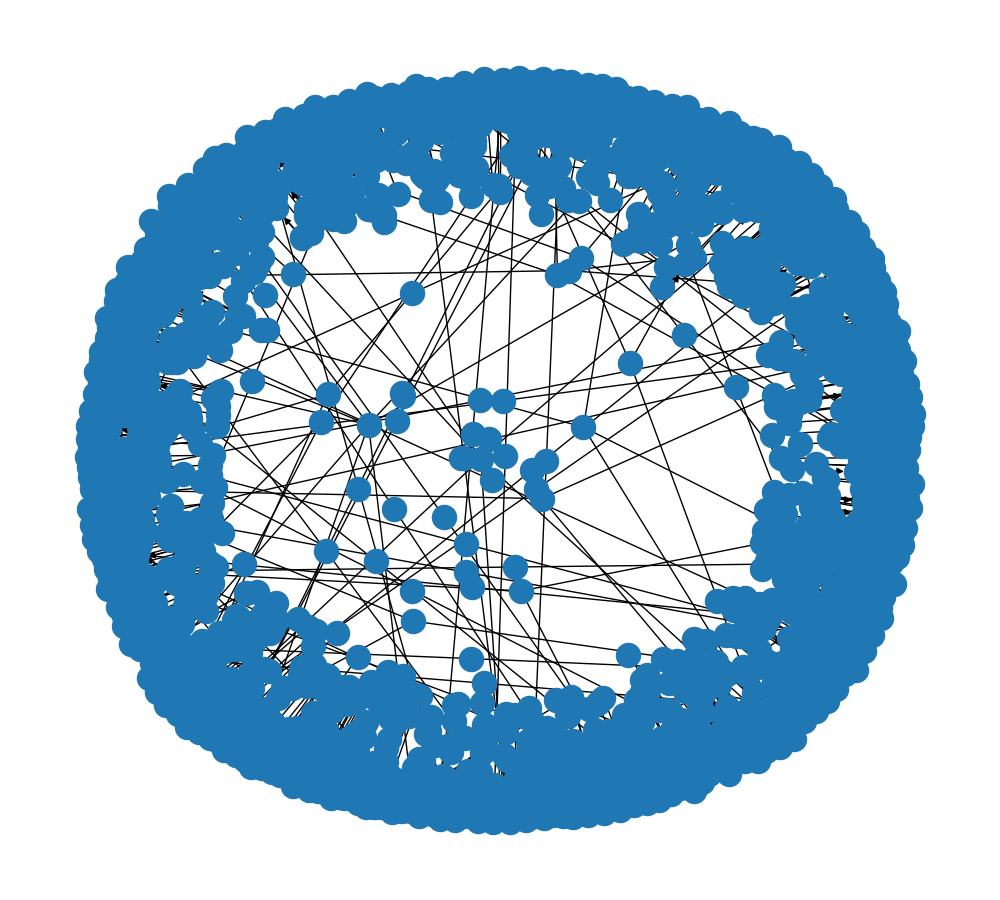

C:\Users\nguyen7\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\nguyen7\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.



In [144]:
plt.figure(figsize=(10,9))
nx.draw(G)

In [145]:
outdeg = nx.out_degree_centrality(G)
sorted(outdeg.items(),key = operator.itemgetter(1),reverse=True)

[('Teezyteachus', 0.004524886877828055),
 ('_oluwatobiiiii', 0.003393665158371041),
 ('nature', 0.0022624434389140274),
 ('CNN', 0.0016968325791855204),
 ('ECOWARRIORSS', 0.0016968325791855204),
 ('FAO', 0.0016968325791855204),
 ('KollegeKidd', 0.0016968325791855204),
 ('MikeHudema', 0.0016968325791855204),
 ('RealJamesWoods', 0.0016968325791855204),
 ('SingleUseReuse', 0.0016968325791855204),
 ('SkyNews', 0.0016968325791855204),
 ('actorvijay', 0.0016968325791855204),
 ('frozensoba', 0.0016968325791855204),
 ('kanyewest', 0.0016968325791855204),
 ('mcannonbrookes', 0.0016968325791855204),
 ('normanswan', 0.0016968325791855204),
 ('AJEnglish', 0.0011312217194570137),
 ('AtlasRisingReal', 0.0011312217194570137),
 ('Aus_ScienceWeek', 0.0011312217194570137),
 ('BBCBreakfast', 0.0011312217194570137),
 ('BBCWorld', 0.0011312217194570137),
 ('kaskadia', 0.0011312217194570137),
 ('CHEMTrust', 0.0011312217194570137),
 ('C_HaWQ', 0.0011312217194570137),
 ('ChelseaRochman', 0.0011312217194570137

In [147]:
retweetdf[retweetdf.tweetowner == '_oluwatobiiiii'].search#['quote_url'].iloc[0]

83    palmoil
84    palmoil
88    palmoil
91    palmoil
96    palmoil
99    palmoil
Name: search, dtype: object

In [132]:
retweetdf.search

9      sustainability
15     sustainability
35     sustainability
39     sustainability
55     sustainability
           ...       
39        Steadystate
40        Steadystate
18           Degrowth
13    Anticonsumerism
26    Anticonsumerism
Name: search, Length: 420, dtype: object

In [30]:
# users = twint.storage.panda.User_df
# users = users.drop_duplicates('username')

In [21]:
followers = pd.DataFrame()
for username_ in tweets.username:
    c = twint.Config()
    c.Username = username_
    c.Store_object = True
    c.Pandas =True
    twint.run.Followers(c)
    followers = followers.append(twint.storage.panda.Follow_df)


ThurstonDanger
CleanSlateEd
polycultured
electricbeef
Scooty_Loodin
GeorgeKalish2
BurrrBoo
kt_considine
newgoliath
spaghetti_stan
KatharineLilah
Jaohl1
RedArmyFred
Kkawatra2
brenna_saurus
Adhikol_RL
toronto_antifa
rvanzen
YourBenOnDrugs
RaineLHu
angerman_alex
RiotBoost
herosnvrdie69
KathiESCO
DethNSykadeliks
MissApril503
dev_decker
Beddy63
JaggedReality
HeyThat02501315
PastorHansson
Moozedude
KomadFortuna
thejbroom
blueprintsonly
TerranHumanity
fancyfrancy0
SamTrickTreat
kauaxama
futurecoast7370
Pinkyduhbrain1
ComGopnitsa
Wrong_Salem
FemboyTacoSlit
SteavesonTerry
RandProgressive
automaticphrase
astrotoya
St4rbuck13
folxhero
shizzler73
nenocenturi0n
JimboSlicee93
_Carlos_2020_
ramona698
shvintage
Marmardunn
frickenfrik
ErikJMoyer
meatbaggin
ClassJihad
DistractedAnna
angelrex77
karlMar93770494
ReizCse
leftieslut
laurie_snyder
NikaBees
betoslilwhore
matticareforall
hellnah1112
char_name365
CloudyArchitect
_50shadesofjake
SFIrishKelly
robthatpank
EKJmusings
moth_breather
wife_annoyer
camel

zivvy_1
LeftistFun
leftyandsoft1
LaFal4Us
bytesizepodcast
The_Pale_H0rse
lars10_lc
DrLearnALot
ZailorT
schizoidnobody
NotTonyWonder
ZennGordon
AllCletus
niathepawg
songforacarter
wellFthat
PickvitaminRed
Geziandme
beatermymeater
Ortizjorlando90
ZachMoss6
kma916
MsSnjuul
orlikewhatever
Hu4Msu
DavidKe92662059
Cheapcar0rust
blackleftist7
commiemcfly
TurkeyGod2
TrashBoiBeeYT
ToastCynical
success43423557
UratoCarol
MamadouA11
letterandnumb
lw1124
idiot_screaming
MechSuburbs
aetoole
27bstrok6
MaineSocialist
PinkoTapster420
ImagesPhone
LauritoGalen
DarterBaby
timtation123
skeptipolitics
thelink2020_
mariag212131
WickedBastid
AntiHangout
realemptykay
of_karen79
bambinofawn
skarl_marx
mindyguilford
JeremyWard33
AmbrosiaSan
taylorswiftly93
SydSizer
Fuffy___
CalfDevin
leighleansleft
yungmalatesta
SeriaViri
YourOnlineDad
timpinijones
TweeterTeej
notnotjaimee
Oadevour
GodisaThembo
ssimilated
MycitieC
LillieGrape
HanshiMoha
spoonspoon_
MahimikoUmbral
RosesBrain
johnbrauer
realhottiepants
Broken_Toas

ChanceOfRev
xo_plasm
LiesAndFish
dieDoktor
PraxisPower
420mercymain
AranaDeJulio_
GramsciFag69
lolstjames
StvAndermoon
Stephy4279
keidekay
KayKosmos
PeterKiefor
ChuckShurley0
kyle_record
OfMauve
Ahnonymust
sciencepodling
MatthewSpira
GPfanenstiel
lalaNmeatball
ColdApplesauce
TiramisuBabe
FredericPaine
50linesonly
turbotruth
alleycatkier
guydebordello
pvoutar
Eldon_Katz
pieupsidedown
RonnCott
Andrea_Marie_69
mnmanofhour
KirpJr
Nudiustertian2
penandjen
up_failing
AssBoss80085
Spacelaser0
dazchi312
BryonE18
CreativeMrPen
TheBoredShow
yung__mean
XperianLannistr
SneakyRoland
M0vinTarg3t
realnowheremang
ShopZulie
tatersrawr
chocomilk_123
imperfectnewz
3xBowl
c_ethe
lesuperburp
_KaytVigil_
lotuseyetarot
TammyT01
GrannyPluck
m4ntis92
muse_and_dig
ObtusePollman
evillegreen79
BlackGurlBerns
JesusLegarreta
Freedom_Flan
Roy_DeLys
genithecrankyn1
Tlovett7
LordRasputin
Rachaelst3
RRBL10
ryvr
ken_kroes
dugpotatoes
malickfahim
futurebird
TrillTage
popsknox
Leah35766015
Ghimire_B4
politiriss
derJamesVe

CRITICAL:root:twint.feed:Follow:IndexError


ch4rlo773
momzemor
g_bigfoot
hopeforhkers
Martin_in_HK
Monsieuraveugle
jkchan78628787
DeanSmi75127647
firstbreakgame
BirbStorm
sedtawuthisrib1
Bemadwen
yuriboats
Achilles
ranpeo
CtXDptIYVwvel6
HTOTHEIDI
Ochretis


CRITICAL:root:twint.feed:Follow:IndexError


kennbill1
WALTERPETRY
BobHinPA1
jdonaldson160
NordicSki2
BayScorpian
e60071734aa24c5
IvanRay16
abigail90221060
Farhad_13691990
MerryKate670
ilscogin
ForestRanger007
alan_justme
bruddahloud
imoneymake21
sinsualsapio
aecwrites
CatheriGreat
CaseyTeaford
shortfinger1951
Kris06291168
RealCaniche
danny66828202
BeataGKoz1
chartrand_phil
wabisabibot
threadz51
e_mannucci
BrCaChaffer
karenwa17247422
GabiStammler
rajxlion88
don44022458
deerfieldspa
jeff_joshjae
katiesireland
dixie_masino
pigman_carole
aw_janczyk
FlettBreanna
ReporiCatYT
BOiltrash
RockRamos3
bebysea
Norsu2
Eric15984
Kevin50750098
ClarksSummitPD
KimiJJackson1
mark072
firephoto25
sanfran_972
wangzhen1360171
kellyzee2011
OmarMor54111386
SparklesTopsy
BrianAnthonyBo1
donnahanz
sfordham32
Ricky356
sprize
aphrodite_femme
victordelrio
Mmezaestala1
p_coveney
Clem_C
livvitty
Democracy631
thisisadamdell
najee88
LaurieMaier
FrankMataipule
Dr_AAAAA
SalGov2
allen_bates2
mfhyde61
jhawkcat
AngCparalegal
Ken3559
s_speculator
AnnaHoque
TucoSal3805

Voguelila
bagastelum
T5b3Jyf6xmGtNb9
cmhl2020
JCEdmund
SMCaff
Diedhein
noudwieland
CArnem62
KatjaHuu
uli85034937
Genea313
Michelle_Wolfe1
timpearsonak
red287382
adolfolg3
dlabhesh
OrdPi
PghWookie
DocBroward
slickyfatts
KevinDe31478555
DHGolf13
UniversalEyebal
Michael37958175
DariusSivin
DawnMize6
Aubree_SO_Gel
Stlaluna7
DarrylJRobinson
DoxSusan
hadieslemon
DeeJayPilcher
cybermama99
bobking1955
NadaAwa78480222
skittykitty64
mwicrhimanmn
AgneMohan
JunZhan11994479
DDominguezFoto
jpaulclean
DocMcMonagle
Wiseone4283
stillost
cicomendez73
mhbules
autoneuroticZEE
beckysbooknotes
kleavor
Angie__Gill
Jason47478771
MamiOfFour
LuisChipres71
ChipArmstrong1
alicperelo
PlainsViewer
SueGrim67995687
dawn_faulkner
YawoviN
DanaherRobby
denpell19
amanda2day
Stefnation14
Transplanted591
Sergio24785958
HabsCanada1980
joel_urwin
MarzoqM_
AbdulwahabEdris
RicardoNacanda
ElaineGambling
Blanchenovia
isaliveandwell7
MudHenMook
Carpe6174
LeveyFran
109ariana
ThaHouse80
Charlie72262748
jess4paws
WPODB
BriChung1
Twi

HSprengkamp
alexandrablond
ryrn
LassiriKa
steveh9
SichraErik
LauriaMelly
Ezbeazy115
logan_kechter
BrettFirstMile
wannacolaborate
SkyWalker2024
BrewLately
sticklefarm
soni_tahir
TgGreyeagle
RiffsonaCircle
Alturisticlife
jh22_j
ChrisNOLA81
haley_gravalis
dontatmeow
Michael_Bizmark
Stanleysmum1
magic_underfoot
lightnininnajar
Pete662730875
jayjay89906668
justrealtorthi1
6OnTheWay
Stephthomas4415
David19988723
Stibou
srching4myword
cyber_dmz
tfanders34
dylan_jaklitsch
dpdygert
bobneedsmoney
CrownCityRocks1
mpurlz
clairekey1
DeweyHaveTo
Jar1Ronald
cindygill22
jmroark
tjh1959
luvartntravel
ElizabethMcCag1
demetriamejia11
Julia59102442
MorrisTinky
rmleal
blathnimnicg
pro100ya11
AlesiOfficial
tendergerbil
Philip_Philby
elgeorgio
NancyKimball3
brad_runsick
Joey_Gibsonn
jwsoundguy
jaseman504
TycenniaG
seektruthnlive
Mila69547941
Hipposma
tjanelaw
bald_wanderer
ander29333768
BuisMatt
Abc0562094416
Heather05549401
InzerCathy
peajaymaurice
rukruk_ny1718
elisaskinrood
souixs
Saturna91802272
detbmw
c

VahidGhajari
daveyboyj421
maggiepayen
Josephemmons
Jimpyyy
WhoDatMelB
DuckmannTenn
Anna35466048
BlakeysBrooke
linda03565664
KohenNoami
gudlaugsdottir
SpikeSweeney
the1Lmichele
DianeHovantzi
sandrah70627589
Ownsmoke
amputette
FrankBellamy14
andrew_joseph6
SusanSeaside
Bethany72644521
jepp98
HeartsDesireJ
Tantrum241
aeprieto
d2haskins
againstmandates
coachosterman
ACTRAVELSERVICE
orhunuguru
TJournalbooks
jerriad
gwils_17
GilbertRushlau
coyotecryptoXRP
impishxgrin
stekitt9
flammpatscherl
CaitlynG18
Patrick98691022
GrassiDonna
PatriotsInUnity
Dirtybird07
Piccanto66
jboard
cowboyhat8
Siuro
Pmkwelch
DouglasMcGaw1
Maratwita
kikogonzzo
Richsellshomes
BrianDiSab
2105Pa92
dirkmanske
KiraHammoudeh
LuccaGeuskens
Ilran31
sulekadi
robertmeersman
tanomartinez33
BerlinerJunge9
y_callie
HutchingsKathy
anishpalarapu
antoroma
Dunelord1
gabrielrpf2506
i_Oghenetega
Mobetta1908
fizzaabbas_17
PHILLYEIGHTBALL
fpjewell
Elled26
OwnedQuincy
Frylock04127011
tolliver_tracy
MKChinese
DP_357
ALeybengrub
kumichan329


Kendra_LynnR
nsutamudad
CoderZebrine
Jackie4ST
cindys618
calzone302
kmwebb14
PaulaJohansen5
KippRowland
DelightfulD5
1buzzman
allymew71
therealRansonR1
Texskiss
JTekolste
gordianhense
carmartch
johnnybridge2
BuzzLaxton
MMehrwerth
skrynen
bbe08bdcff494ff
cindycarden
ninefabstars
dabrig517
docgizmo
BillD08205127
DJSergiio_13
AshleyVieee
TheMakBrouw
ShaneDavison15
sgg1822
JamalNa11701827
BingLi50546355
iBookChick
LivePlethora
Jittranut19
gloferlopez
jnae_m
salimahamirali
THPlans
GaryNikky
Chris_Hunt74
OffwhiteH
denispcole59
CorcoranKieran
quirkymysteries
ForeverUnLtd
JayLossless
ZZander12
amarthur76
Angenetta61
Zea46563685
Ski61R
czar19842012
gerald_schreur
Claudio80616709
sarahb718
turnUPmyMIC
TerryMa78548734
markborchert
CathyHu161
CKaough
lanlandelrey
mctabbykat
dayaedee
cjcateringnyc
TruthViper
_blackchemist
yoshimink
valshannonw
ArboLasso
rettrogrrl
BethHynes2
ReuterStephani
GoFritzCo1
CraigPerkins2
Balsamdog
byjulielauren
susieq0465
haosorior
ernie_shafer
Lily96964716
jking322
sl_je

dcastillo002
IreneJo69827460
wendy94032
MagdaCZlin
KBGFLA
tylerwslawson
Bill_Stearns
MerendaGary
WettyBoi
sophie31216960
FeetMcGeet
BibleBeliever5
sey10161
rmillerbr
CoachHall41
Primal_Deep
kevinmax
NumbersGirl1
KenTexan
RobertPWDE1985
willpower1994
JoAnn_Tinberg
maryannsalt
FaissMr
_mAx_pOw3r_
zwillie33
ljwesbie
ichinoy
donahoe_douglas
ccthompson50
v_blinn
drrejo
PhotoGuyGene
ch__714
rubioyepesf
thehonorablecsc
Babyason1
efhale
rlhip
Magic_Max98
WesNeal8
michael_tritt
wijnazijn
Miss_TJ_
livia_sirghi
Karojas29
coachro3
AfrikaFundi
MiscbyMichelle
PedroRedBlue
Thizzfaded420
LydiaPine
JiangNa79248999
arayseecoop
AzucenaMarinD
CavicchiSara
briandonlen
crisdeodates
Jennifermont1
HeckPerz
ScottSt14675671
emersonjackson_
2Joshperez
sickmund
raehues
jcmendoza01
Wayne_Wilkinson
tlbrown319
CarefulNow222
IMREALHmmmm
CCoelloB
JimBo_Colorado
FtWaynejester
sacreole
leonardfurio
RubyDub09896867
RealNyama
DallasWard6
Arthur77Jj
slb79
Roselia511
jim76149621
alkie7
MyersSCUBA
Carla_Brogan
iqbalpkmirza
S

KarenGarvey71
alanjbaker
GU1961
MeMamaLee
_marconi_
ValentinNebune1
FonMananchaya
sxr_mxxnlxght
drewlogue
tela57
peninahrono
EasMUNICH1
TheAisyah27
thehandsomemin1
RobRudnicki
crazydukefan
jenlgwin
Petrillo_Ohio
Didi69431687
CathyUnruh1
BigZ_GoBills
VinnieHenry3
myersjim
MGW3750
wjs67448
StShannan
0331MGunner
moduleQ
BaycanLinda
oscarthewonder2
skonchady
elif32128337
beefy_king
Nathali93474231
Linguino1
jdlambart
suseq505
EvelioIguaro3
drCADuff
michellefromCG
MargotAstra
thekeysstore
TJ_Rapach
NorfolkTours
MarkusSc2
coloringblue
tuttlejanine
Triz719
WeddingCasey
mgobluedrew
bryansmclean
WalshJulia
arthas7896
gabrielmulligan
CoachHarlin_73
Bettina54741803
wazzer52
bmaxiey
keepitsimple369
Kech89704090
BizWiz73994861
pdelevett
koolrandomshiit
IVote13
union_mgmt
boemir1
Amandadmcnally
fredsgarden
ElvyDen
TransitionLivin
lemonlime1950
InfoNewsJunkie
miggesy2020
TheJigIsUp2020
mitchhafen
grrumpybr
JamesDo67439255
PrayRosary47
CarolineB_16
DiChianna
AllardCarr
Joemordini1
srikondaveeti
DougGa

Lils82650258
Neen750606
littled39737806
SwatiS85845952
Dr_sally_hoare
wouter_mat
KatellRose
yuzhongbeiying
ColleenJancola
VRod2020
ezstockx
ManuelOliveira6
paulphang
Alsu711
CK_NZL_1st
andiv69
swomber23
DaniBarrett13
SilvaManuel1972
blank32907202
daryaeda
Germain6
avu82923072
EJanetPlanet
ElliottMillard1
RiccardoMatteu5
laplante_kay
buritosac
MarkMcCardie
schumacj3
SimonHeitmann
kids_softball
jay_mcculloch
DarrenMA1989
NadaHammoud15
love2livesimply
MissmarpleM
Jasper69378923
WoshiNove
1nOnlyRina
Jimmy37910789
fbarretto1
t4cscuderia
DetailsByBill
pidschedapper
AltphartThomas
tjcarson5
liamcz
bechtoma1
SarriTena
lteivansjudge
Nuvorderusa
Ylaneur
worklifehealth
lrjwtravel
azjaybird
BobbyBr97736326
casteleynan
JemaLamo
HiltonPearlRiv
ytry72167389
DennnisSy
HaydenRL_K
StuartG08916010
qapitalpartn3rs
Louise40335560
Chrissmiddy2020
PSimundt
snarka
AshleeHeadrick
CharisL119
flokiff
3ichae7
BigDaddyJoe513
pysoontech
cindyinms1
pbjsammich13
MGJohnson59
TravelAdelante
Hanieh_Hp
nevlongbottom
Boss

jack_davanzo
darronjeff67
yankeeeyes
RandoClassic
xiaopinguoshu
SR_Baguma
Bill97691495
Dimoni_scuat
glenn_cantwell
Stephanoushka2
Bucicom
garotablaster
capitatravel
TonyP7241
KeithKearney23
itismomsworld
EAChewning
khaledbayan66
troll_of_truths
Kalyan22896958
mulavulchek
PhilCardone
foxrunpottery
attygm
lamandaconrad
rws_00
smith_tenise
william55737517
jochap7
polojoe40
innerspinent
666Amaterasu666
RetiredSanDiego
carlosbrihu
juditgiuditta
Bojdom1
iiEventMedics
Dog33333333
PaulusLiii
Vingabe
gonzalo354
jo_theladyj
Hillary18110050
KotikRe53702701
jdkepp
PaulJohnsson5
StaryBolshevik
JdSegura71
Dave14Orcutt
ksuengaged
time6875
EHAB40332089
PhillyHeatCoach
Lenyfishhead
mikegweeks
lowryl
Hfcol69
BobElston1
WolfWar72757268
thegiftur
DebruyneLisa
ouzo71
MercatLes
Brujats3
trutherderek
deidravis
j2dmaxxx
elculdenjaumet
ErnestKornelsky
Storme1369
movinonup3112
AramSolomon
lonnyharris99
lauramarsh70
jeffhusen
fostokes
AlternativeEdu7
ShanaRwriter
ktwest1
bay_country
funkymonkey1268
BmerJim
Rolan

heartrnbyahooc1
Nightwish621
Daniell83913044
violet_quartz_
kabdool
sekramita
Unofficial57
rdgusa
claireinhants
TheVoxAgency
Louisa26801157
donovanfick
Nnono28160813
JesayaSeun0
rakeshs94148192
_JimSpark
securingus
danieljamestt
muzimilianz
Davetoronto1
SueMather14
GerbRnR
angelmarp
amazonsofoz
lilieput2002
selanna0519
jjcWpg7
jeff_stell
MadzyMarek
lmccorm
ColleenSutton
Joe1Lamumba
adam_y_1234567
mayfromglasgow
poppymaderson
chandrupk
Mia_DolceSugar
vidaurreta_e
MariaKiritsisW
CryptoToretto
JulliePfeffer
franmark
moreno__medina
mariannerempel
Beach_house2025
beenawon
RobNFinlayson
jlrsole
spinninmywheel
mwong_may
CnjJosie
Steph2Steph
Glen90896158
kvs_elliott
bill_leave
jgardiner6
eledo819
Tszepppy
DanielWickie
lapatches
dillardnic
Elizncllns
Z9eqthhHpeetlzG
CarloLegole
FanningGfanning
Knysna1976
JoannaMeskill
CoggleMaggie
LaurelAustman
jtlilley
walescarolyn
jcollinmac
misppb
martinbenze_m
TristanQuirke
WGCThomas
dreadthered19
airdrieyoungs
Alemuroj
spikeymike2603
rtlc427480
CleareRenee

KeyboardInterrupt: 